# Lending Club Case Study

## Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Configuring Notebook Settings

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (25, 3)
plt.rcParams['figure.max_open_warning'] = 10000
pd.set_option('display.max_columns', None)

## Loading The Dataset

In [3]:
dataset_ddf = pd.read_csv('loan.csv')

C:\Users\Aswathy Shaji\AppData\Local\Temp\ipykernel_9420\2473404258.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_ddf = pd.read_csv('loan.csv')


## Cleaning The Dataset

###### Shape of the dataset now

In [4]:
dataset_ddf.shape

(39717, 111)

### Removing Columns with all Null Values

In [5]:
percentage_of_null_values_in_column_dseries = dataset_ddf.isnull().mean()
all_null_values_columns_dseries = list( percentage_of_null_values_in_column_dseries[ percentage_of_null_values_in_column_dseries == 1 ].index )
dataset_ddf.drop(columns=all_null_values_columns_dseries, inplace=True)
print(f'Found {len(all_null_values_columns_dseries)} number of columns only containing null values. Removed them from the dataset')

Found 54 number of columns only containing null values. Removed them from the dataset


###### Shape of the dataset now

In [6]:
dataset_ddf.shape

(39717, 57)

### Removing Columns with lot of Null Values and Very Little Diverse Non Null Values

#### Finding Such Columns and Plotting them Based on Amount of Null Values

In [7]:
percentage_of_null_values_in_column_dseries = dataset_ddf.isnull().mean().sort_values(ascending=False)
non_zero_percentage_of_null_values_in_column_dseries = percentage_of_null_values_in_column_dseries[ percentage_of_null_values_in_column_dseries != 0 ]

non_zero_percentage_of_null_values_in_column_dseries

next_pymnt_d                  0.971297
mths_since_last_record        0.929854
mths_since_last_delinq        0.646625
desc                          0.325855
emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
chargeoff_within_12_mths      0.001410
collections_12_mths_ex_med    0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
dtype: float64

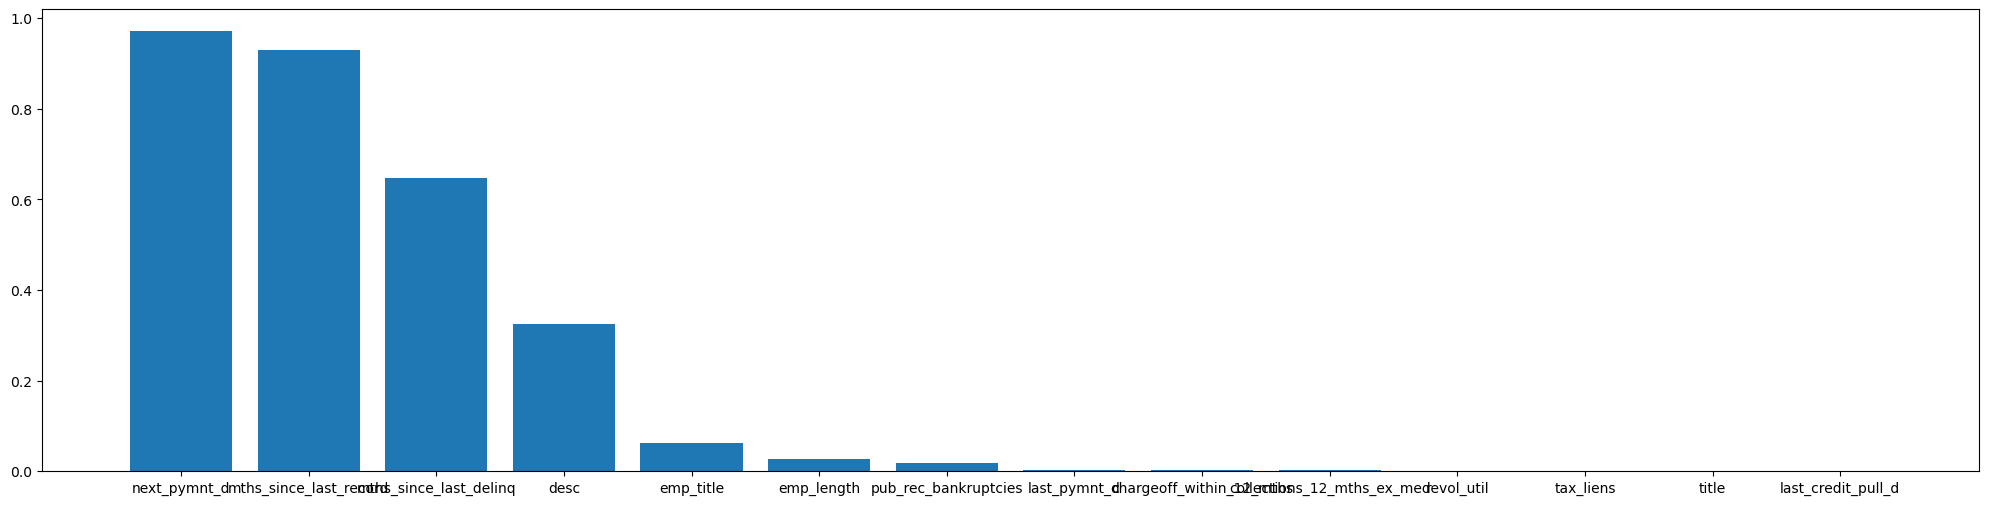

In [8]:
plot_x_values = list( non_zero_percentage_of_null_values_in_column_dseries.index )
plot_y_values = non_zero_percentage_of_null_values_in_column_dseries.tolist()

plt.figure(figsize=(25,6))
plt.bar(plot_x_values, plot_y_values)

plt.show()

Now we have the columns with null values. We can now figure out which columns don't have enough diverse data in them and filter them out

#### Checking if Each Column with Null Values Have Useful Data, else Dropping Them

##### next_pymnt_d

In [9]:
non_null_next_pymnt_d_dseries = dataset_ddf[ ~dataset_ddf['next_pymnt_d'].isnull() ]['next_pymnt_d']
non_null_unique_values_count_next_pymnt_d_dseries = non_null_next_pymnt_d_dseries.value_counts()
non_null_unique_values_count_next_pymnt_d_dseries

next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

Since existing data not relevant enough, dropping the column

In [10]:
dataset_ddf.drop(columns='next_pymnt_d', inplace=True)

##### mths_since_last_record

In [11]:
non_null_mths_since_last_record_dseries = dataset_ddf[ ~dataset_ddf['mths_since_last_record'].isnull() ]['mths_since_last_record']
# non_null_unique_values_count_mths_since_last_record_dseries = non_null_mths_since_last_record_dseries.value_counts()
# non_null_unique_values_count_mths_since_last_record_dseries
non_null_mths_since_last_record_dseries

66       113.0
70       105.0
77        97.0
94        33.0
161       93.0
         ...  
39712      0.0
39713      0.0
39714      0.0
39715      0.0
39716      0.0
Name: mths_since_last_record, Length: 2786, dtype: float64

Keep this columns?

##### mths_since_last_delinq

In [12]:
non_null_mths_since_last_delinq_dseries = dataset_ddf[ ~dataset_ddf['mths_since_last_delinq'].isnull() ]['mths_since_last_delinq']
non_null_unique_values_count_mths_since_last_delinq_dseries = non_null_mths_since_last_delinq_dseries.value_counts()
non_null_unique_values_count_mths_since_last_delinq_dseries

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

Keep this column?
deliquency means defaulted
Possibility that 0 means defaulted in the current month. If so null value means no default history.
That is valuable data. Just consider the column categorical, and impute null values with "no_default_history".
This may be the case.

##### desc

In [13]:
non_null_desc_dseries = dataset_ddf[ ~dataset_ddf['desc'].isnull() ]['desc']
non_null_desc_dseries

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
6          Borrower added on 12/18/11 > I am planning o...
                               ...                        
39708    I would like to pay off my high-interest credi...
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 26775, dtype: object

Since this is a descriptive column, no analysis can be done anyway. So dropping it.

In [14]:
dataset_ddf.drop(columns='desc', inplace=True)

##### emp_title

In [15]:
non_null_emp_title_dseries = dataset_ddf[ ~dataset_ddf['emp_title'].isnull() ]['emp_title']
non_null_unique_values_count_emp_title_dseries = non_null_emp_title_dseries.value_counts()
non_null_unique_values_count_emp_title_dseries

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

Dropping this column, since too many different categories

In [16]:
dataset_ddf.drop(columns='emp_title', inplace=True)

##### emp_length

In [17]:
non_null_emp_length_dseries = dataset_ddf[ ~dataset_ddf['emp_length'].isnull() ]['emp_length']
non_null_unique_values_count_emp_length_dseries = non_null_emp_length_dseries.value_counts()
non_null_unique_values_count_emp_length_dseries

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

Not dropping this because of less null values, and presence of diverse and important data

Impute values?

##### pub_rec_bankruptcies

In [18]:
non_null_pub_rec_bankruptcies_dseries = dataset_ddf[ ~dataset_ddf['pub_rec_bankruptcies'].isnull() ]['pub_rec_bankruptcies']
non_null_unique_values_count_pub_rec_bankruptcies_dseries = non_null_pub_rec_bankruptcies_dseries.value_counts()
non_null_unique_values_count_pub_rec_bankruptcies_dseries

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

Not dropping, because of the presence of very important data

Maybe impute values with 0?

##### last_pymnt_d

In [19]:
non_null_last_pymnt_d_dseries = dataset_ddf[ ~dataset_ddf['last_pymnt_d'].isnull() ]['last_pymnt_d']
non_null_unique_values_count_last_pymnt_d_dseries = non_null_last_pymnt_d_dseries.value_counts()
non_null_unique_values_count_last_pymnt_d_dseries

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

Not dropping, because of the presence of very important data

Impute values?

##### chargeoff_within_12_mths

In [20]:
non_null_chargeoff_within_12_mths_dseries = dataset_ddf[ ~dataset_ddf['chargeoff_within_12_mths'].isnull() ]['chargeoff_within_12_mths']
non_null_unique_values_count_chargeoff_within_12_mths_dseries = non_null_chargeoff_within_12_mths_dseries.value_counts()
non_null_unique_values_count_chargeoff_within_12_mths_dseries

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

Dropping this column, because there is no clear indication that there is difference between the single non null value (0) present in the column and the null value. This means effectively the column only has a single value/category. 
So, dropping this column since no useful analysis can be done on a single category.

In [21]:
dataset_ddf.drop(columns='chargeoff_within_12_mths', inplace=True)

##### collections_12_mths_ex_med

In [22]:
non_null_collections_12_mths_ex_med_dseries = dataset_ddf[ ~dataset_ddf['collections_12_mths_ex_med'].isnull() ]['collections_12_mths_ex_med']
non_null_unique_values_count_collections_12_mths_ex_med_dseries = non_null_collections_12_mths_ex_med_dseries.value_counts()
non_null_unique_values_count_collections_12_mths_ex_med_dseries

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

Dropping this column, because there is no clear indication that there is difference between the single non null value (0) present in the column and the null value. This means effectively the column only has a single value/category. 
So, dropping this column since no useful analysis can be done on a single category.

In [23]:
dataset_ddf.drop(columns='collections_12_mths_ex_med', inplace=True)

##### revol_util

In [24]:
non_null_revol_util_dseries = dataset_ddf[ ~dataset_ddf['revol_util'].isnull() ]['revol_util']
non_null_unique_values_count_revol_util_dseries = non_null_revol_util_dseries.value_counts()
non_null_unique_values_count_revol_util_dseries

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

Not dropping, because of the presence of very important data

Impute data?

##### tax_liens

In [25]:
non_null_tax_liens_dseries = dataset_ddf[ ~dataset_ddf['tax_liens'].isnull() ]['tax_liens']
non_null_unique_values_count_tax_liens_dseries = non_null_tax_liens_dseries.value_counts()
non_null_unique_values_count_tax_liens_dseries

tax_liens
0.0    39678
Name: count, dtype: int64

Dropping this column, because there is no clear indication that there is difference between the single non null value (0) present in the column and the null value. This means effectively the column only has a single value/category. So, dropping this column since no useful analysis can be done on a single category.

In [26]:
dataset_ddf.drop(columns='tax_liens', inplace=True)

##### title

In [27]:
non_null_title_dseries = dataset_ddf[ ~dataset_ddf['title'].isnull() ]['title']
non_null_unique_values_count_title_dseries = non_null_title_dseries.value_counts()
non_null_unique_values_count_title_dseries

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

Dropping this columns because of its descriptive nature

In [28]:
dataset_ddf.drop(columns='title', inplace=True)

##### last_credit_pull_d

In [29]:
non_null_last_credit_pull_d_dseries = dataset_ddf[ ~dataset_ddf['last_credit_pull_d'].isnull() ]['last_credit_pull_d']
non_null_unique_values_count_last_credit_pull_d_dseries = non_null_last_credit_pull_d_dseries.value_counts()
non_null_unique_values_count_last_credit_pull_d_dseries

last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

Not dropping, because of the presence of very important data

Impute Data?

###### Shape of the dataset now

In [30]:
dataset_ddf.shape

(39717, 50)

### Removing Columns with only Single Value

In [31]:
dataset_columns_unique_count_dseries = dataset_ddf.nunique()
dataset_columns_with_single_unique_count_dseries = list( dataset_columns_unique_count_dseries[ dataset_columns_unique_count_dseries==1 ].index )
dataset_ddf.drop(columns=dataset_columns_with_single_unique_count_dseries, inplace=True)
print(f'Found {len(dataset_columns_with_single_unique_count_dseries)} number of columns that only contains single value through all its rows! Removed them from the dataset.')

Found 6 number of columns that only contains single value through all its rows! Removed them from the dataset.


###### Shape of the dataset now

In [32]:
dataset_ddf.shape

(39717, 44)

### Pre-Processing Columns

##### int_rate

In [33]:
dataset_ddf['int_rate'] = dataset_ddf['int_rate'].str.replace('%', '').astype(float)
dataset_ddf['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

##### revol_util

In [34]:
dataset_ddf['revol_util'] = dataset_ddf['revol_util'].str.replace('%', '').astype(float)
dataset_ddf['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

### Seperating Columns to Bucket of Categorical, Numeric, and Special/Extra Columns

In [35]:
cat_cols = [ 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state' ]
num_cols = [ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies' ]
date_cols = [ 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' ]
extra_cols = [ 'id', 'member_id', 'url', 'zip_code' ]

#### Deleting the Extra Columns (not useful for analysis)

In [36]:
dataset_ddf.drop(columns=extra_cols, inplace=True)

###### Shape of the dataset now

In [37]:
dataset_ddf.shape

(39717, 40)

## Univariate Analysis

### Categorical Columns

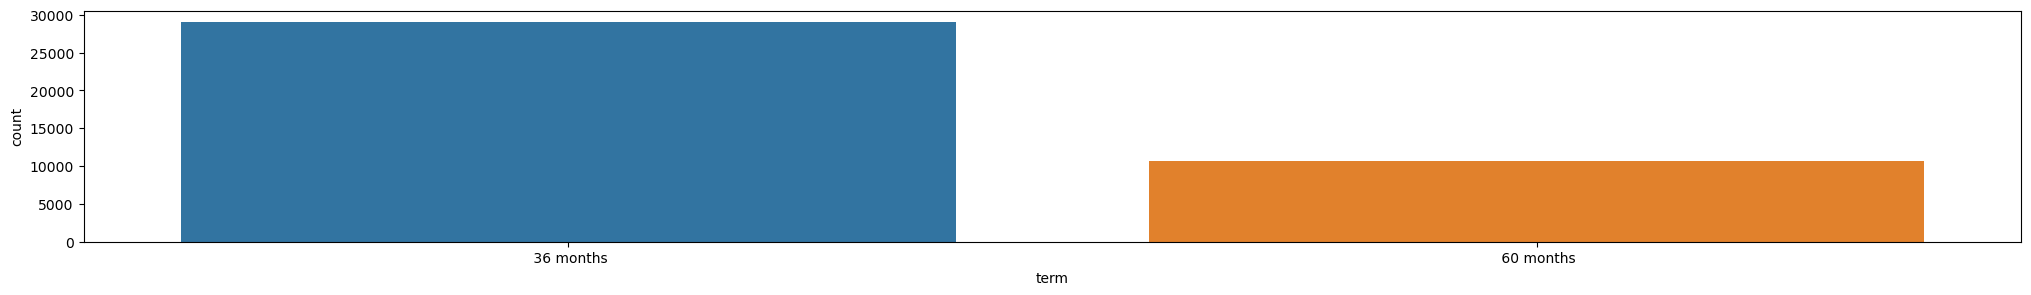

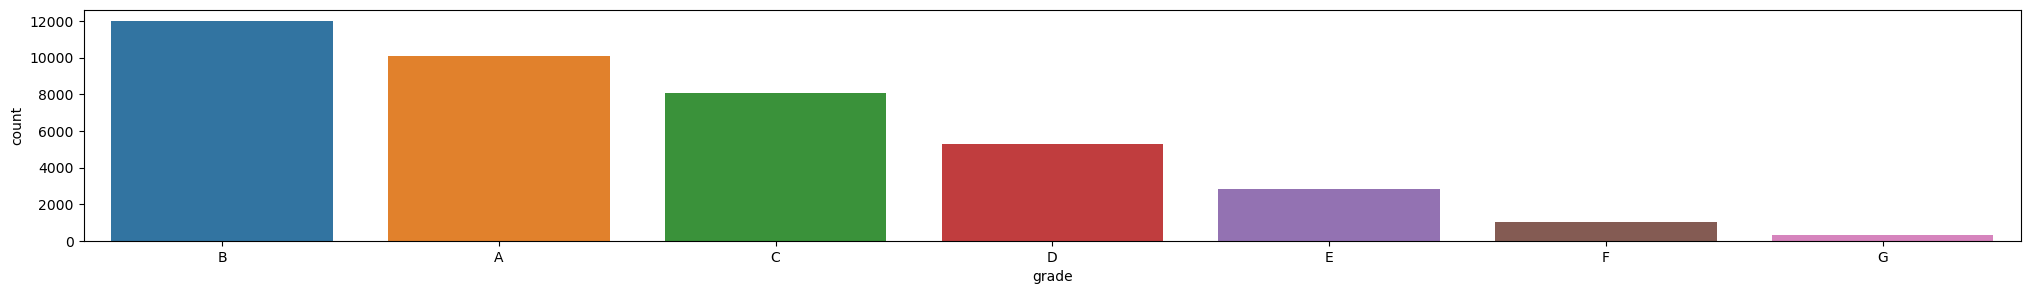

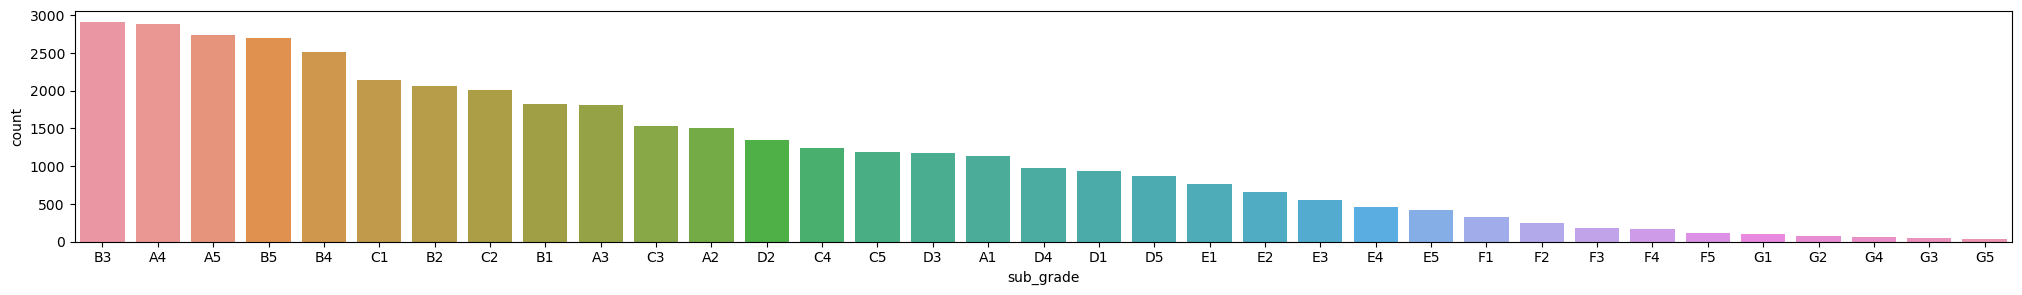

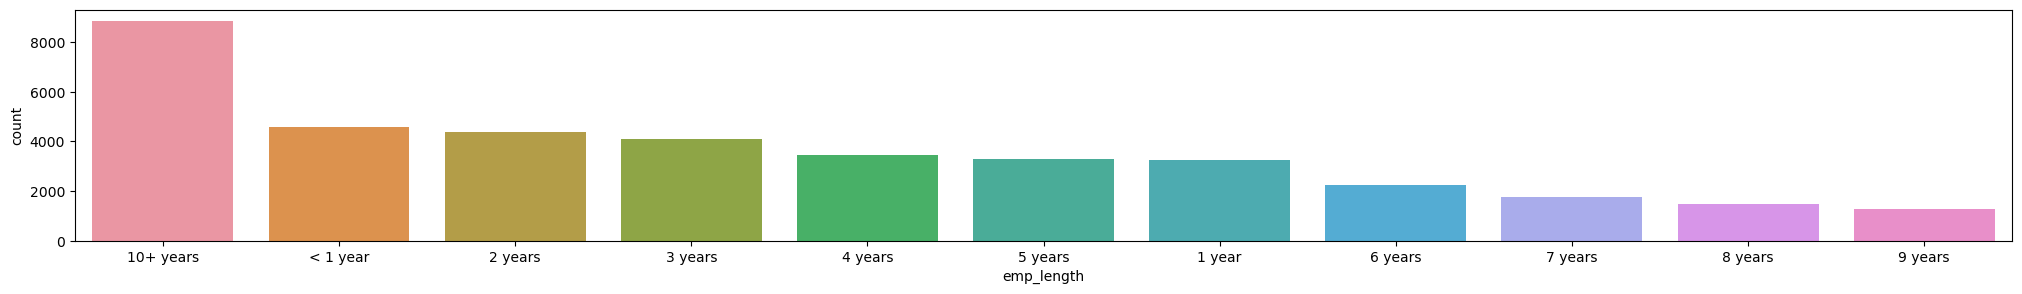

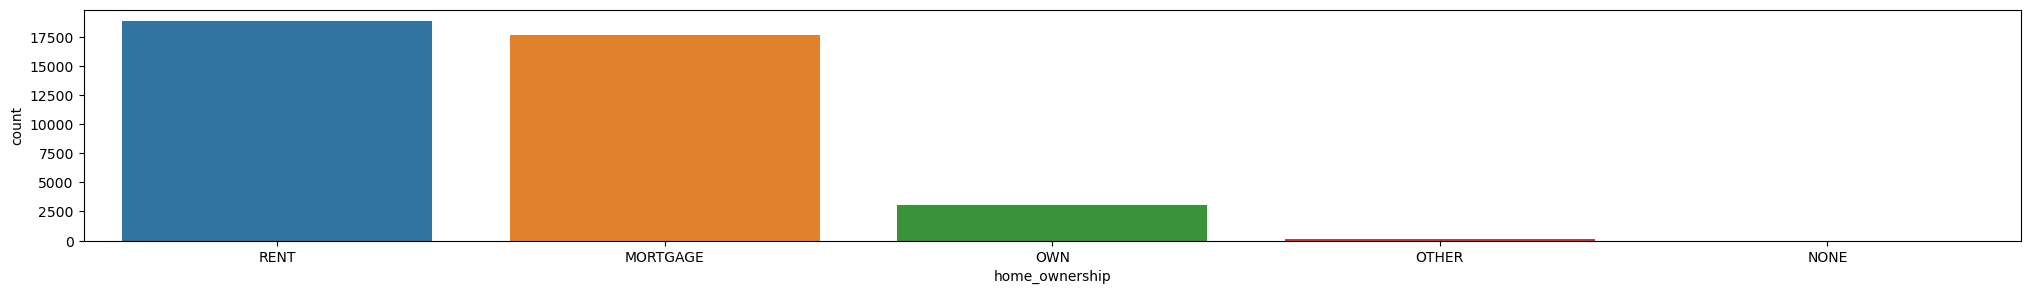

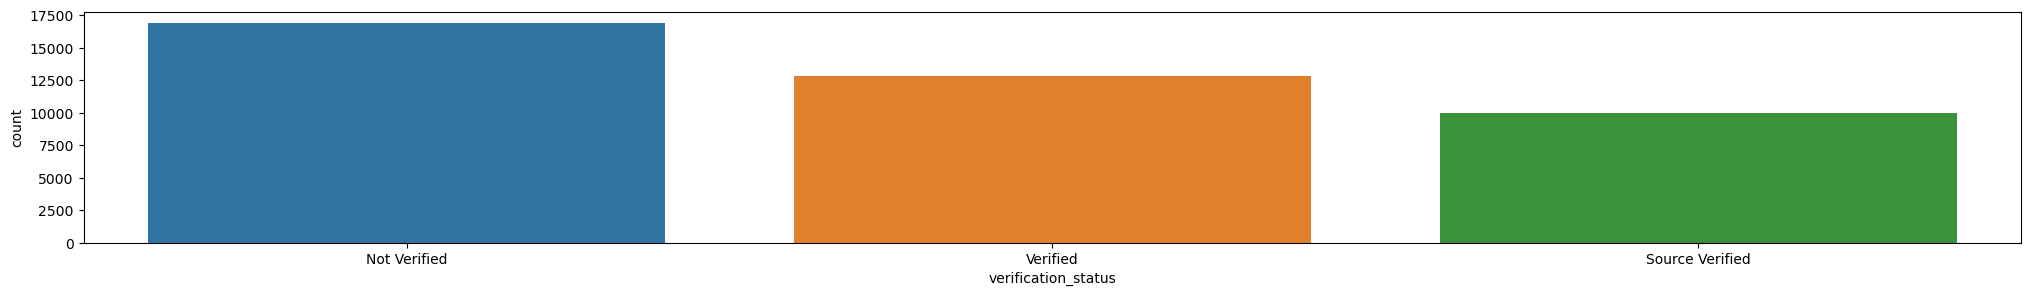

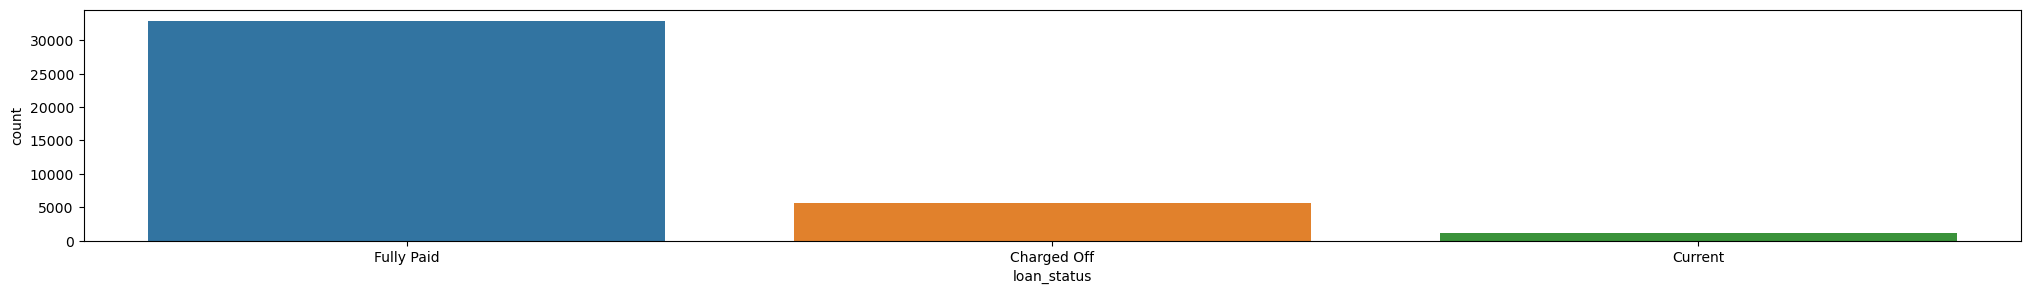

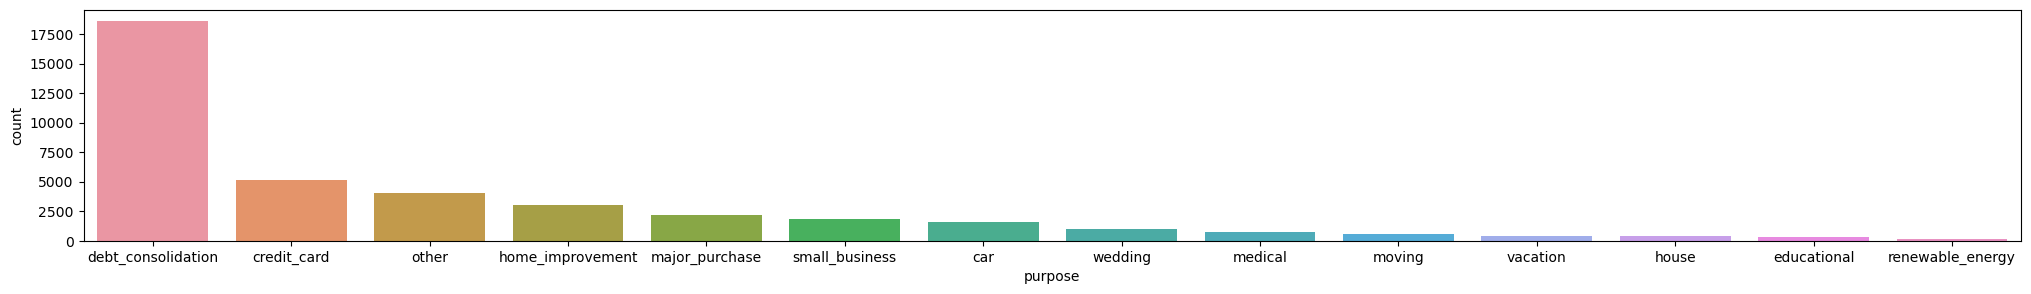

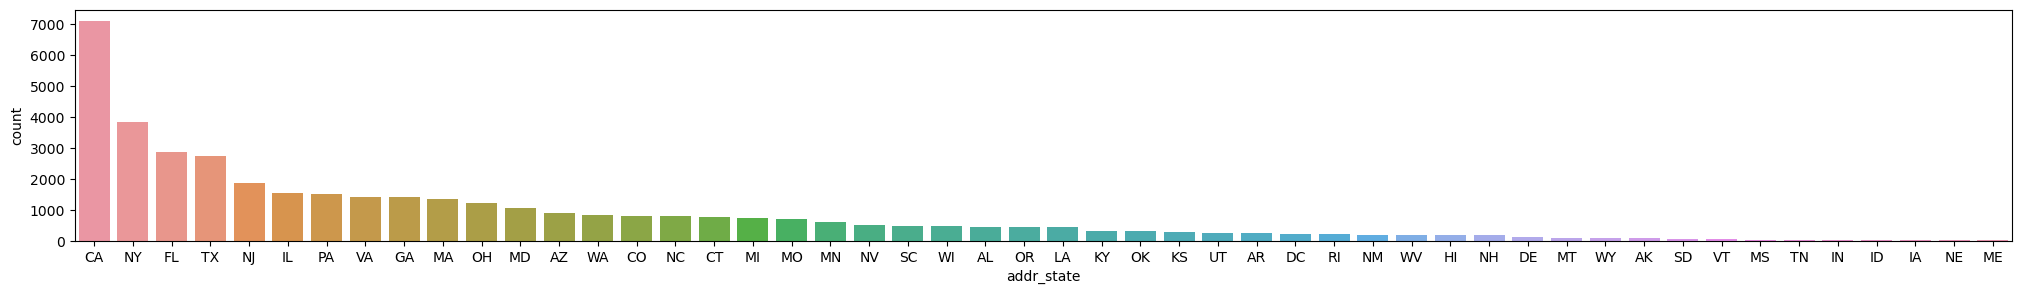

In [38]:
for col in cat_cols:
    col_val_count = list( dataset_ddf[col].value_counts(ascending=False).index )
    plt.figure()
    sns.countplot(dataset_ddf, x=col, order=col_val_count)

Inference:<br>
Looking at the loan_status vs count graph (7th graph from the beginning), we can infer the following:<br>
+ The dataset contains a few loans that are currently ongoing. Since this doesn't contain information about if defaulted or not, we can remove these rows.<br>
+ We can take "Fully Paid" category as not defaulted, and "Charged Off" as defaulted

#### Removing Currently Active Loans

In [39]:
dataset_ddf = dataset_ddf[ dataset_ddf['loan_status'] != 'Current' ]

###### Shape of the dataset now

In [40]:
dataset_ddf.shape

(38577, 40)

### Numerical Columns

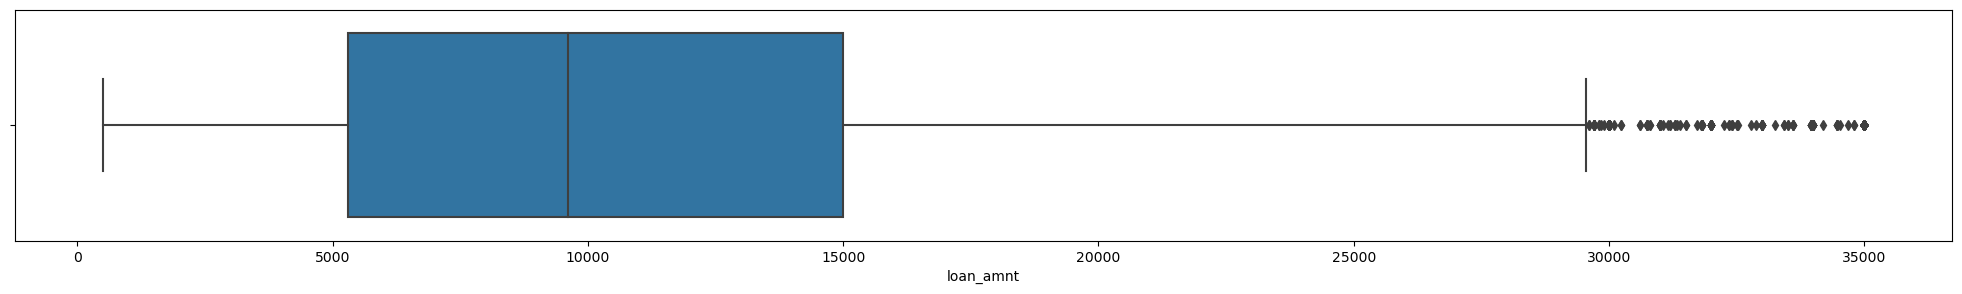

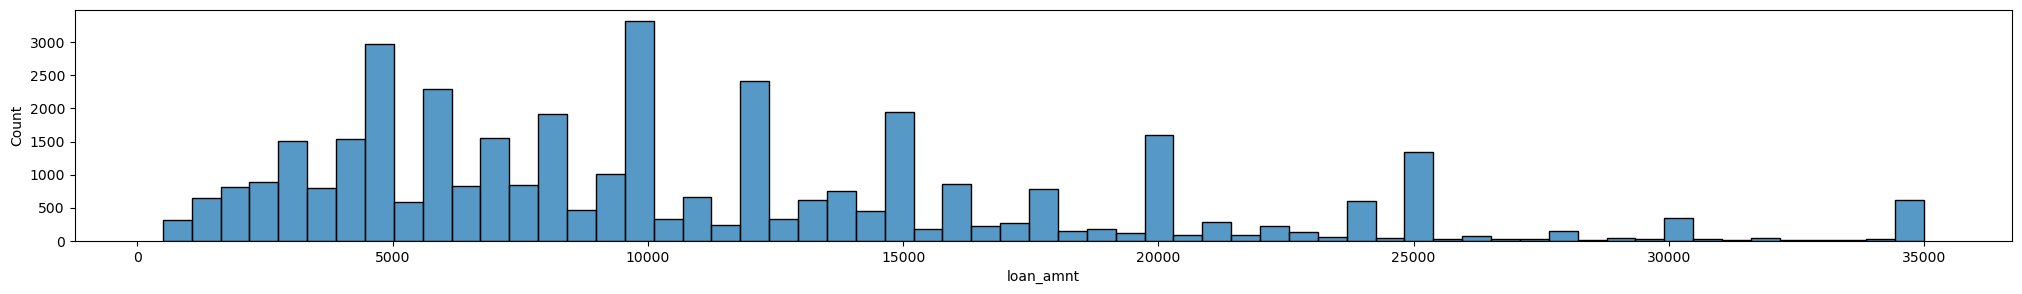

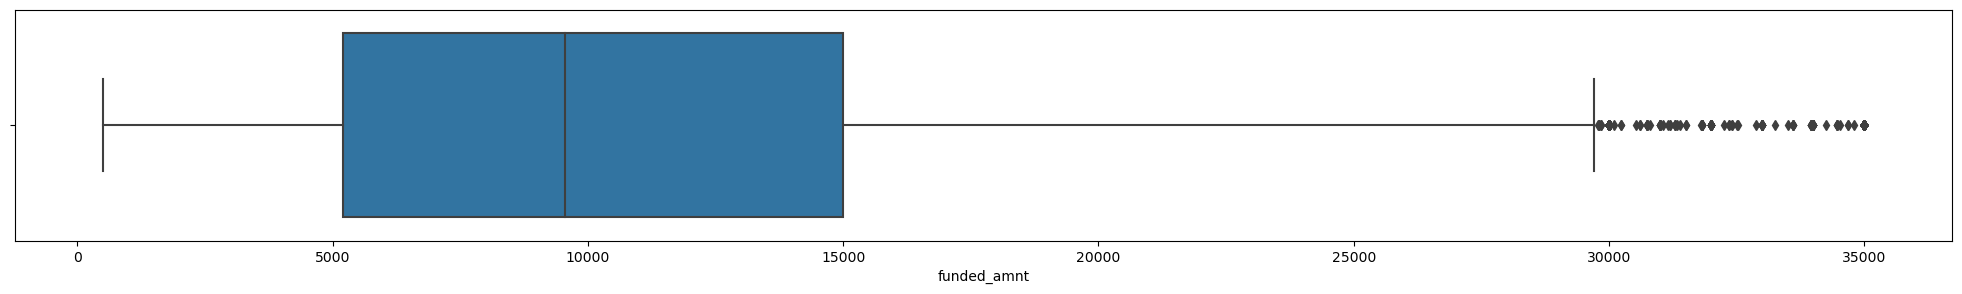

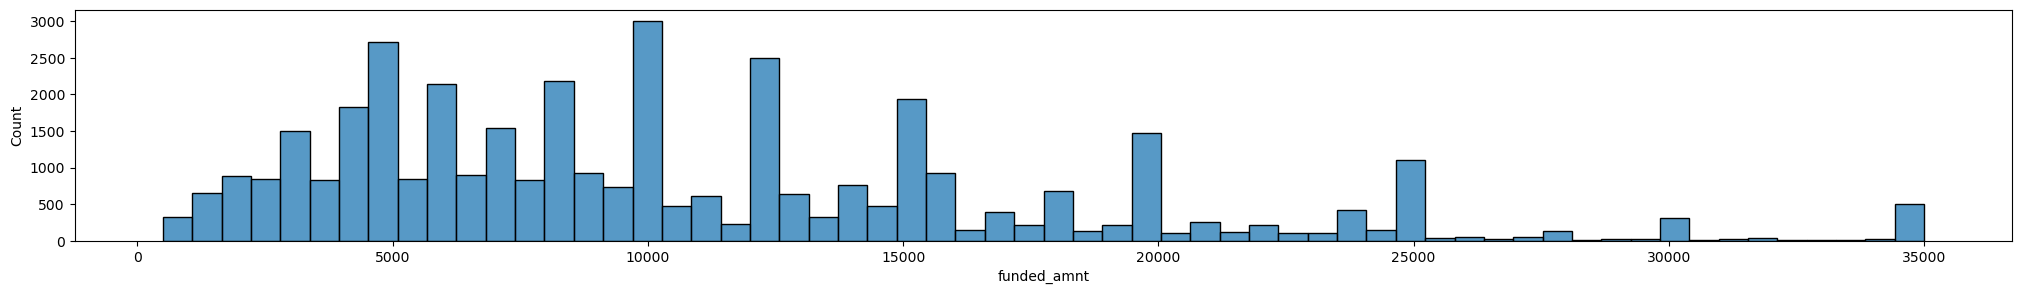

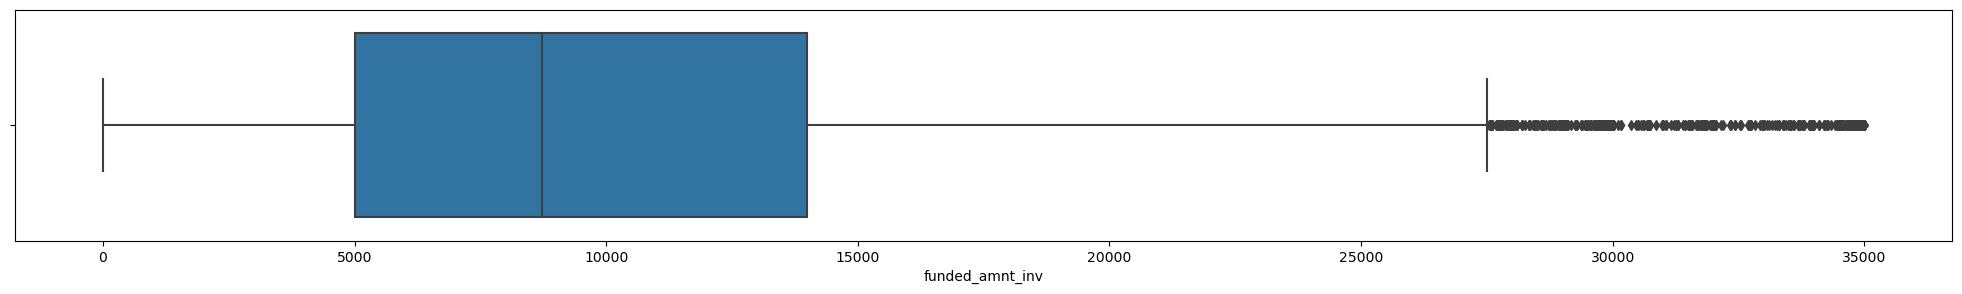

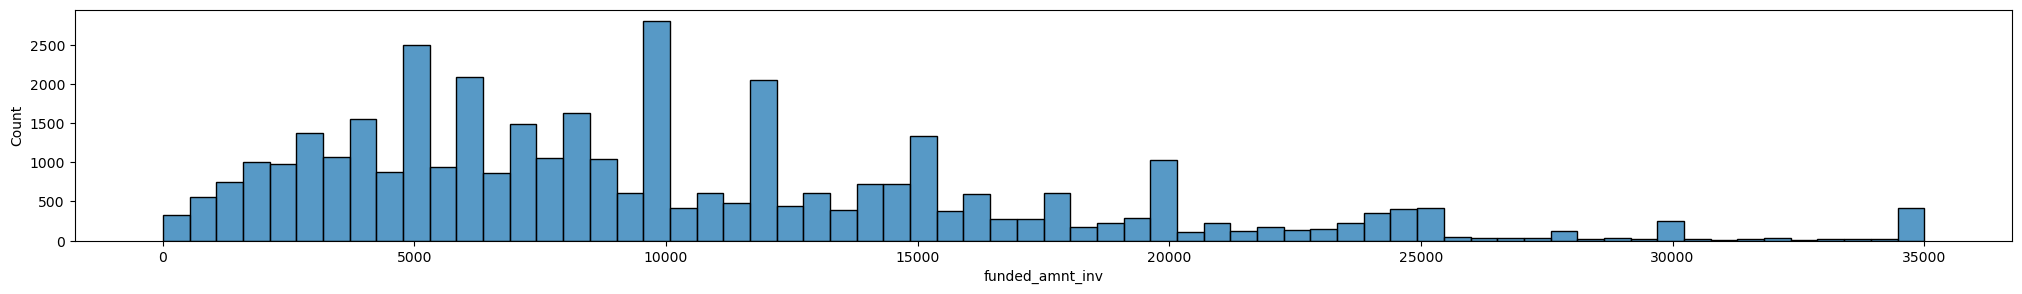

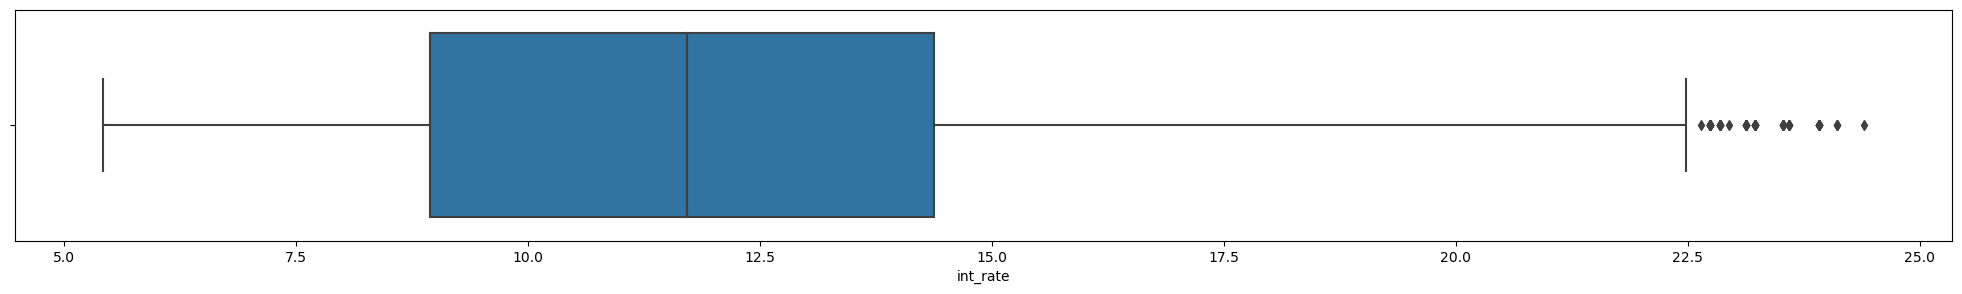

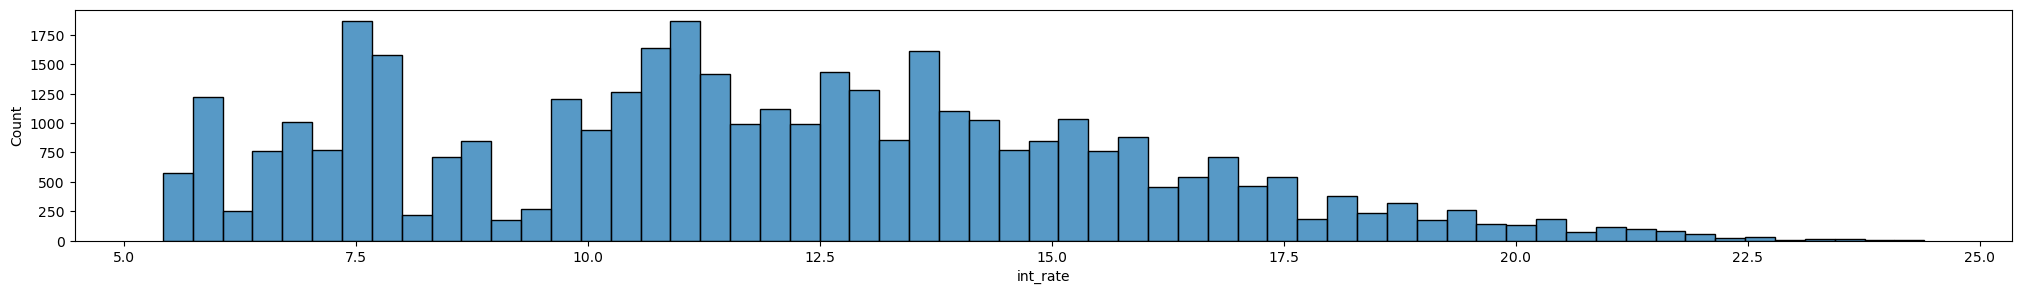

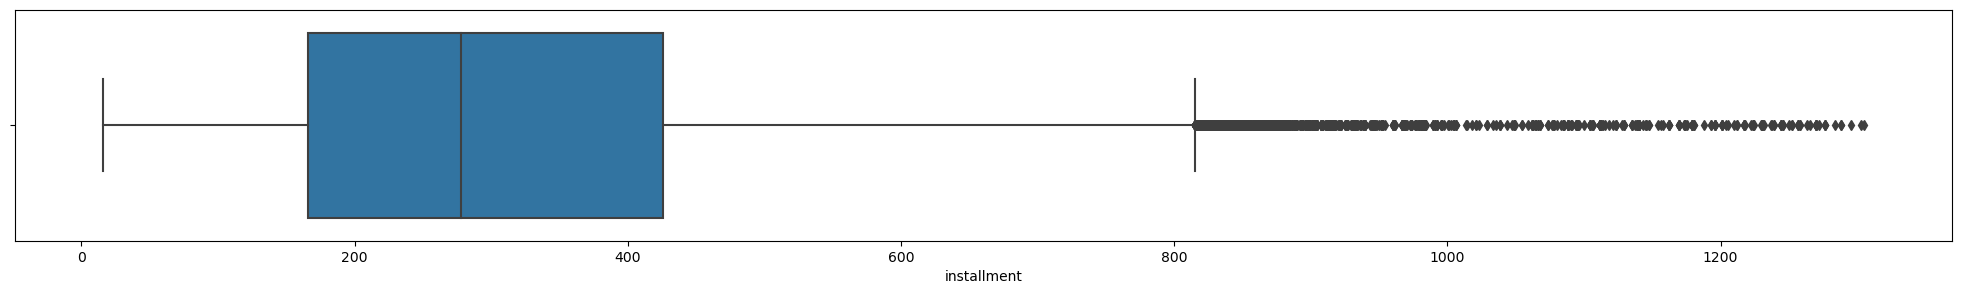

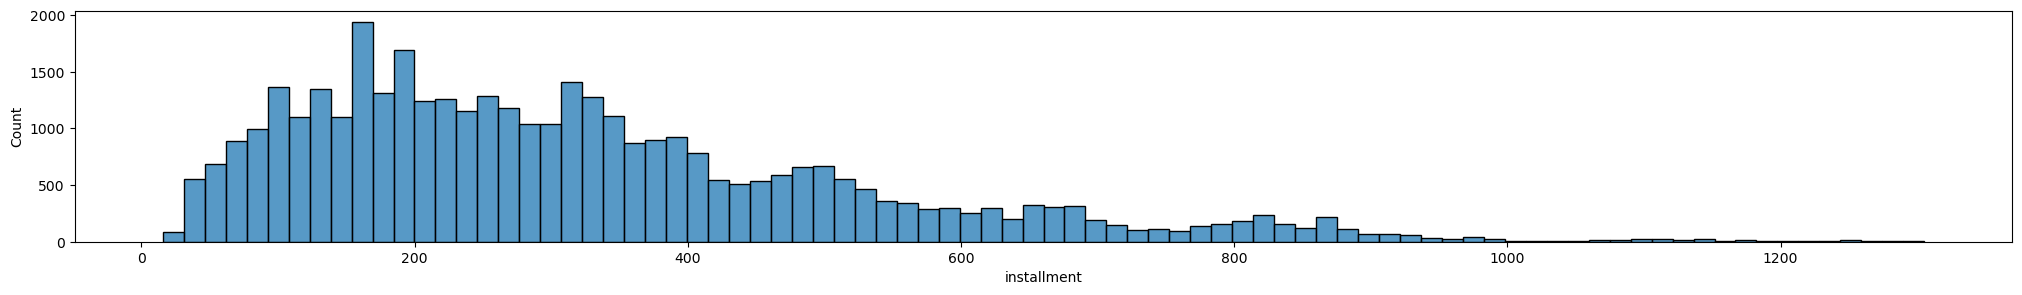

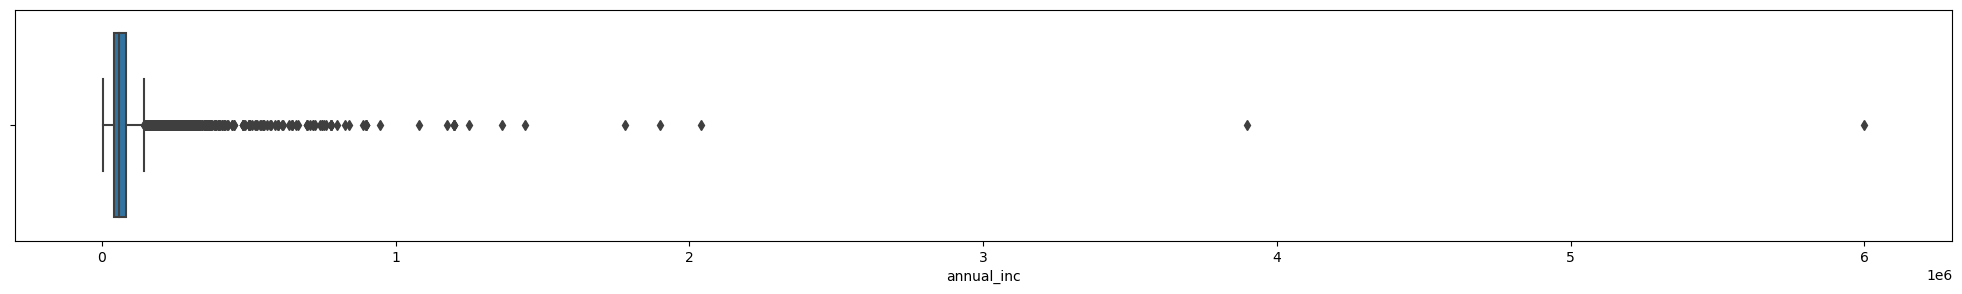

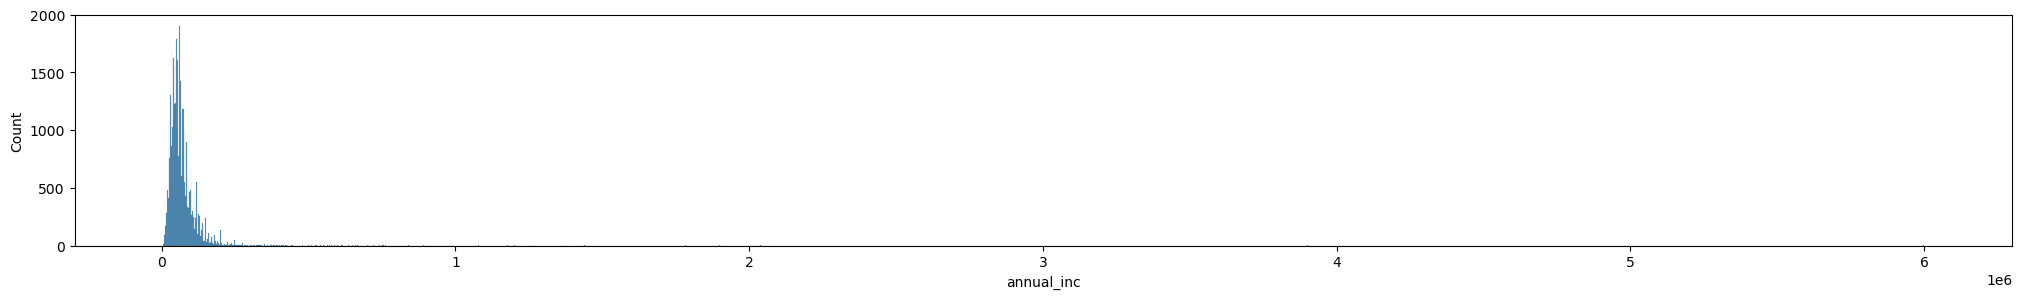

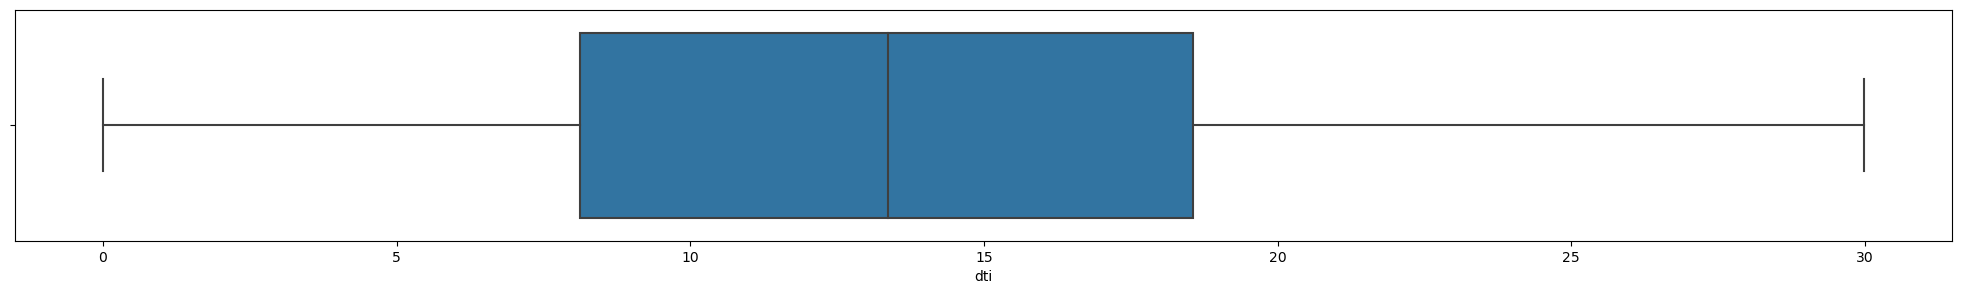

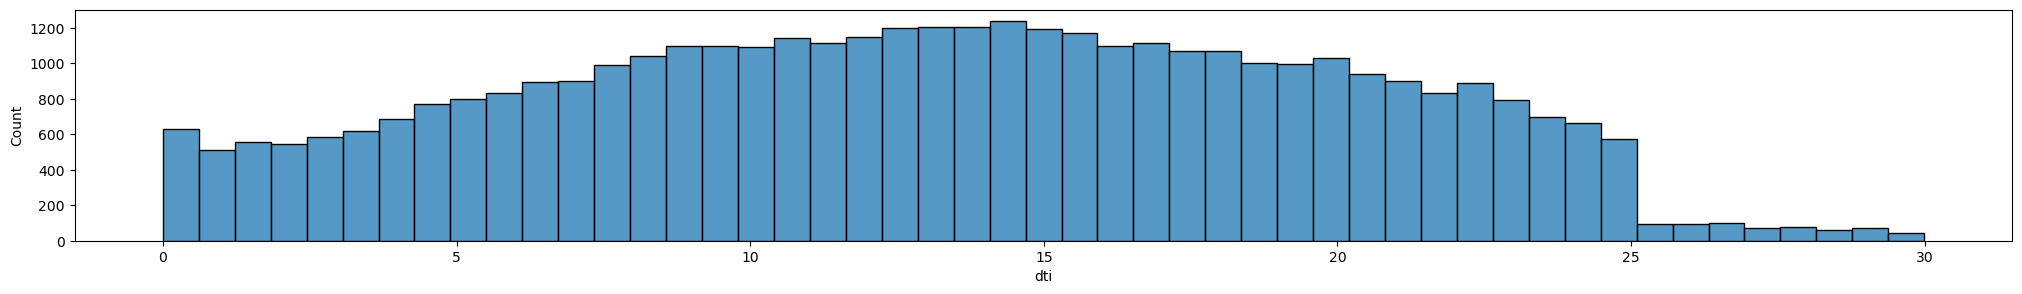

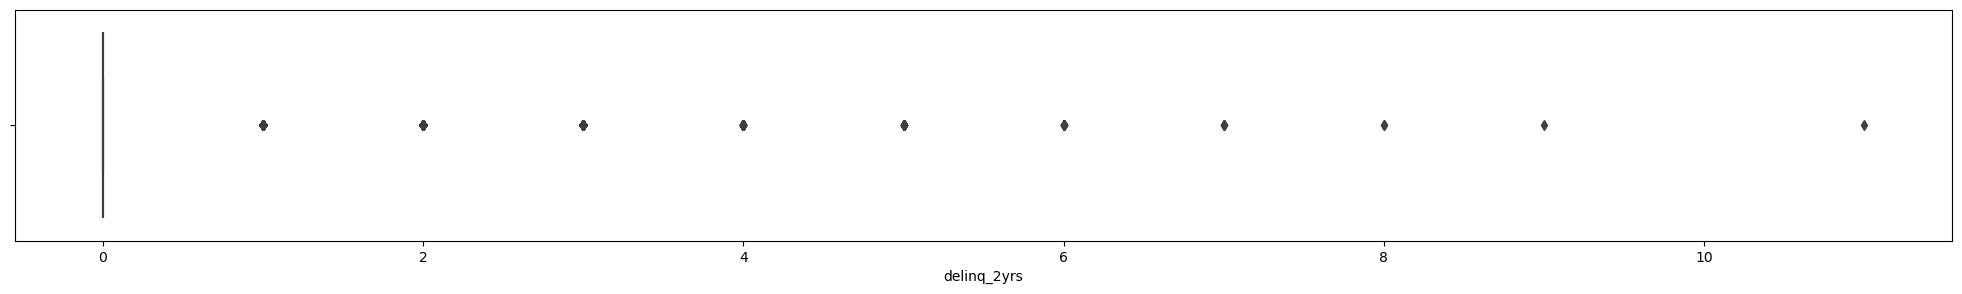

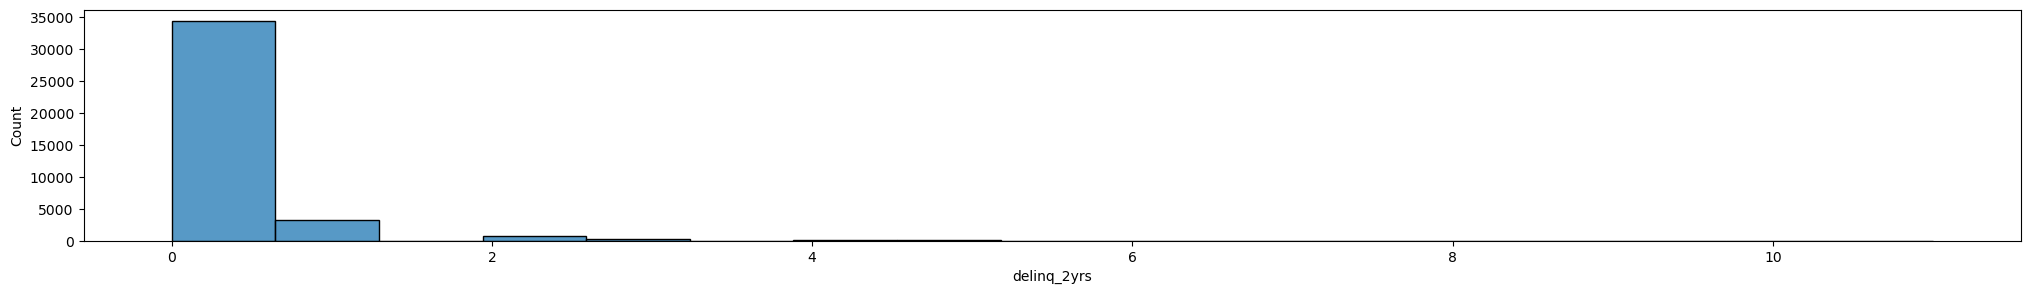

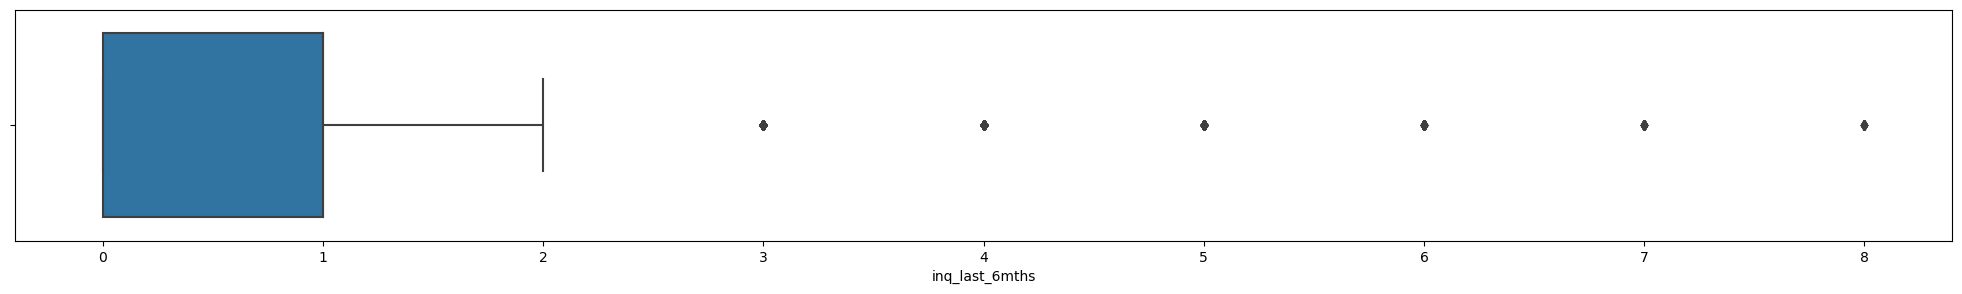

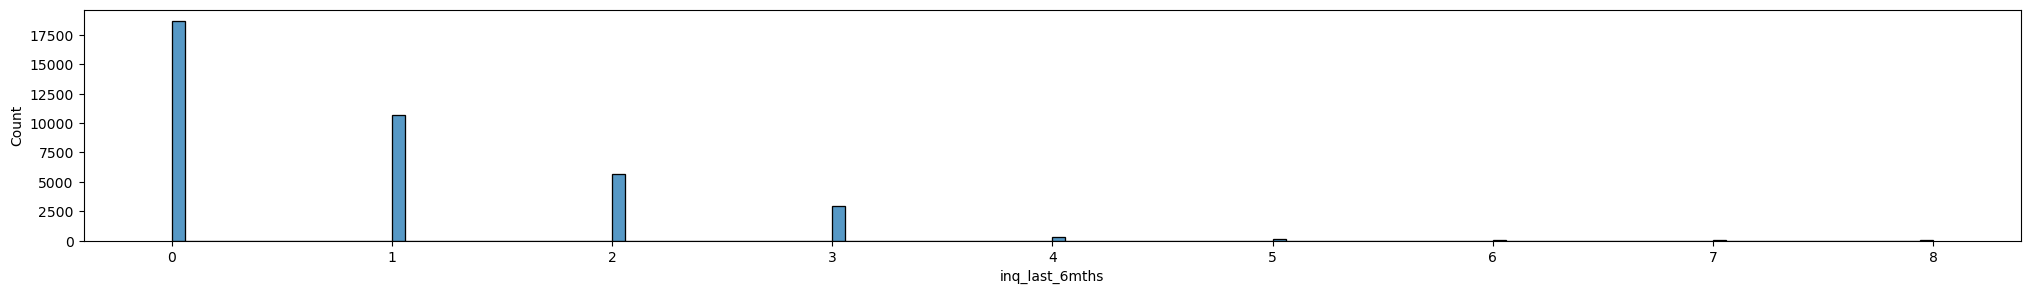

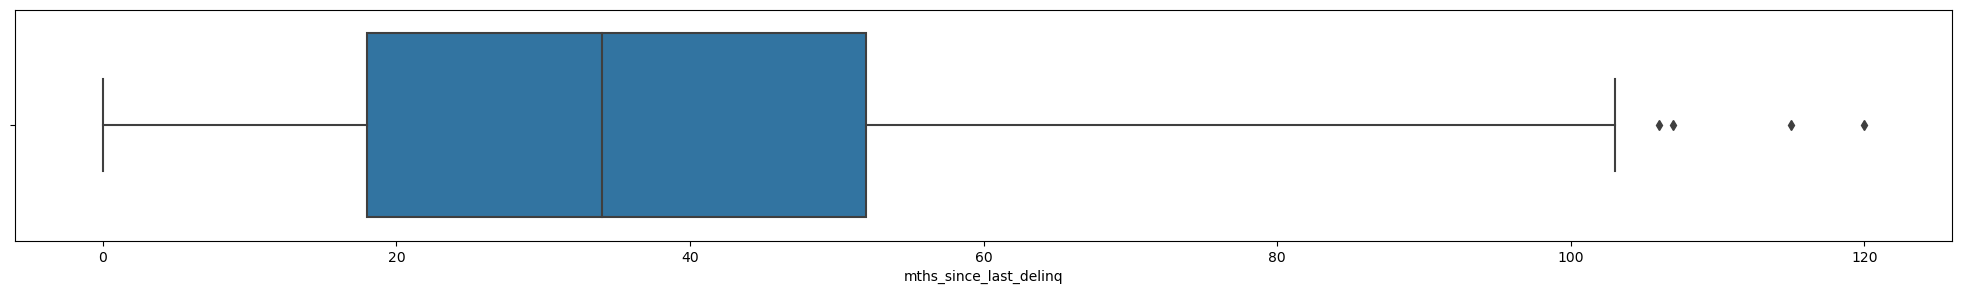

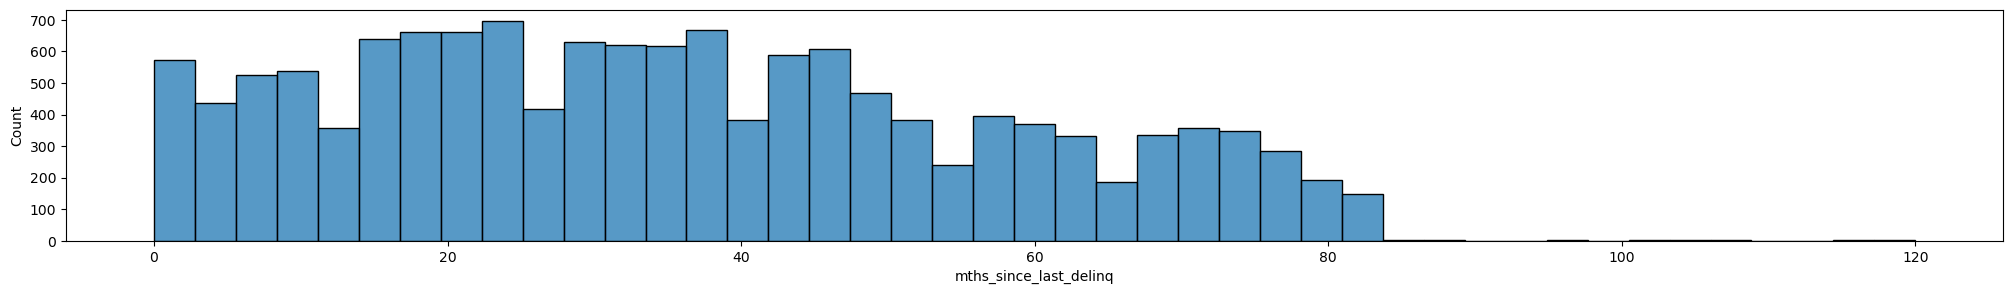

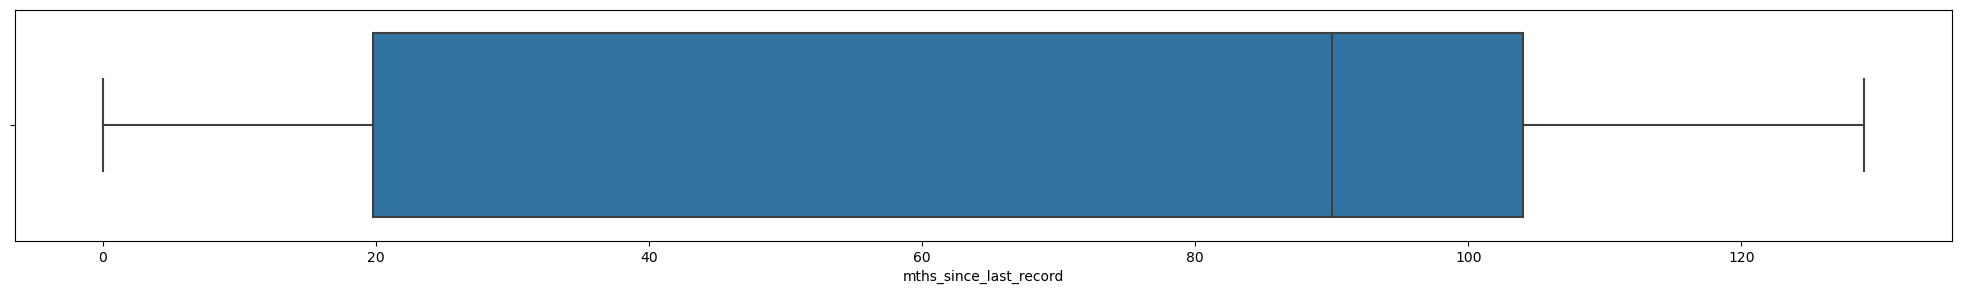

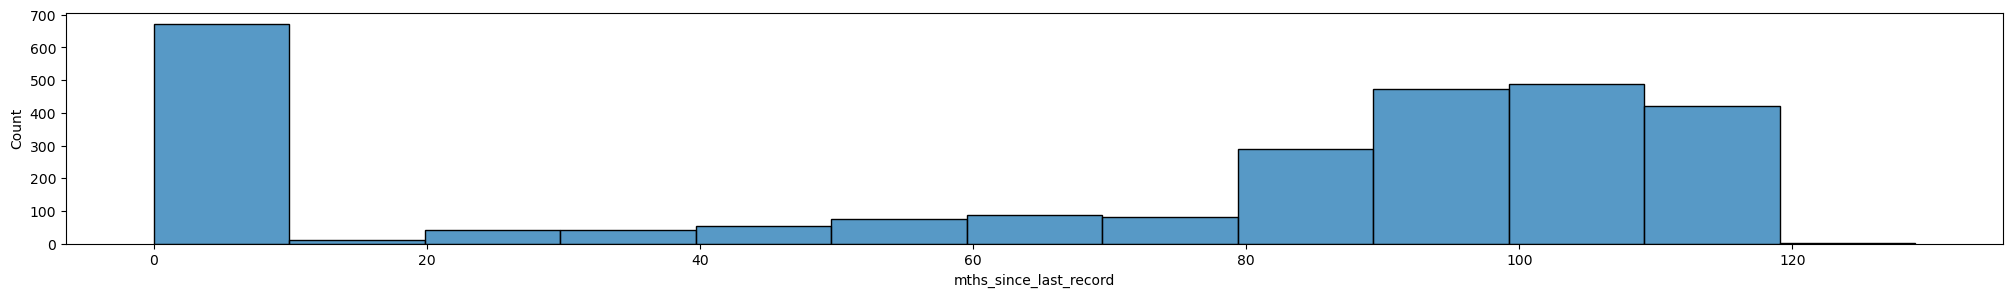

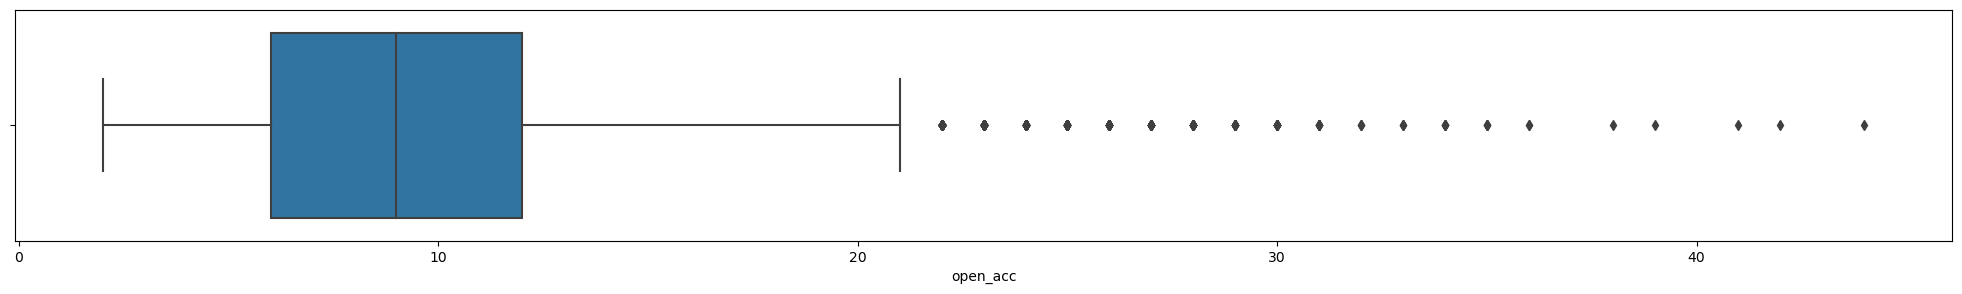

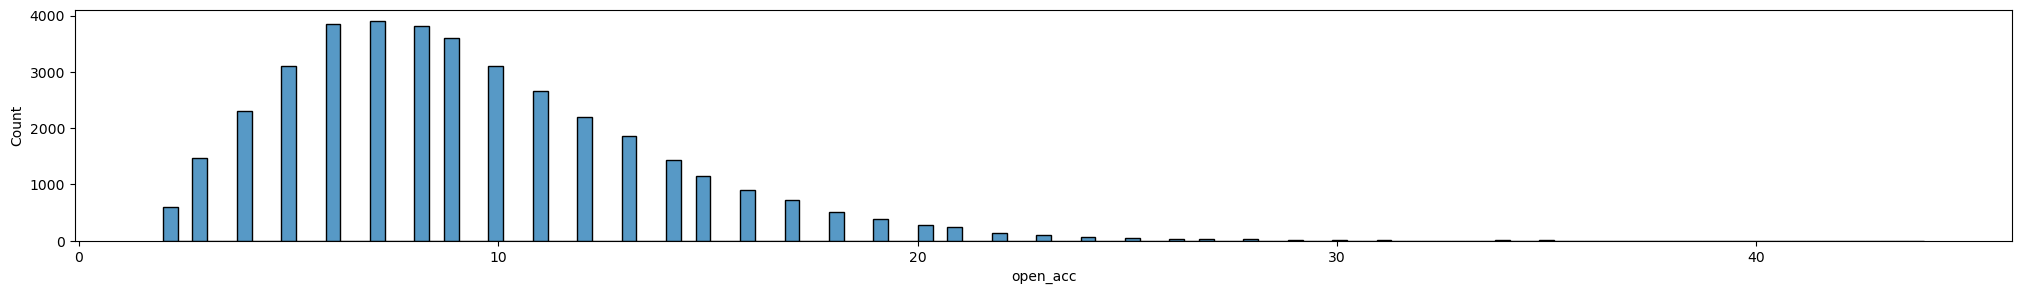

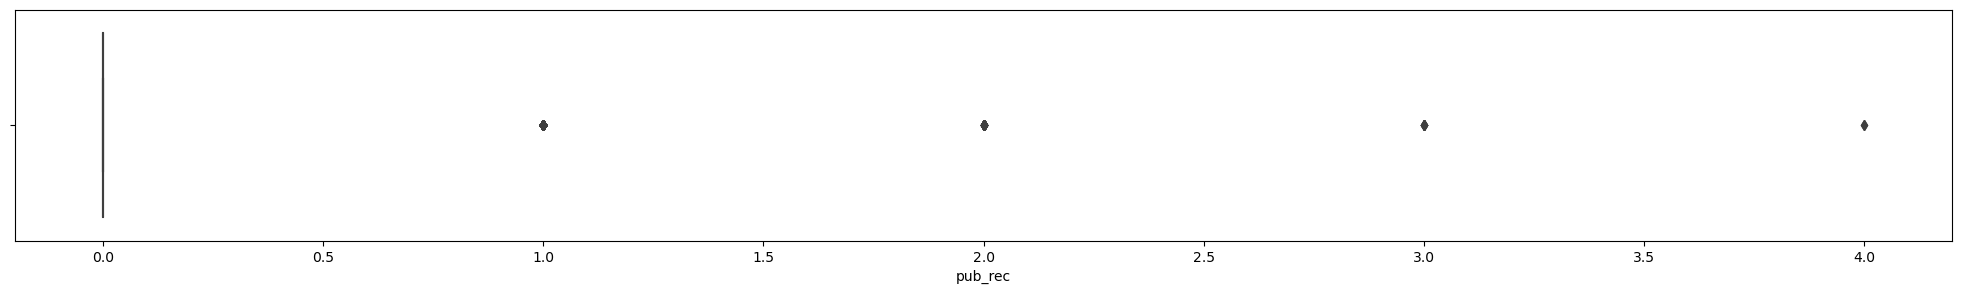

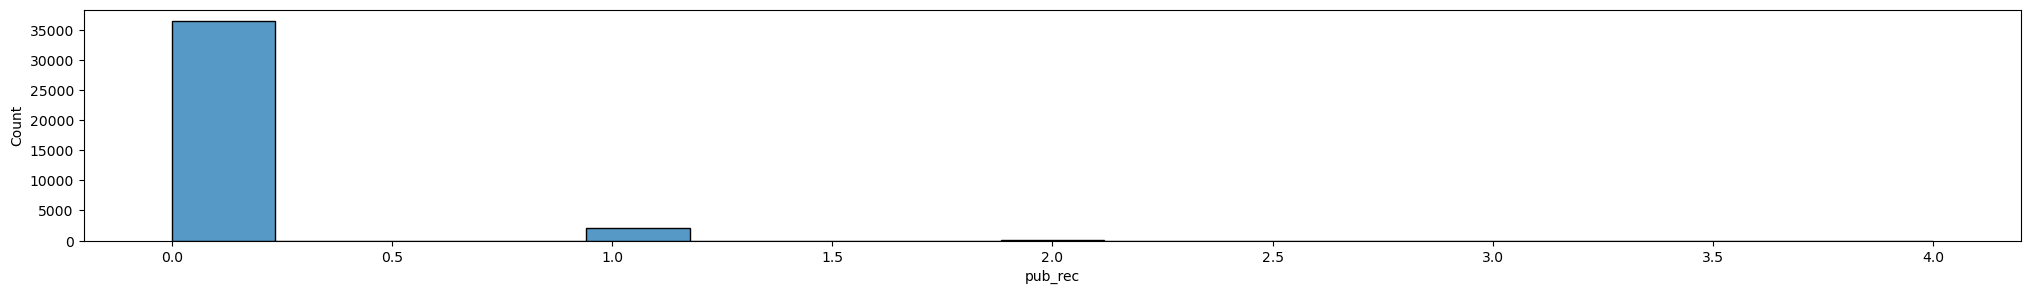

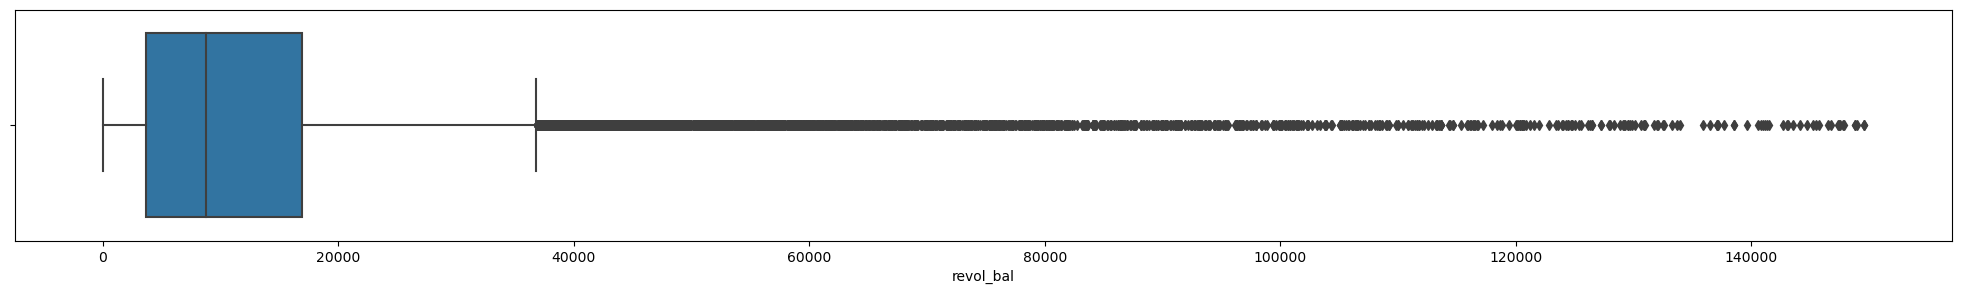

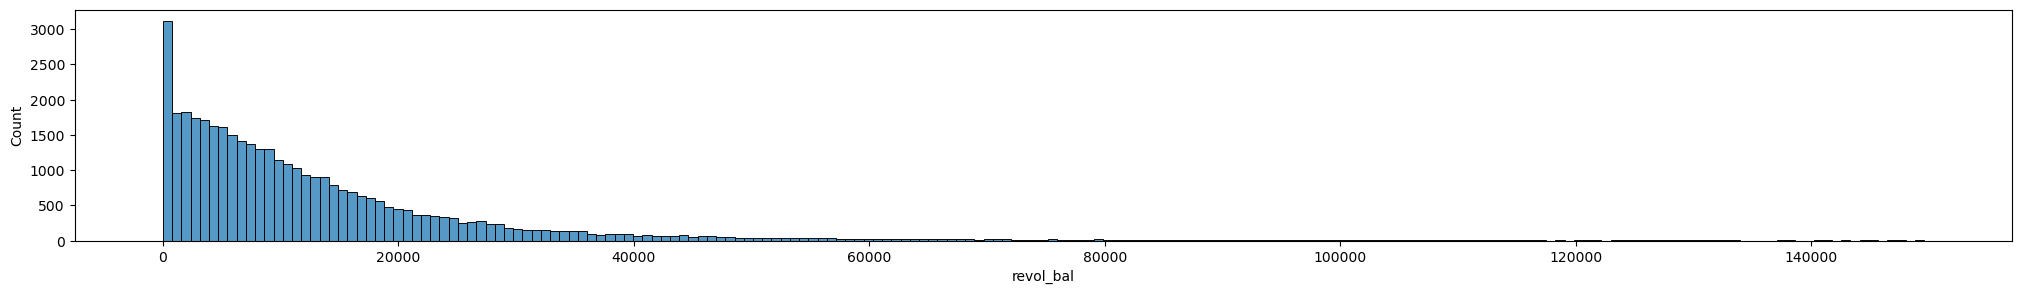

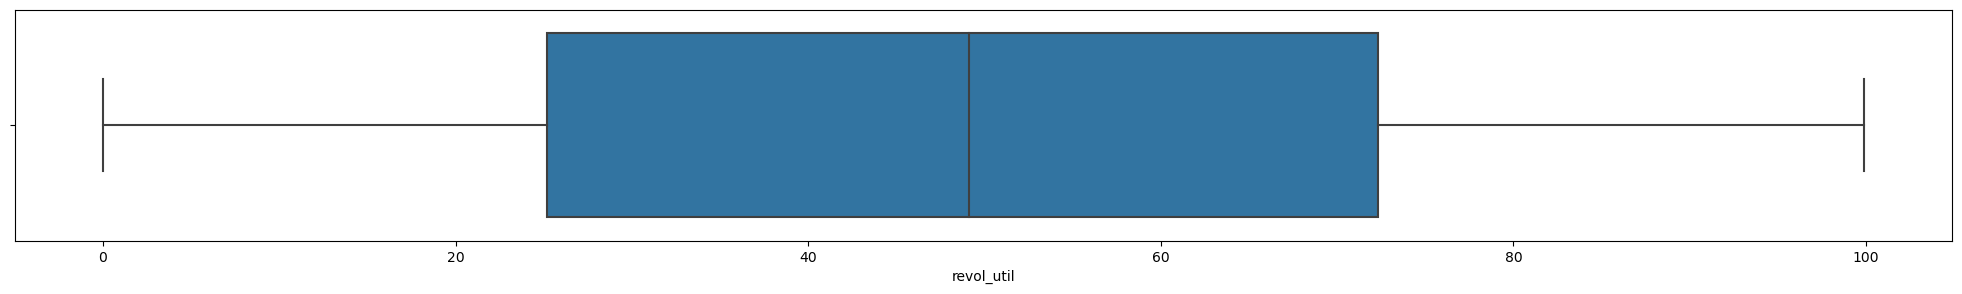

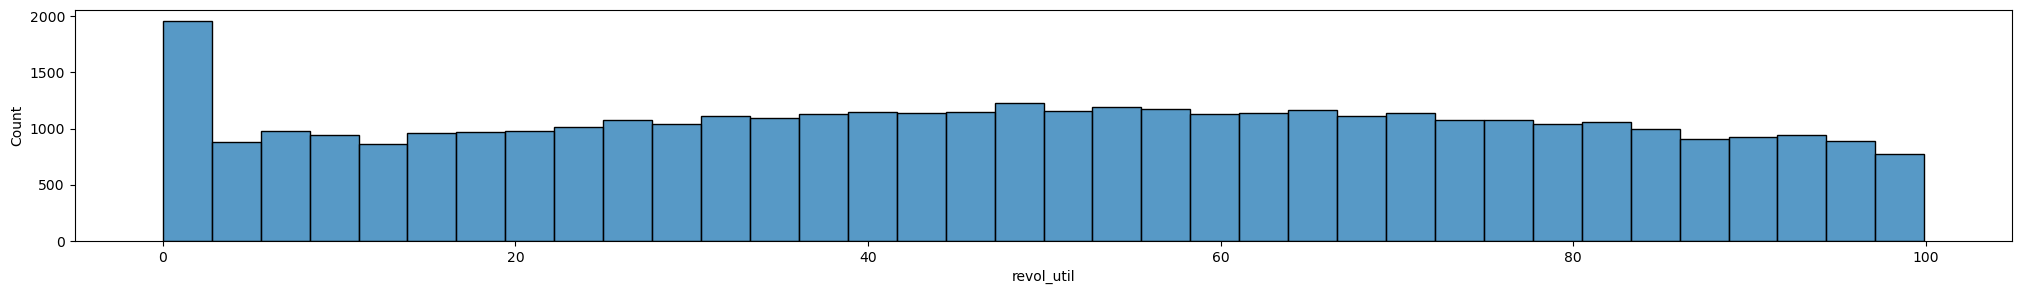

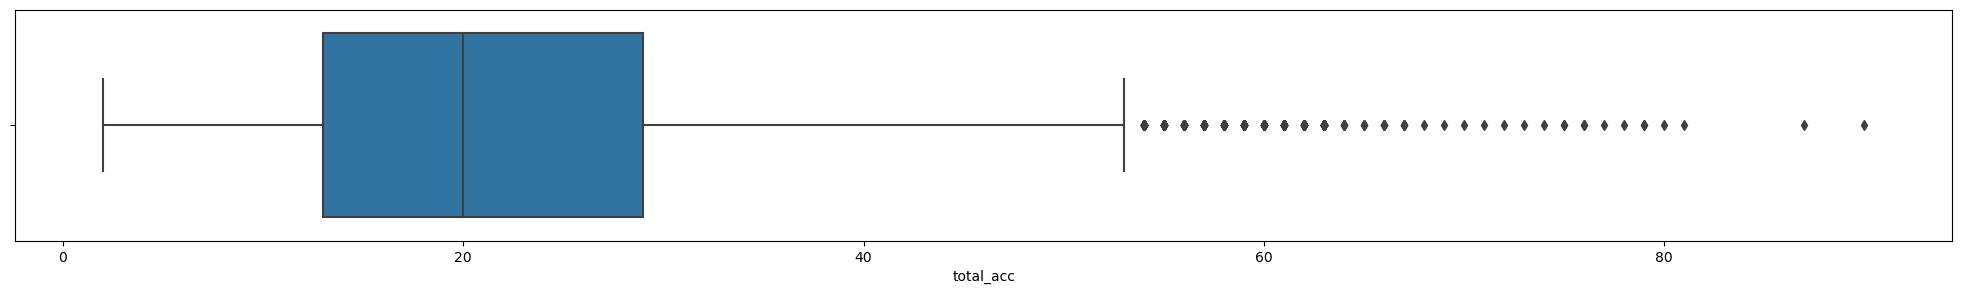

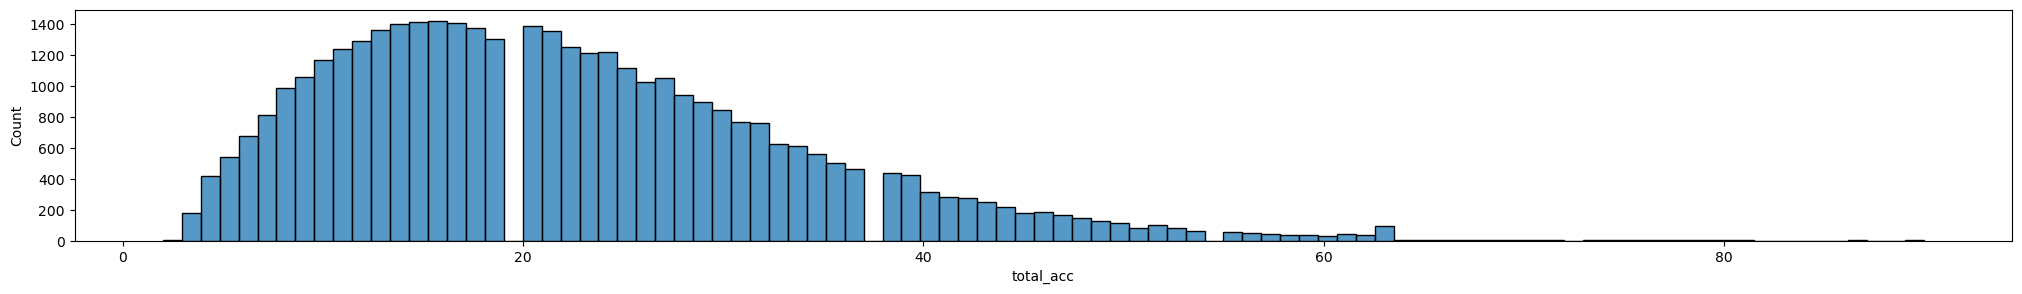

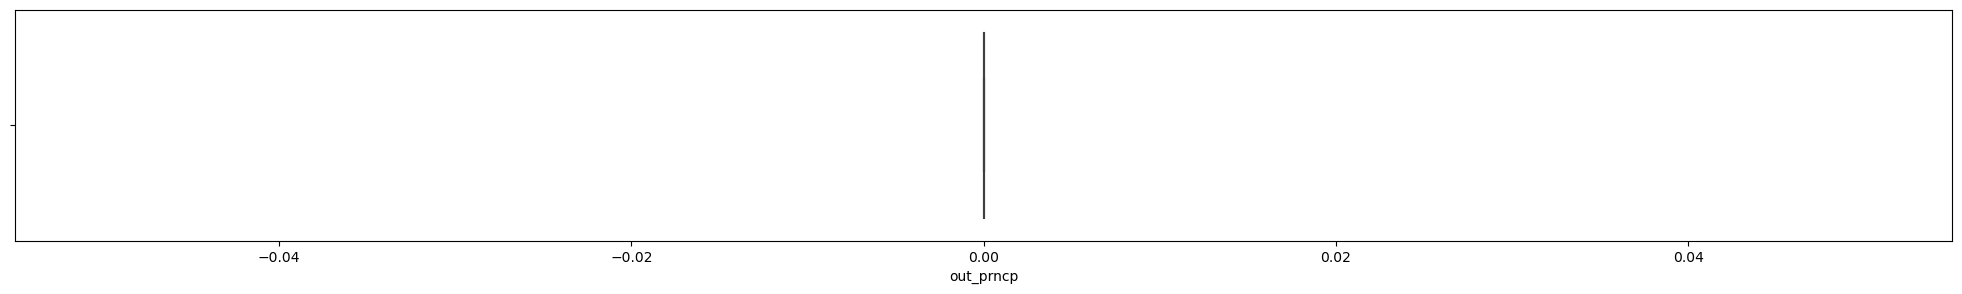

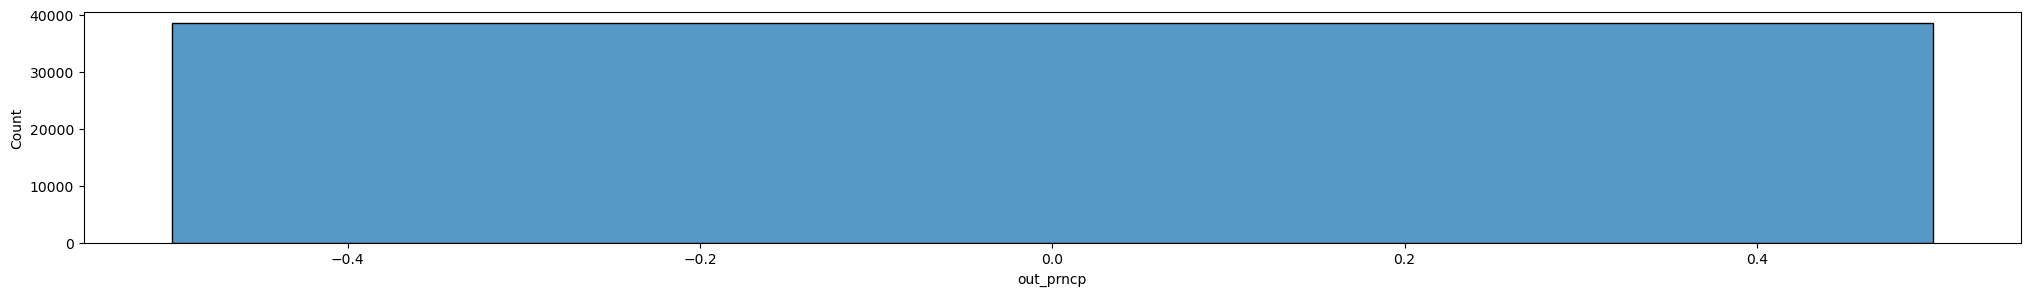

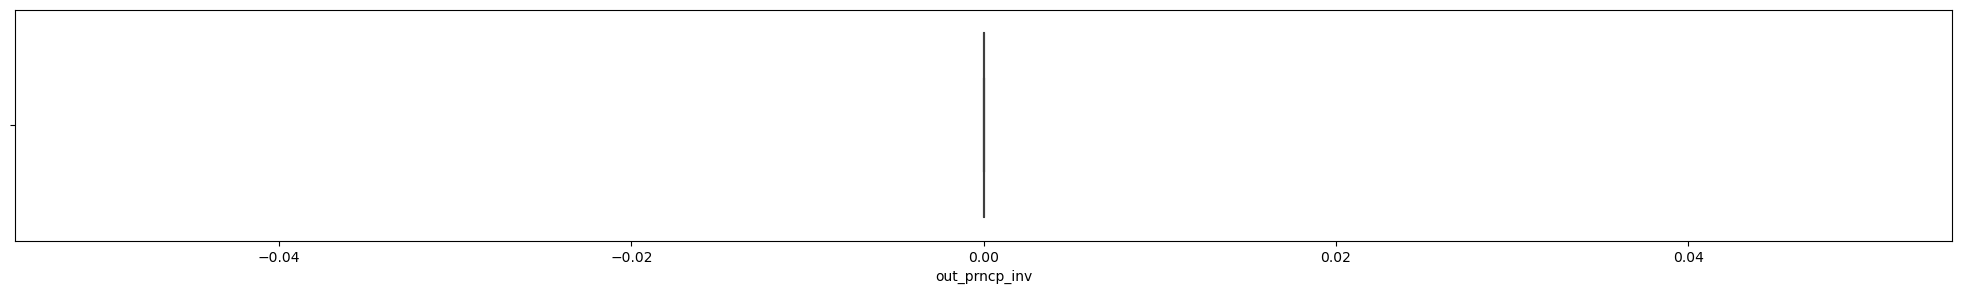

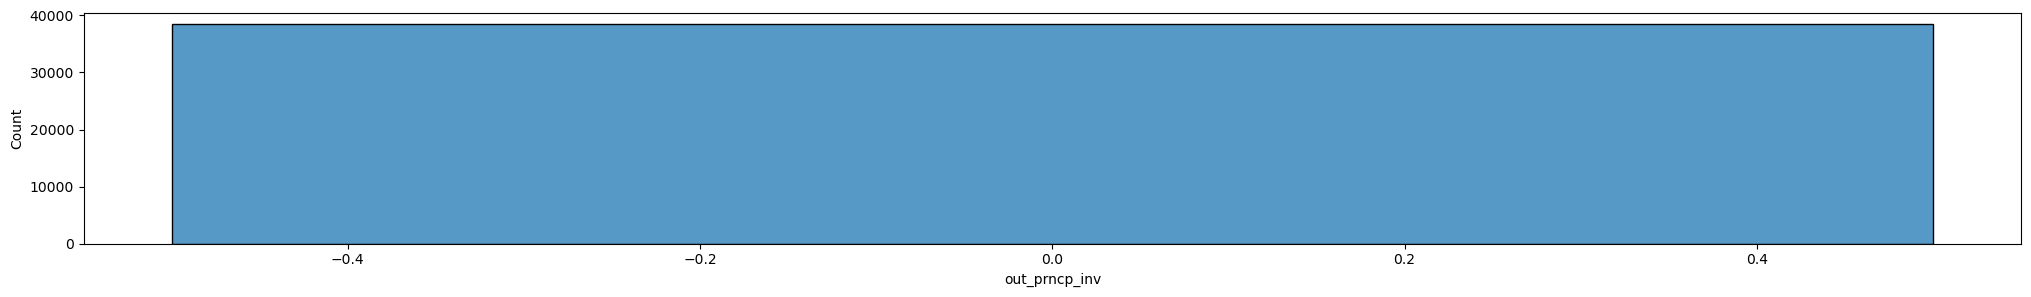

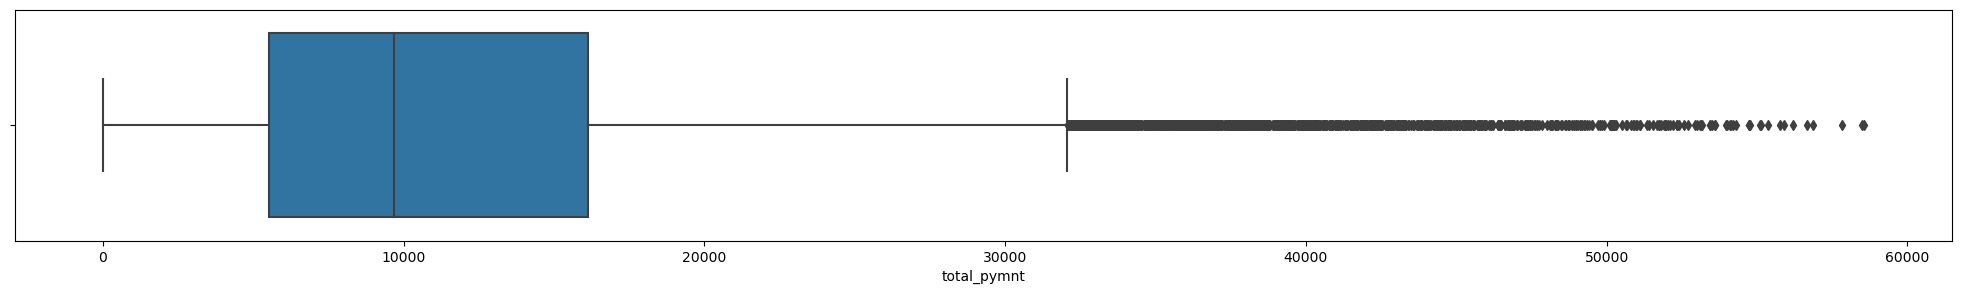

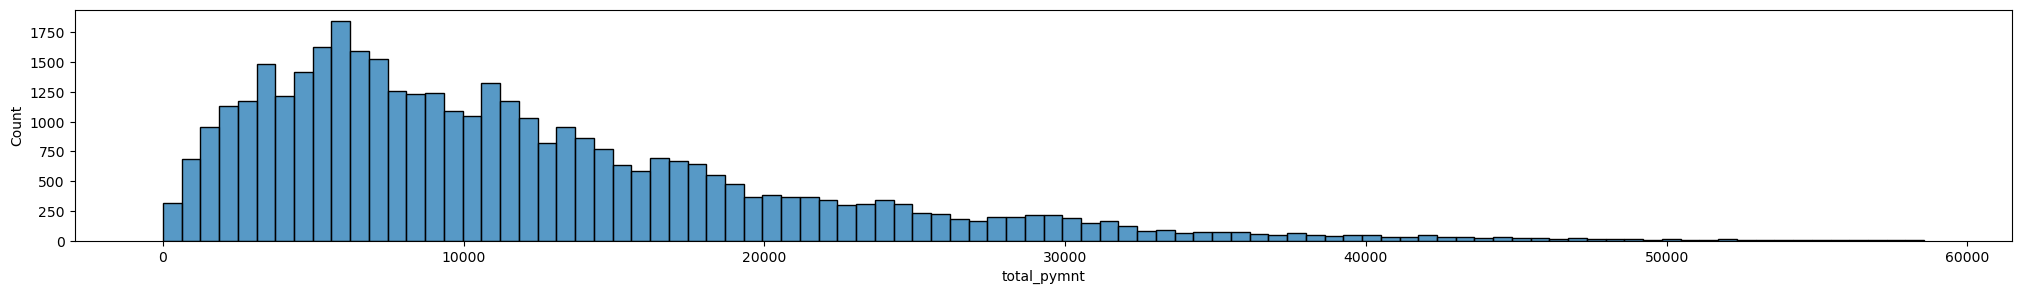

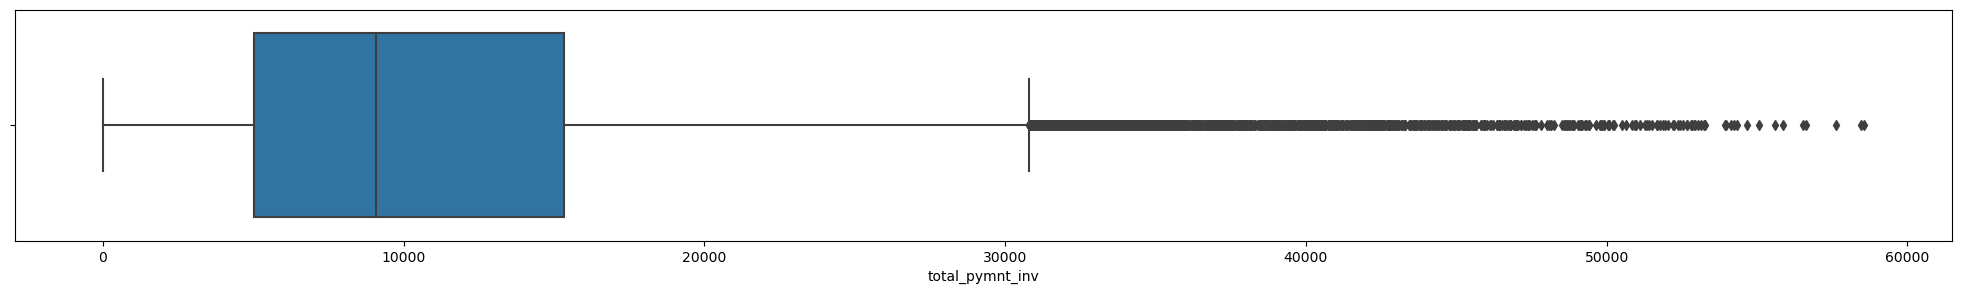

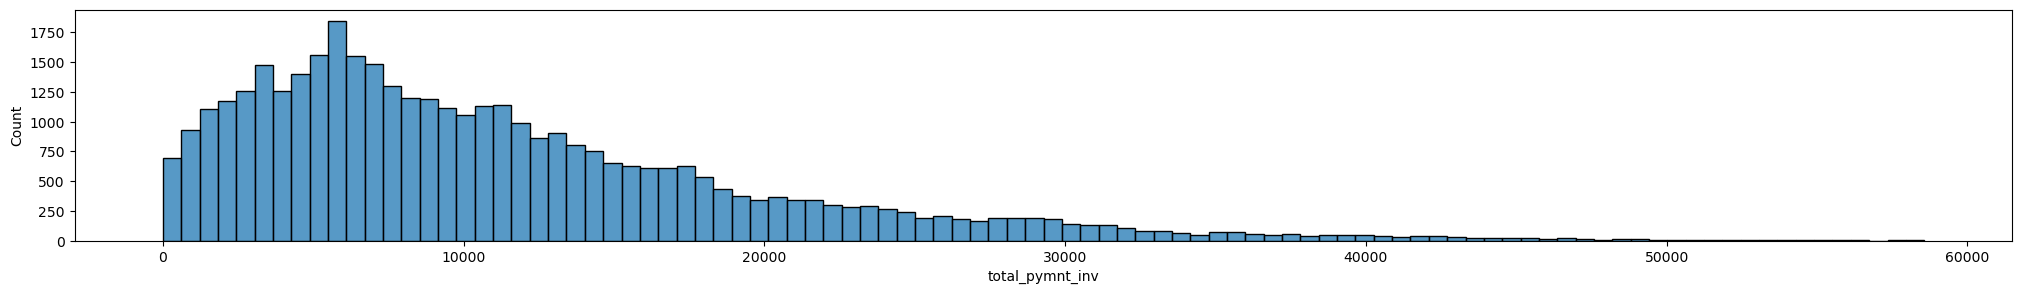

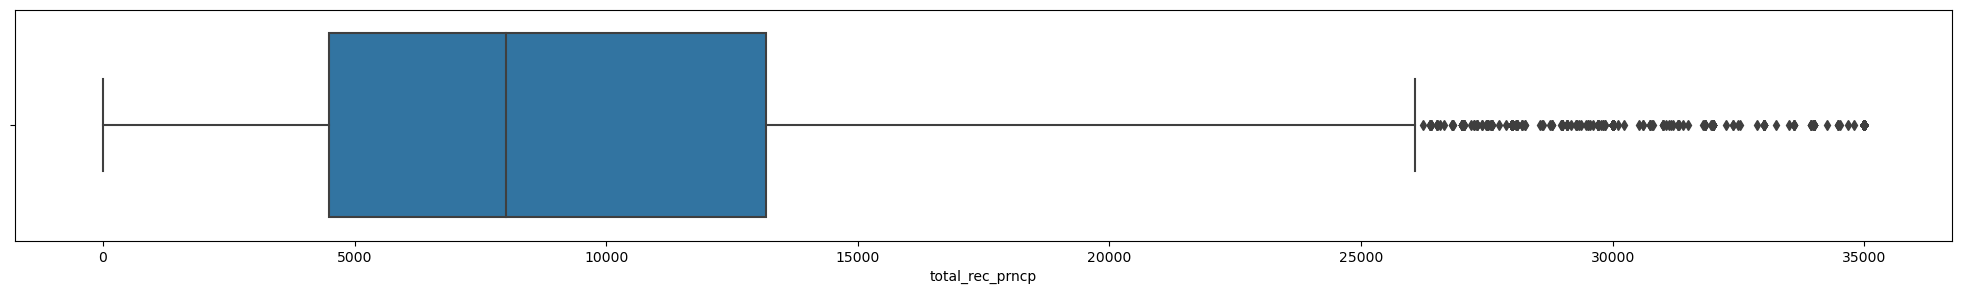

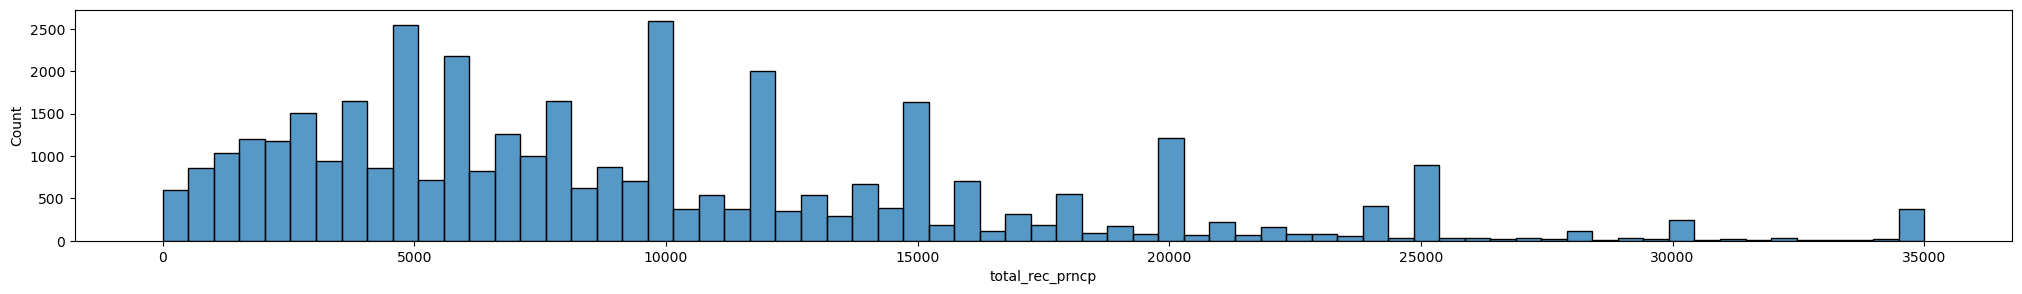

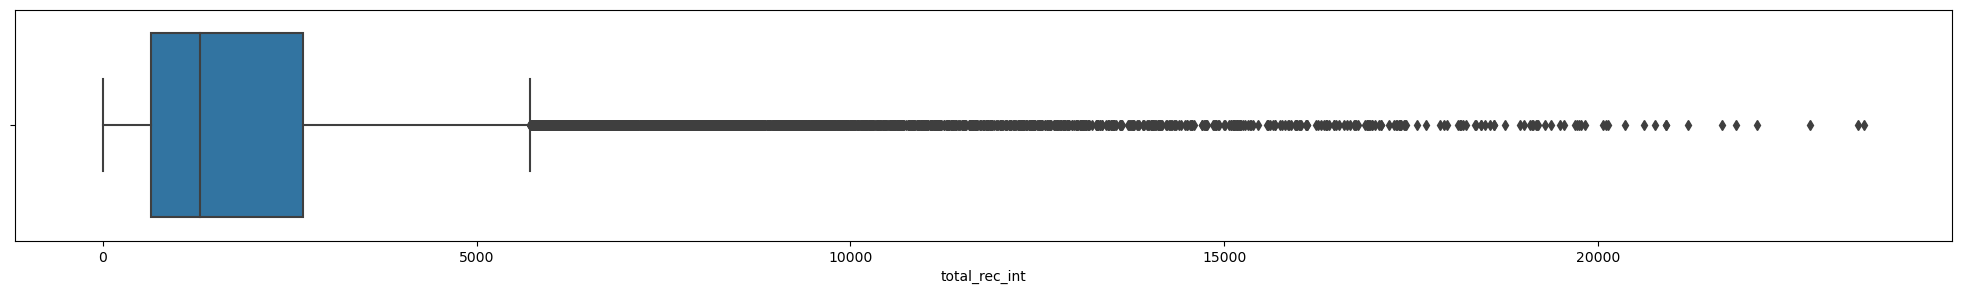

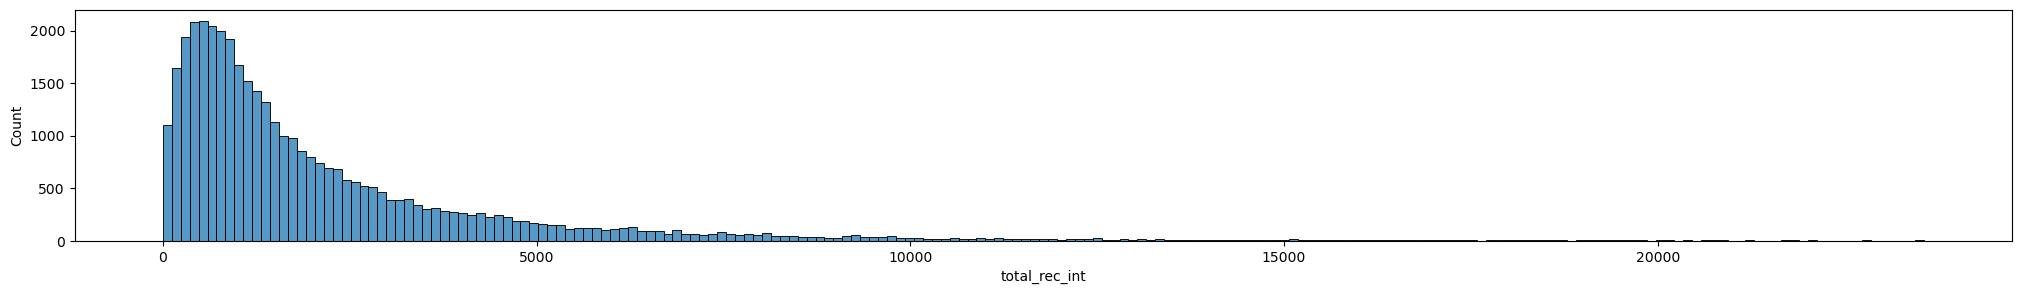

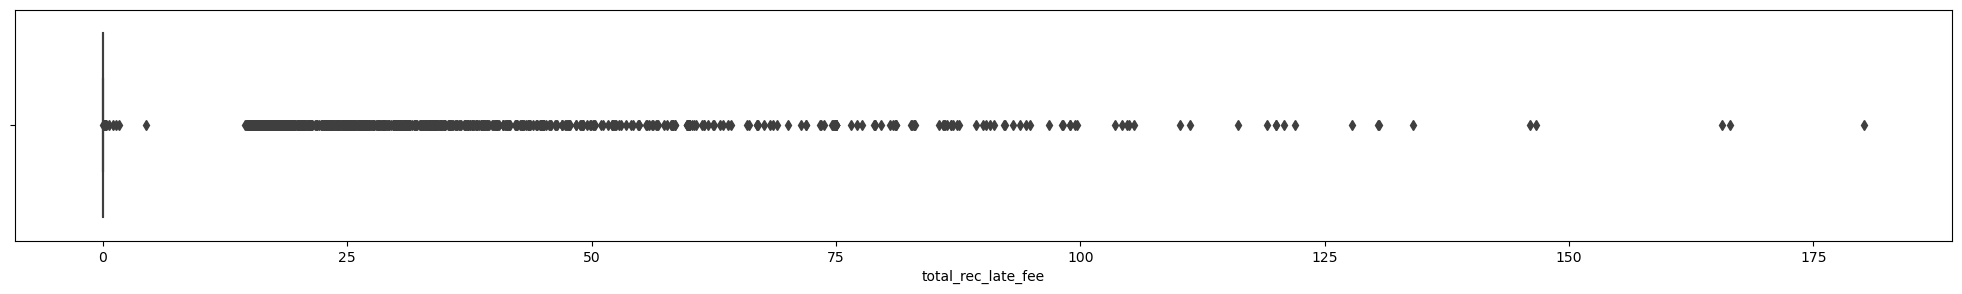

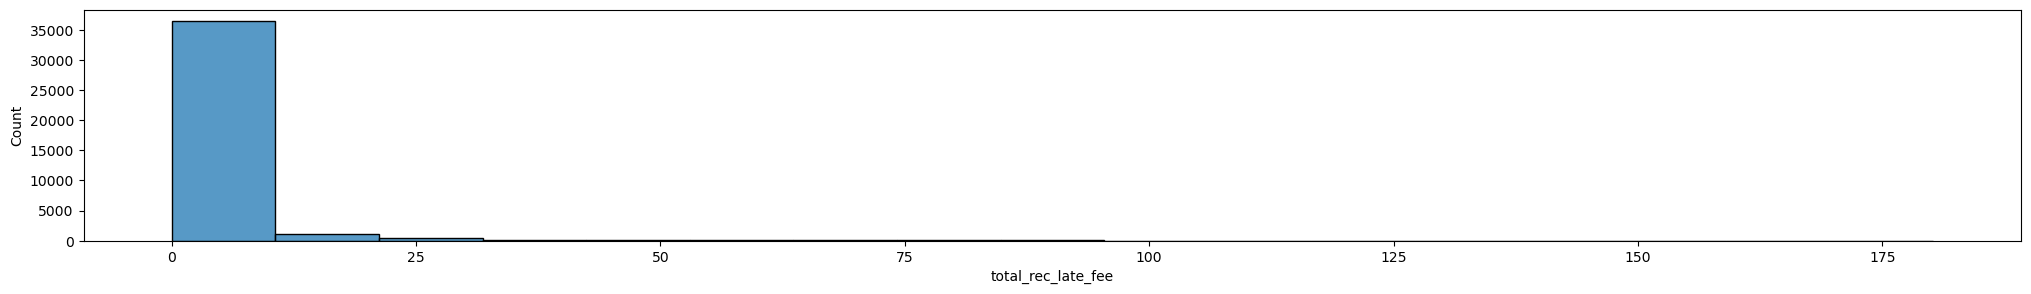

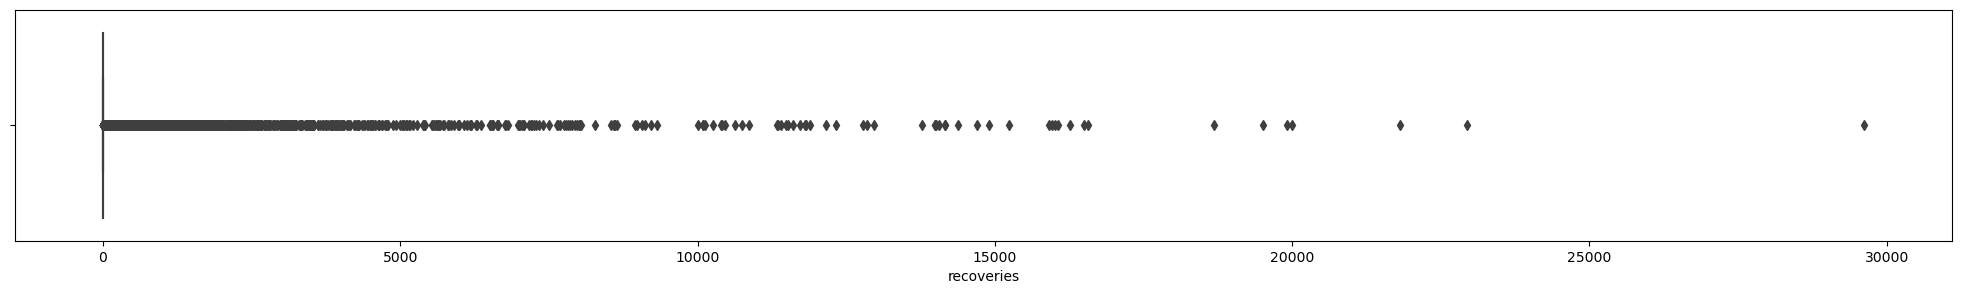

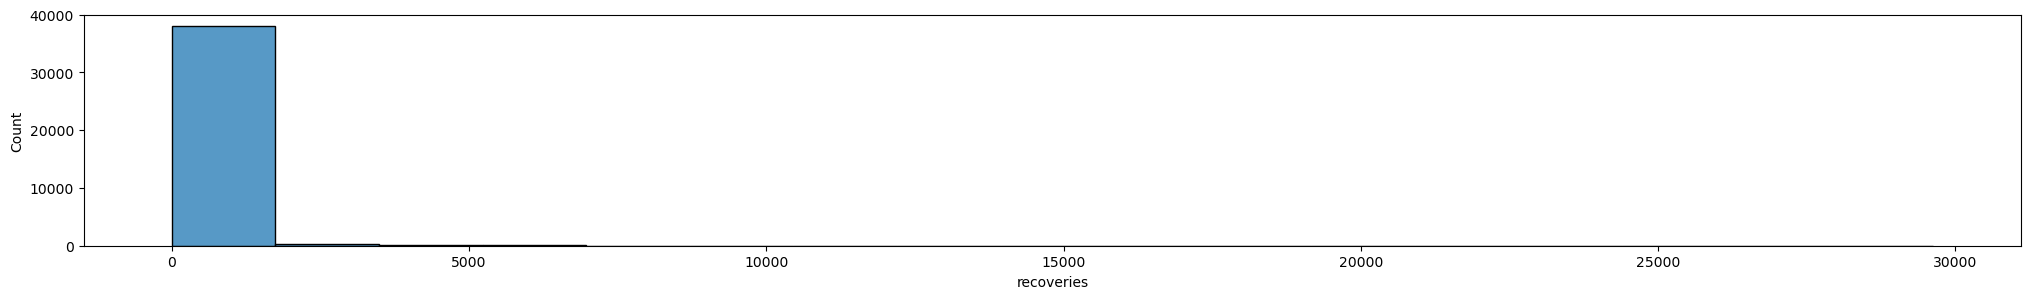

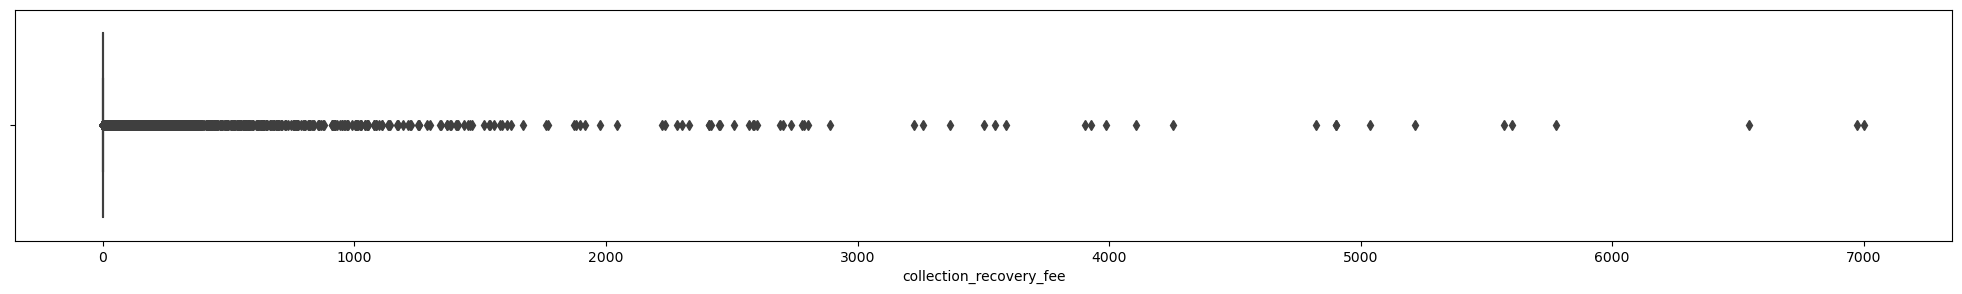

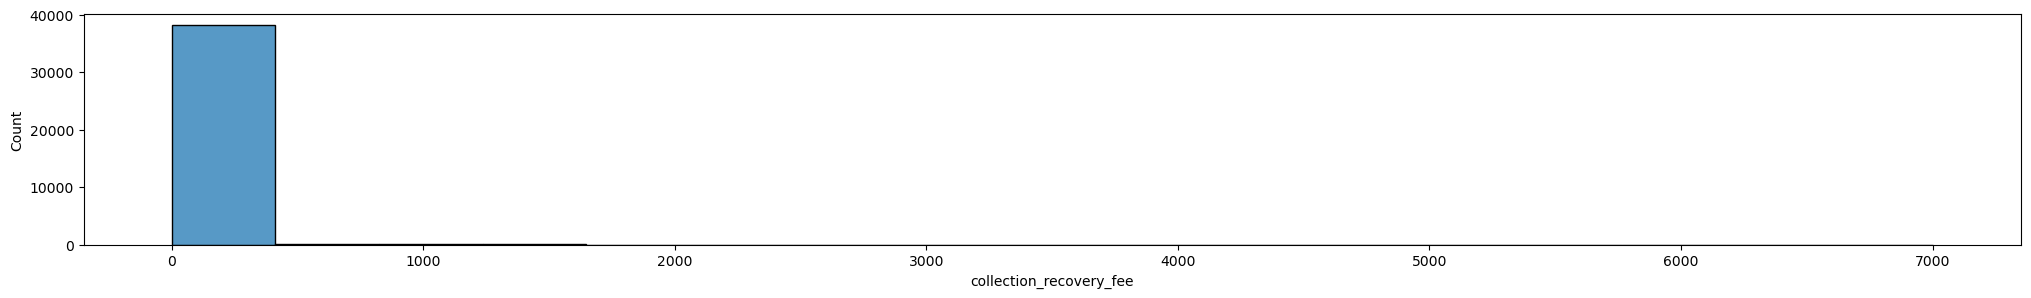

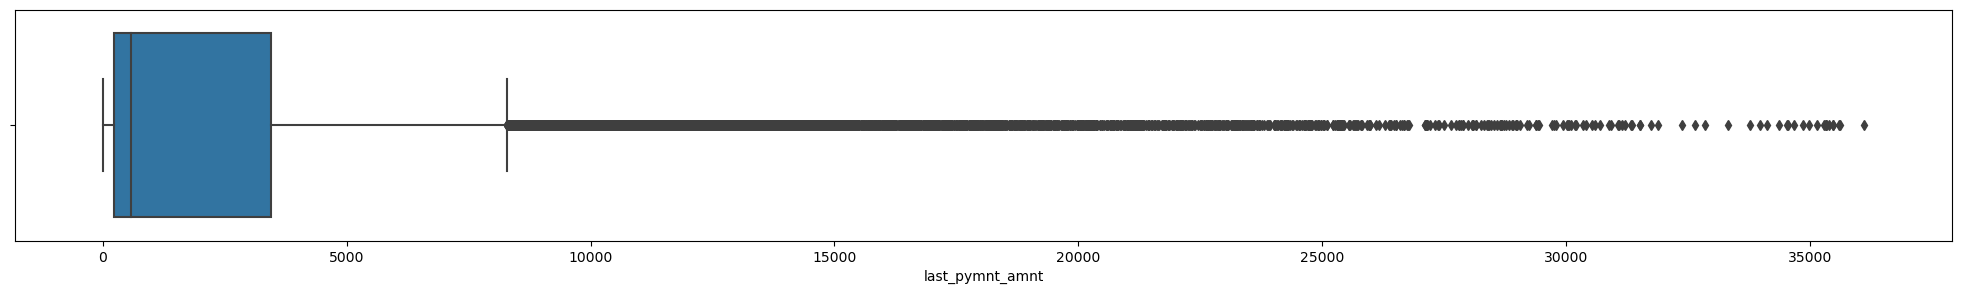

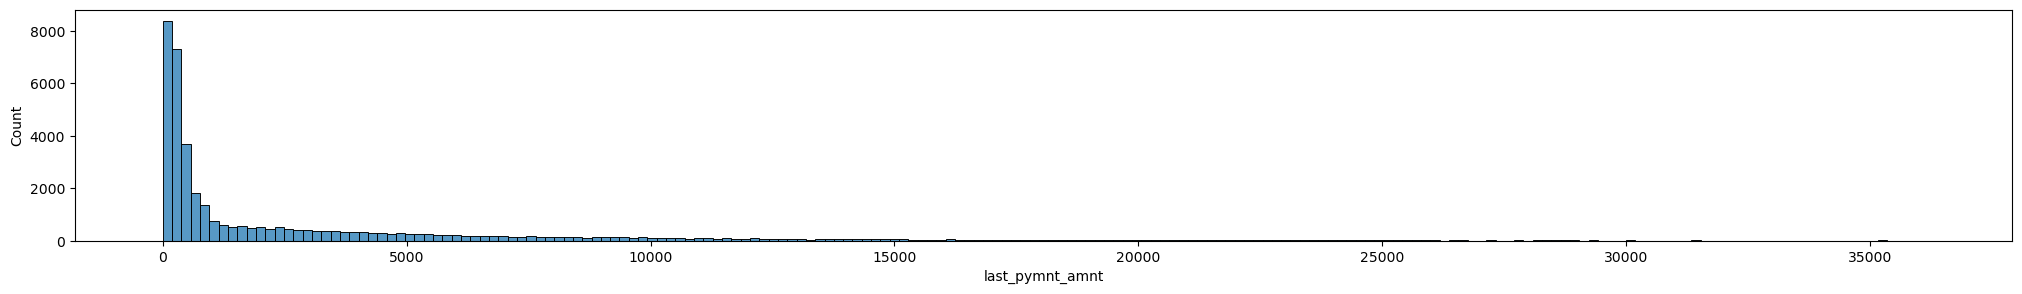

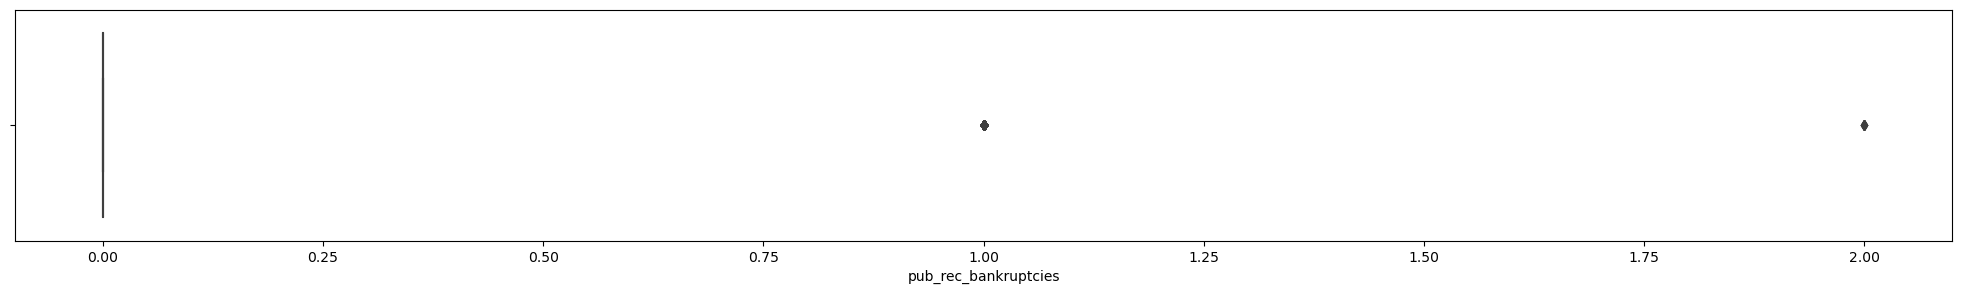

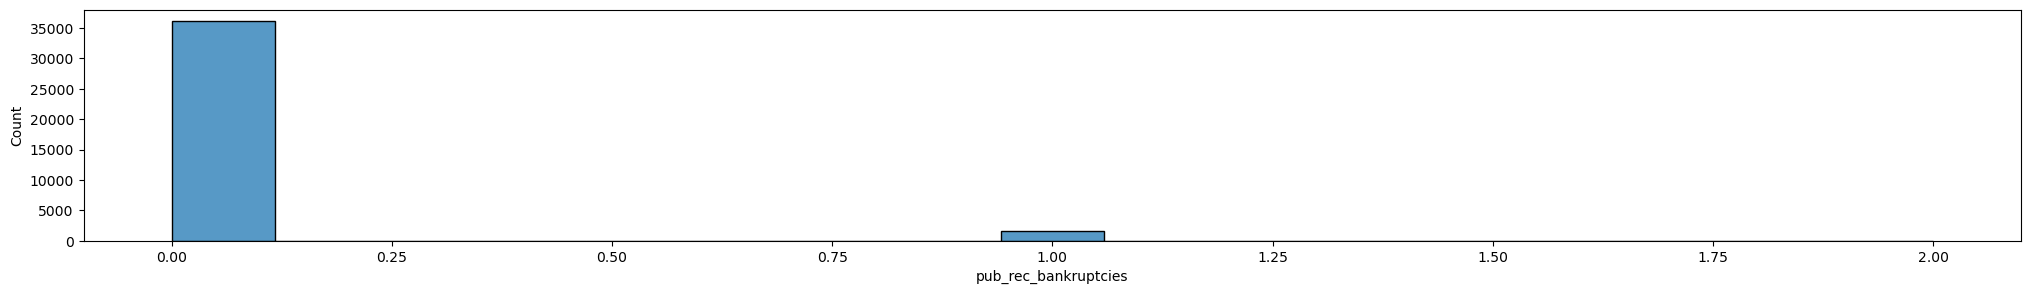

In [41]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=dataset_ddf[col])
    plt.figure()
    sns.histplot(dataset_ddf, x=col)

From the Graphs above, we find that annual_inc column have outliers (check 11th and 12th graph from the beginning). 

#### Checking if Outliers Can be Removed

If you look at the 7th graph in the loan_status, its evident that "Charged Off" has fewer entries. As long as the outlier doesn't include these "Charged Off" category, we can remove them ?

##### annual_inc

In [42]:
# certain_quantile_value_annual_inc_dfloat = np.quantile(dataset_ddf['annual_inc'], 0.999825)  # Quantile after which no defaults present
certain_quantile_value_annual_inc_dfloat = np.quantile(dataset_ddf['annual_inc'], 0.99)
dataset_above_certain_annual_inc_ddf = dataset_ddf[ dataset_ddf['annual_inc'] >= certain_quantile_value_annual_inc_dfloat ]
dataset_above_certain_annual_inc_wth_defaults_ddf = dataset_above_certain_annual_inc_ddf[ dataset_above_certain_annual_inc_ddf['loan_status'] == "Charged Off" ]

In [43]:
certain_quantile_value_annual_inc_dfloat

234143.99999999878

In [44]:
dataset_above_certain_annual_inc_ddf.shape

(386, 40)

In [45]:
dataset_above_certain_annual_inc_wth_defaults_ddf.shape

(43, 40)

The quantity removed is small<br>
Filtering out the last 1 percentile of income to filter out outliers

In [46]:
dataset_ddf = dataset_ddf[ dataset_ddf['annual_inc'] < certain_quantile_value_annual_inc_dfloat ]

Plotting all numerical graphs again to see the difference

<Axes: xlabel='annual_inc', ylabel='Count'>

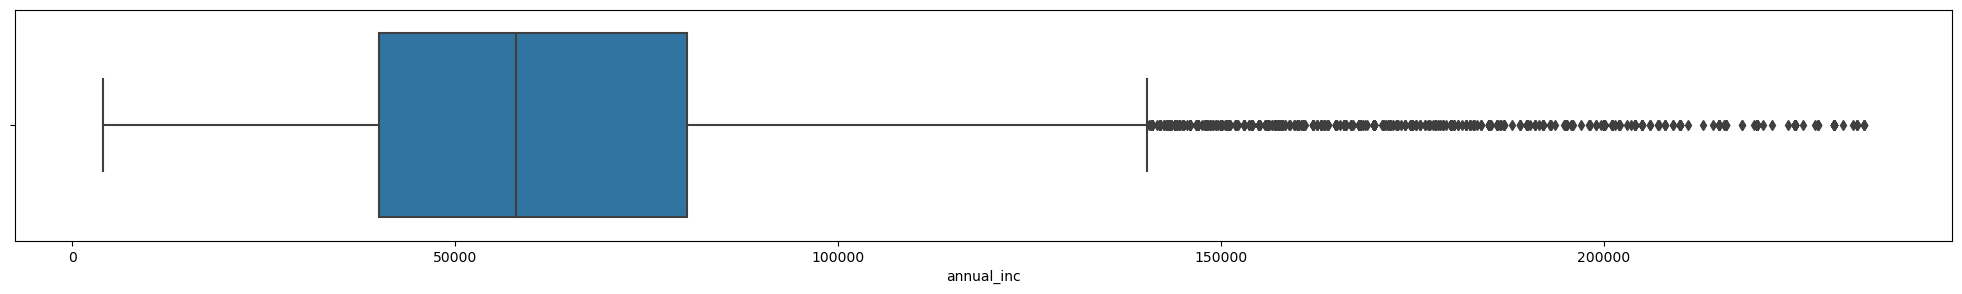

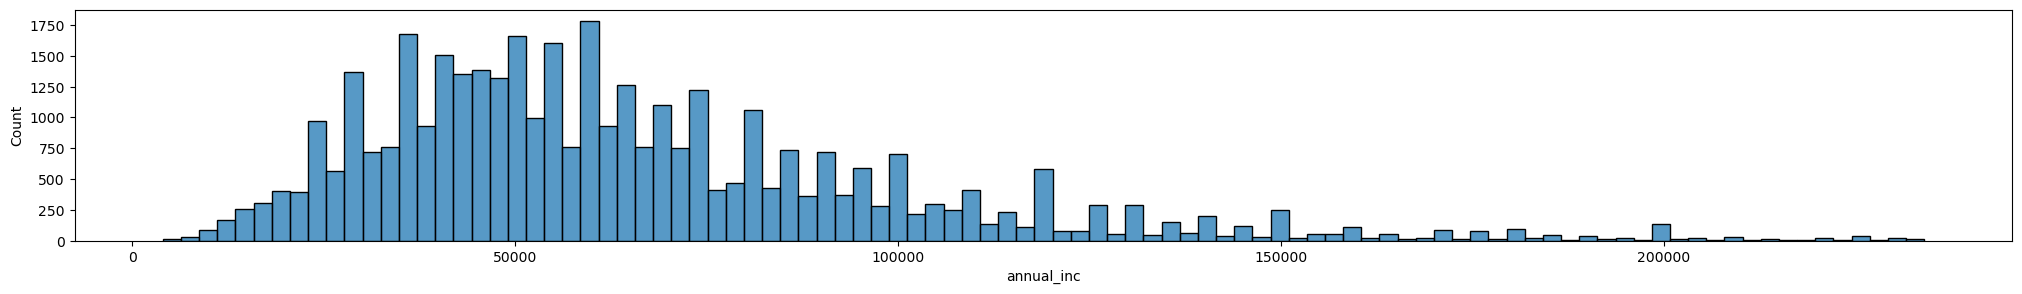

In [47]:
plt.figure()
sns.boxplot(x=dataset_ddf['annual_inc'])
plt.figure()
sns.histplot(dataset_ddf, x='annual_inc')

## Bivariate Analysis

### Numerical Correlation Matrix

<Axes: >

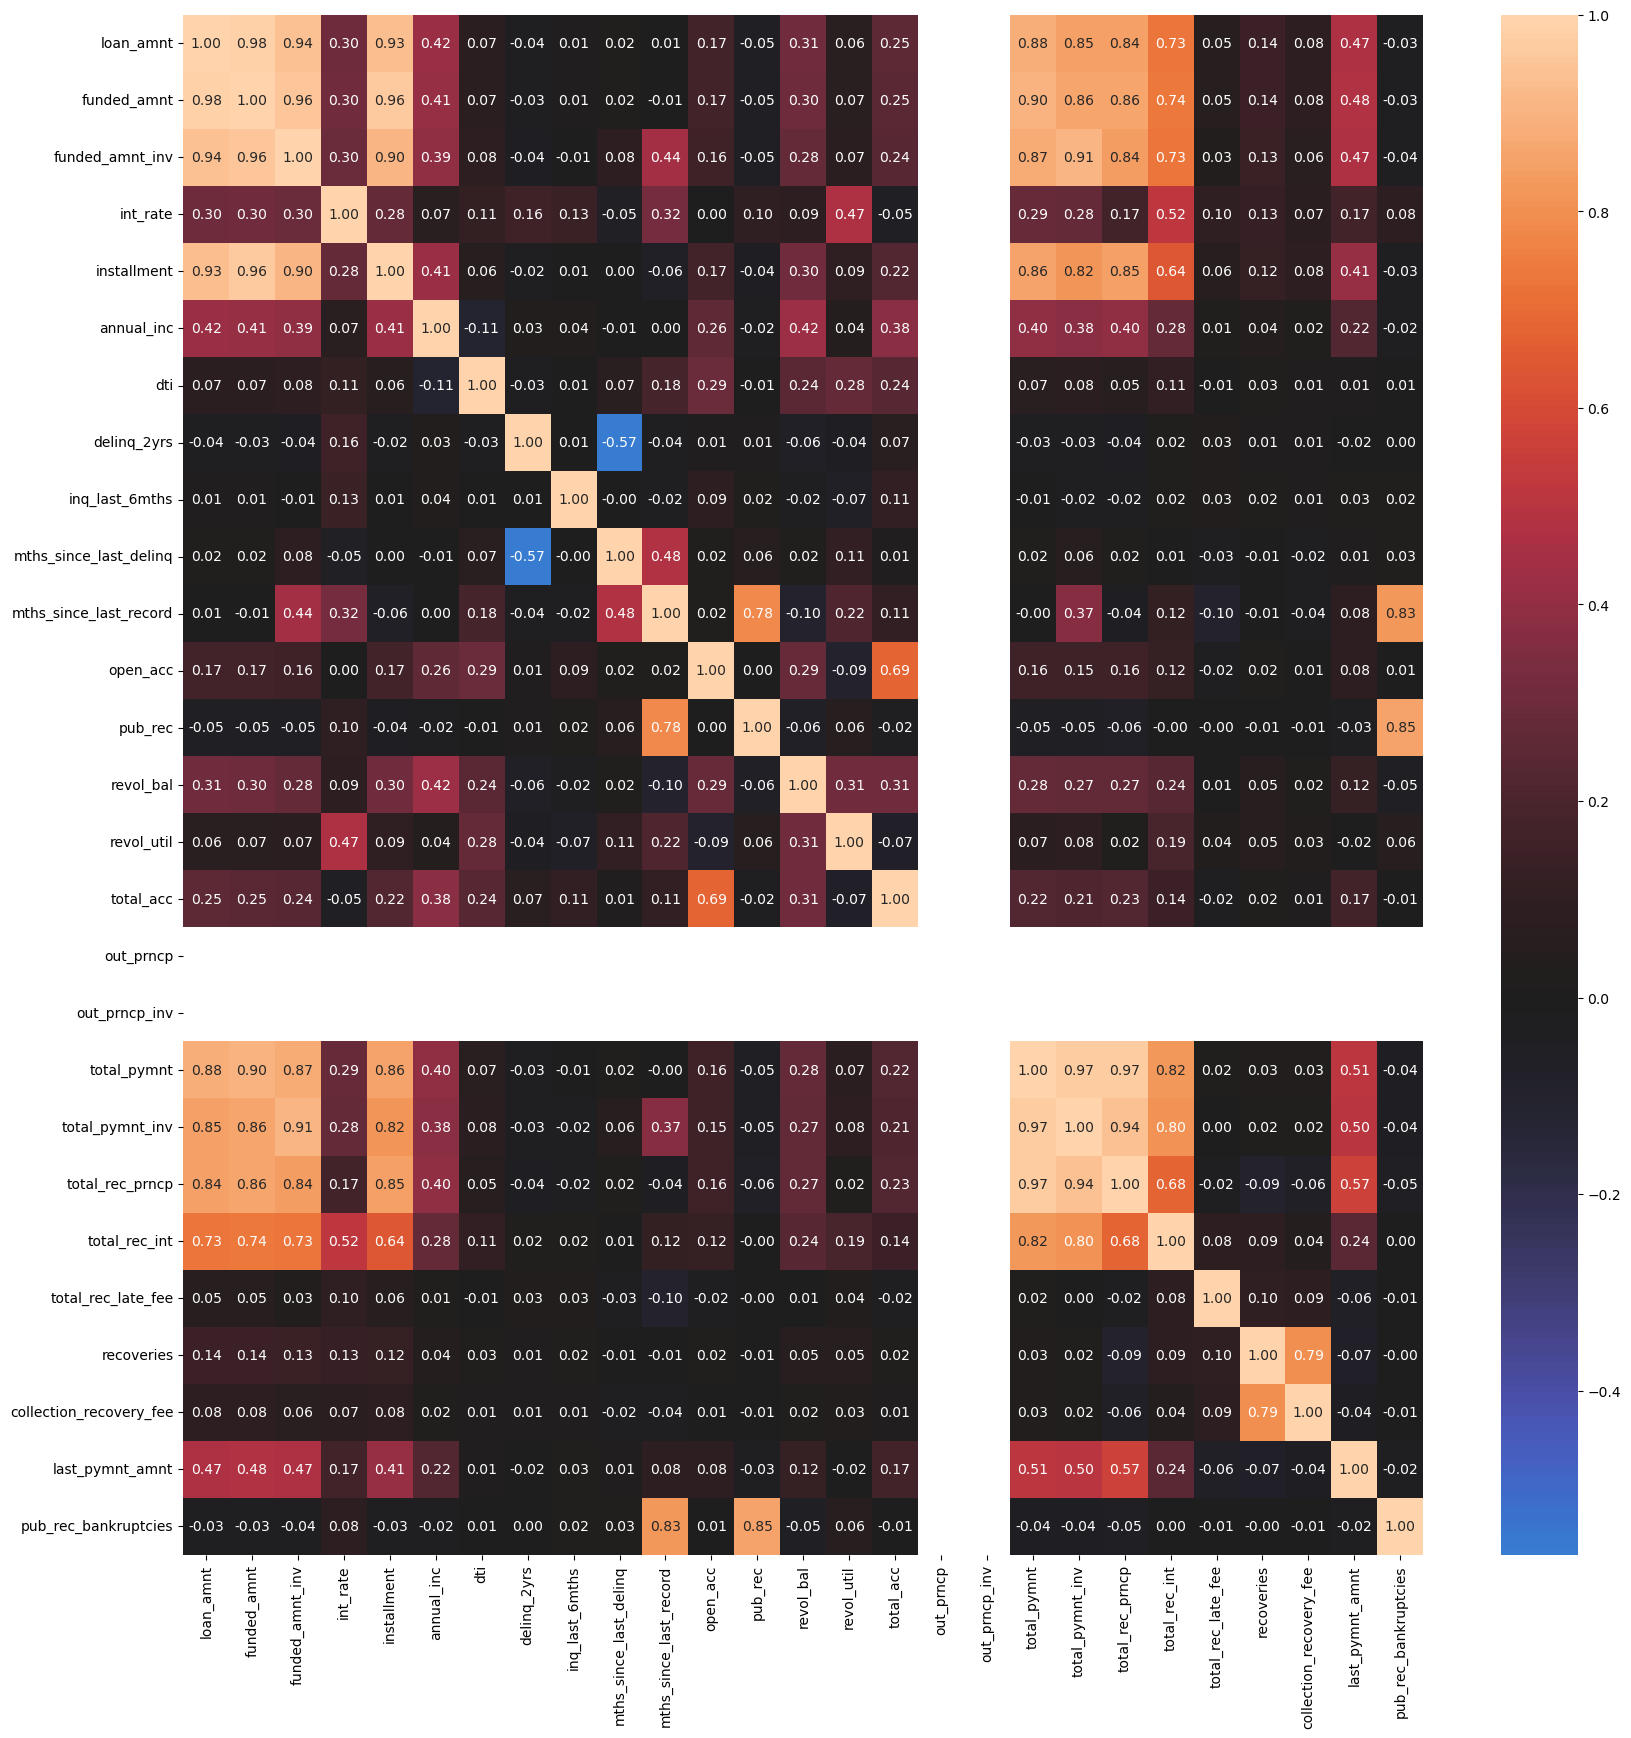

In [48]:
correlation_matrix_ddf = dataset_ddf[num_cols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix_ddf, annot=True, fmt='.2f', center=0, )

Conclusion:<br>
+ Most of the relationships are random
+ Non of the features have significant negative correlation
+ Buckets with significant Positive Correlation <more than 70% correlation>
    + (loan_amnt, funded_amnt, funded_amt_inv, installment, total_pymnt, total_paymnt_inv, total_rec_prncp, tota_rec_int)
    + (pub_rec_bankruptcies, mths_since_last_record, pub_rec)
    + (total_acc, open_acc)
    + (collection_recorvery_fee, recoveries)
    + (out_prncp, out_prncp_inv)

## Segmented Univariate Analysis

Since we only need the factors responsible for Defaulting, we only do segmented univariate analysis of numerical values with the loan_status categorical column

From the above bivariate analysis done, we can now reduce the segmented univariate analysis since a few of the numerical columns are highly correlated. Because of this we will be only taking a single column from each bucket with high correlation.<br>
These are the columns taken from each bucket.
+ (loan_amnt, funded_amnt, funded_amt_inv, installment, total_pymnt, total_paymnt_inv, total_rec_prncp, tota_rec_int) -> loan_amnt
+ (pub_rec_bankruptcies, mths_since_last_record, pub_rec) -> pub_rec_bankruptcies
+ (total_acc, open_acc) -> open_acc
+ (collection_recorvery_fee, recoveries) -> recoveries
+ (out_prncp, out_prncp_inv) -> out_prncp

In [49]:
corr_bucket_1 = [ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int' ]
corr_bukket_2 = [ 'pub_rec_bankruptcies', 'mths_since_last_record', 'pub_rec' ]
corr_bucket_3 = [ 'total_acc', 'open_acc' ]
corr_bucket_4 = [ 'recoveries', 'collection_recovery_fee' ]
corr_bucket_5 = [ 'out_prncp', 'out_prncp_inv' ]
corr_bucket_all = corr_bucket_1 + corr_bukket_2 + corr_bucket_3 + corr_bucket_4 + corr_bucket_5
seg_uni_analysis_columns = [ corr_bucket_1[0], corr_bukket_2[0], corr_bucket_3[0], corr_bucket_4[0], corr_bucket_5[0] ] + [ col for col in num_cols if col not in corr_bucket_all ]
print(f'Relavant number of numerical columns shortened to {len(seg_uni_analysis_columns)}')
seg_uni_analysis_columns

Relavant number of numerical columns shortened to 15


['loan_amnt',
 'pub_rec_bankruptcies',
 'total_acc',
 'recoveries',
 'out_prncp',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'revol_bal',
 'revol_util',
 'total_rec_late_fee',
 'last_pymnt_amnt']

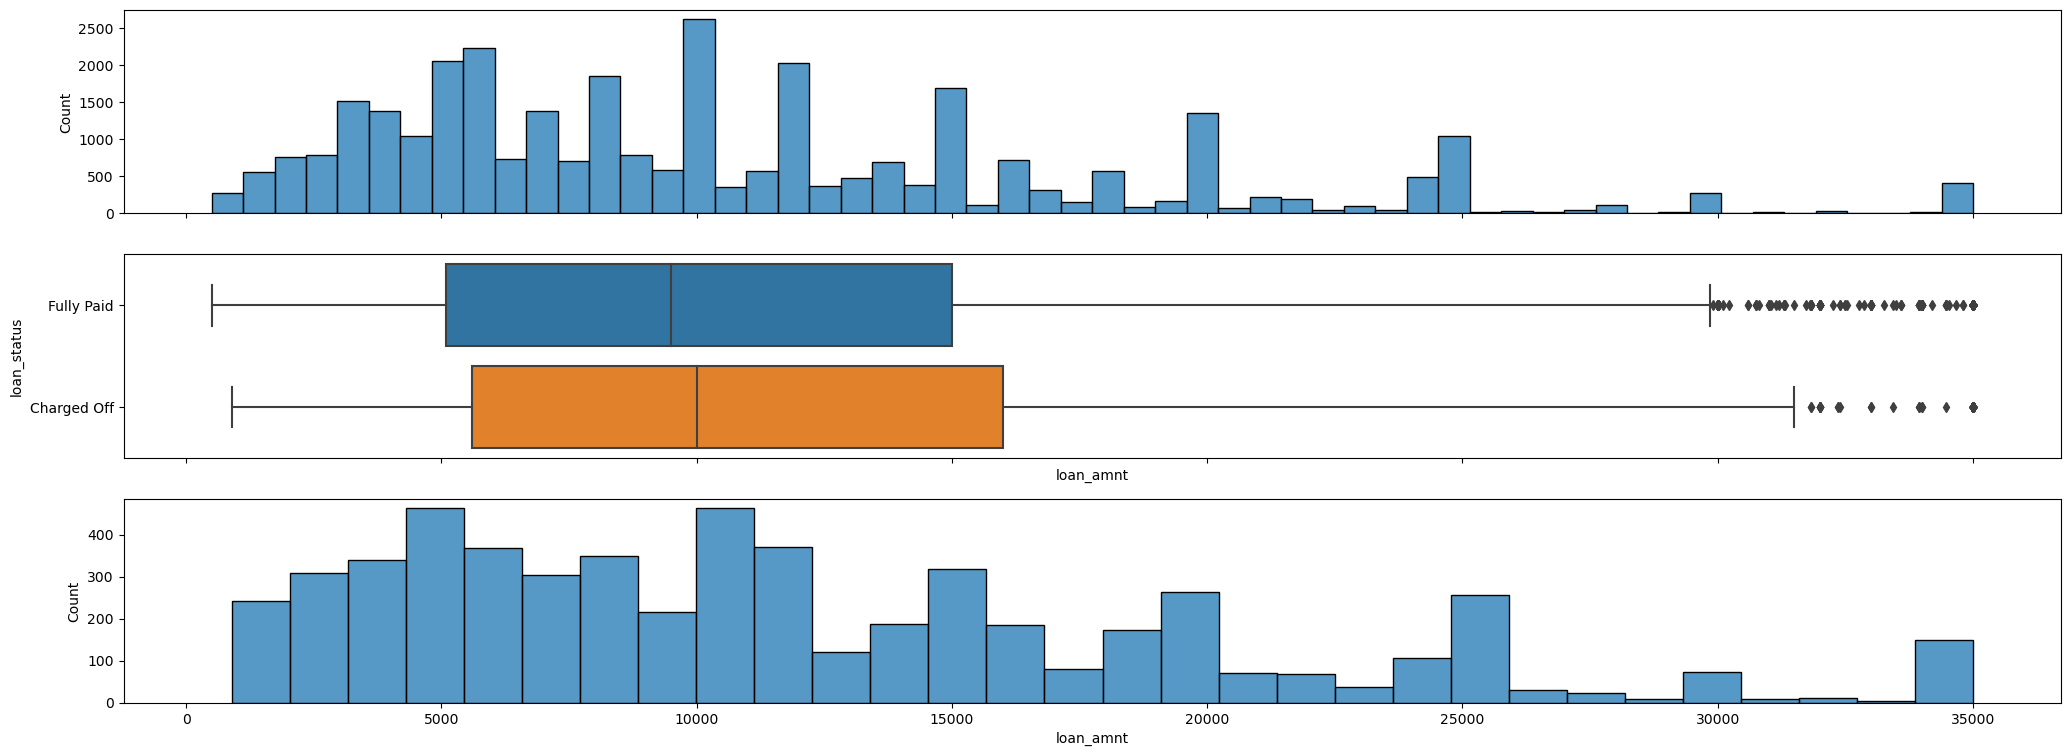

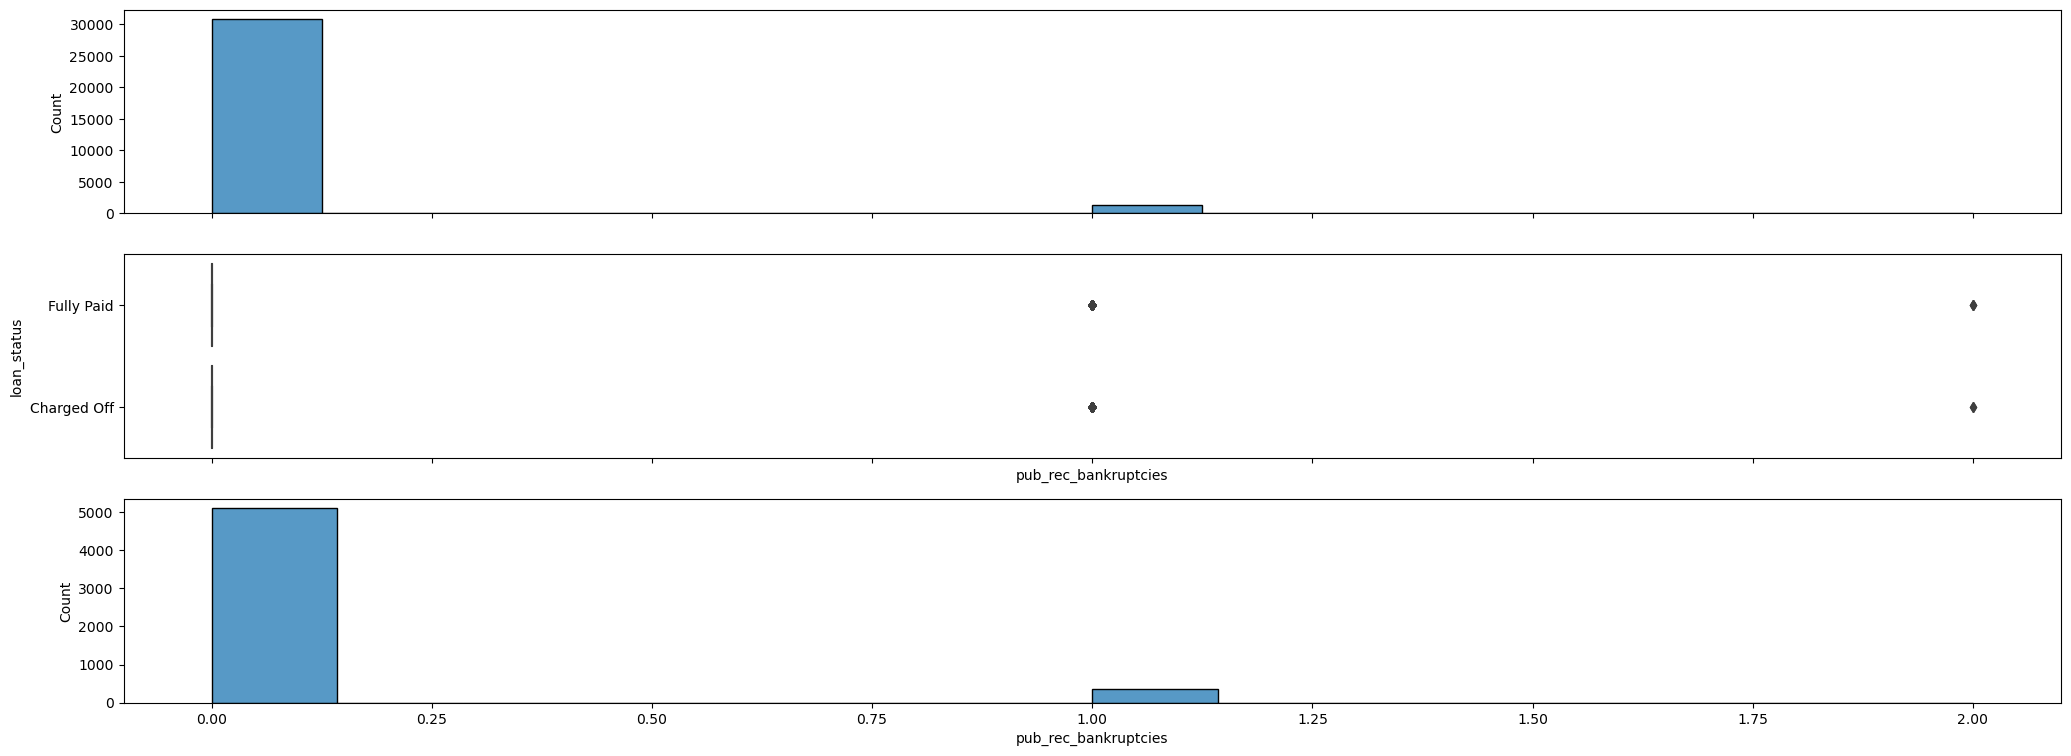

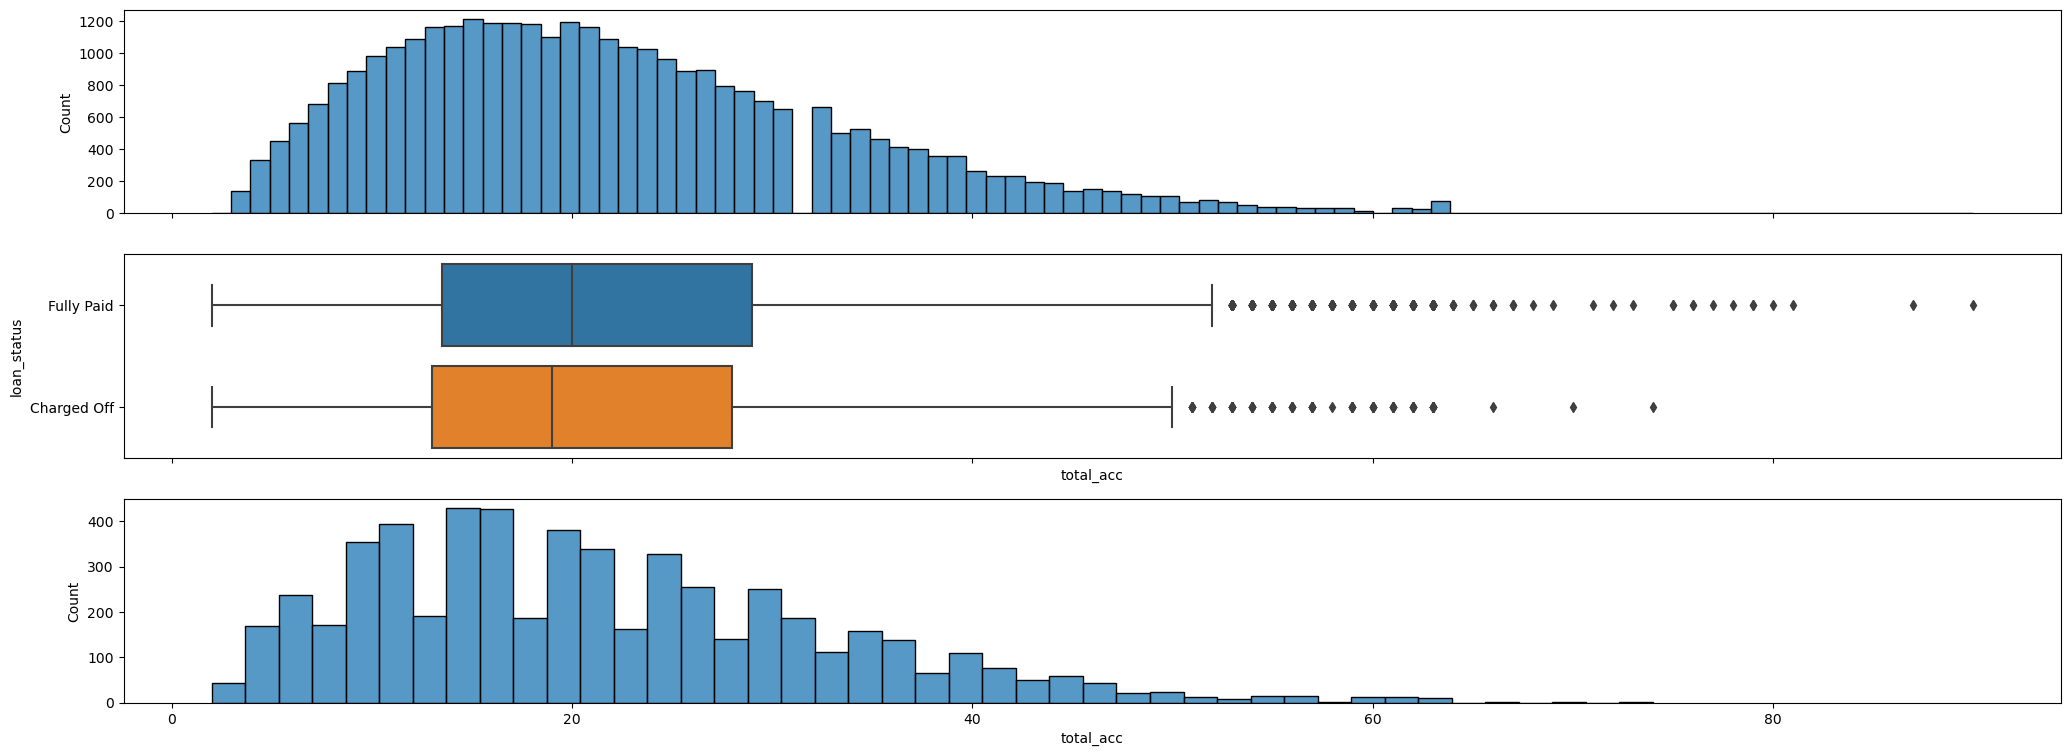

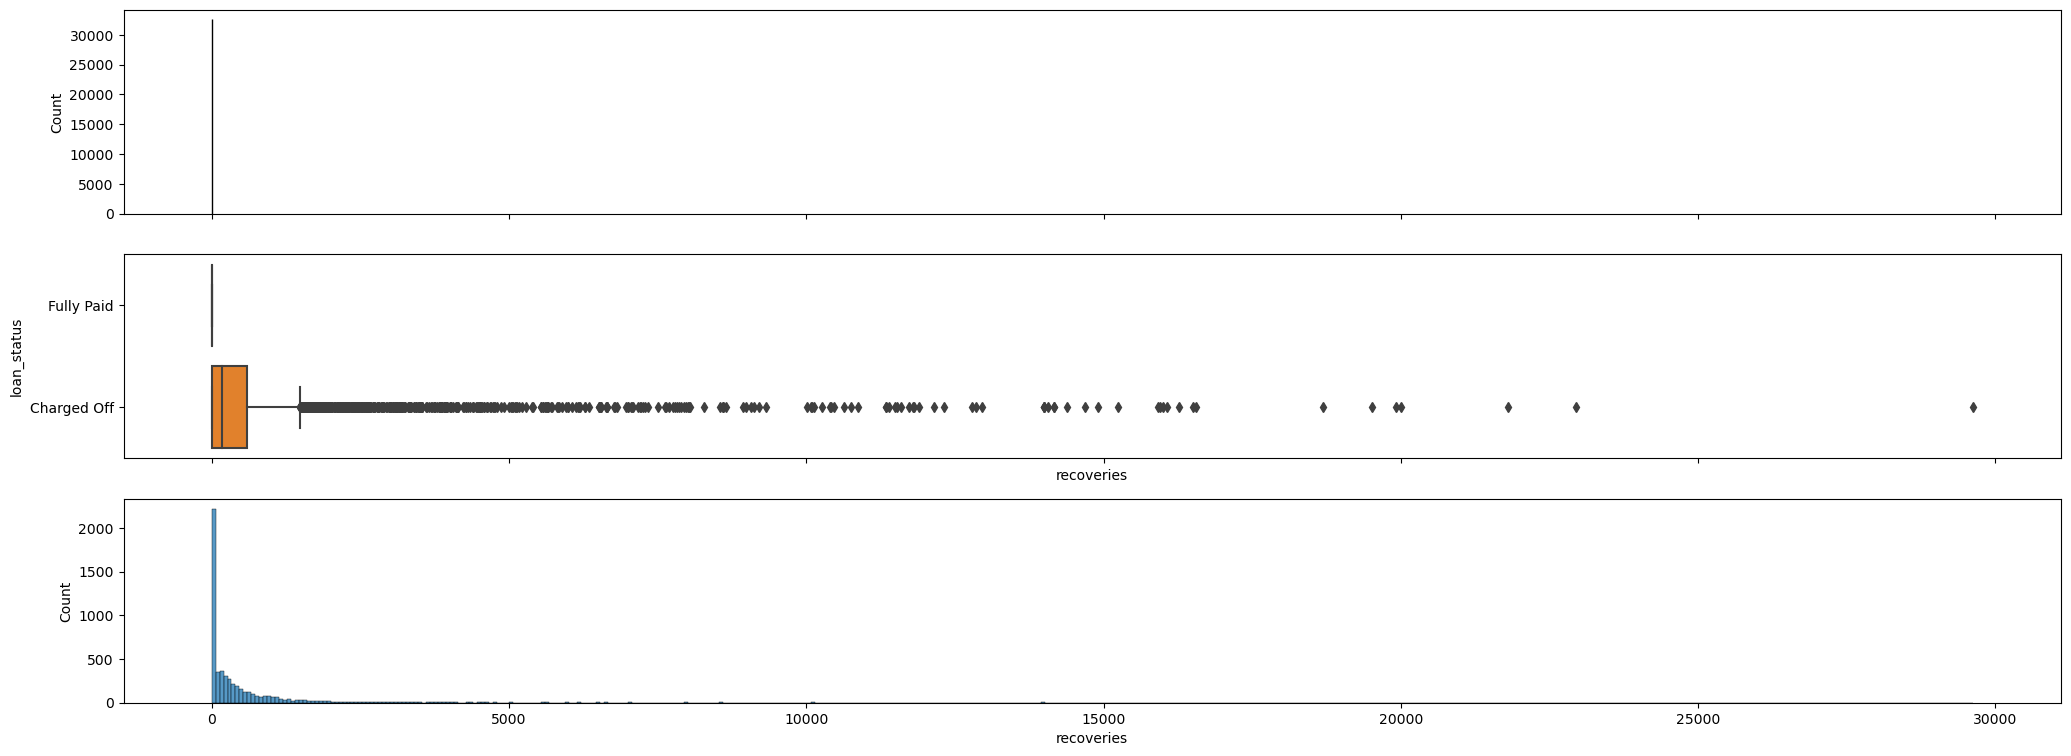

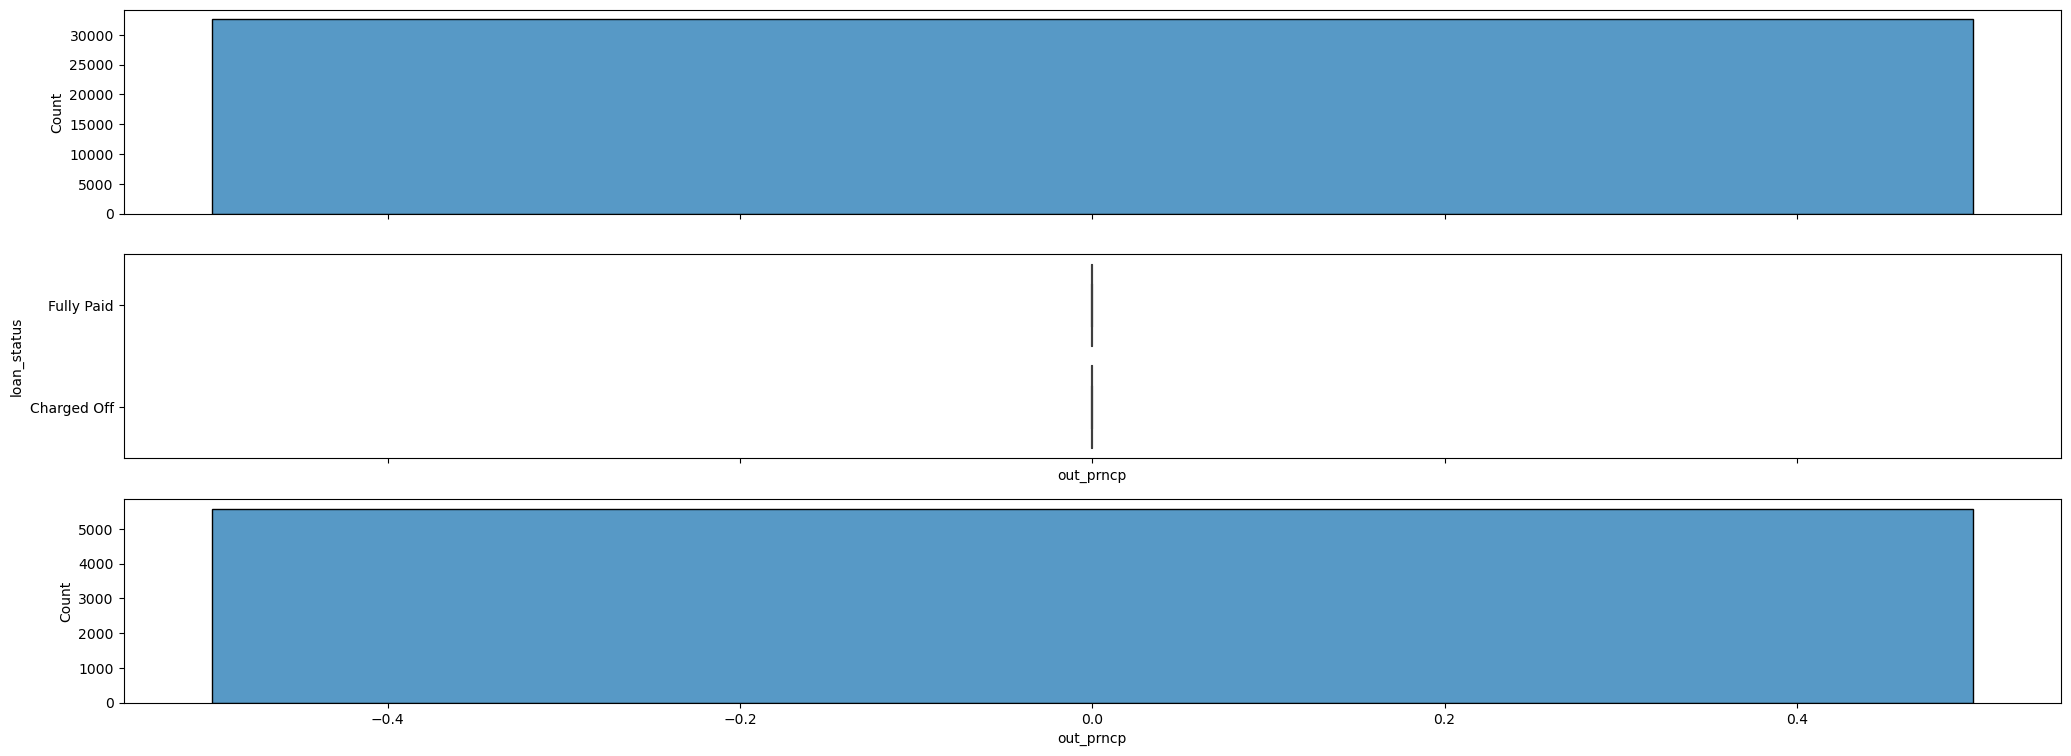

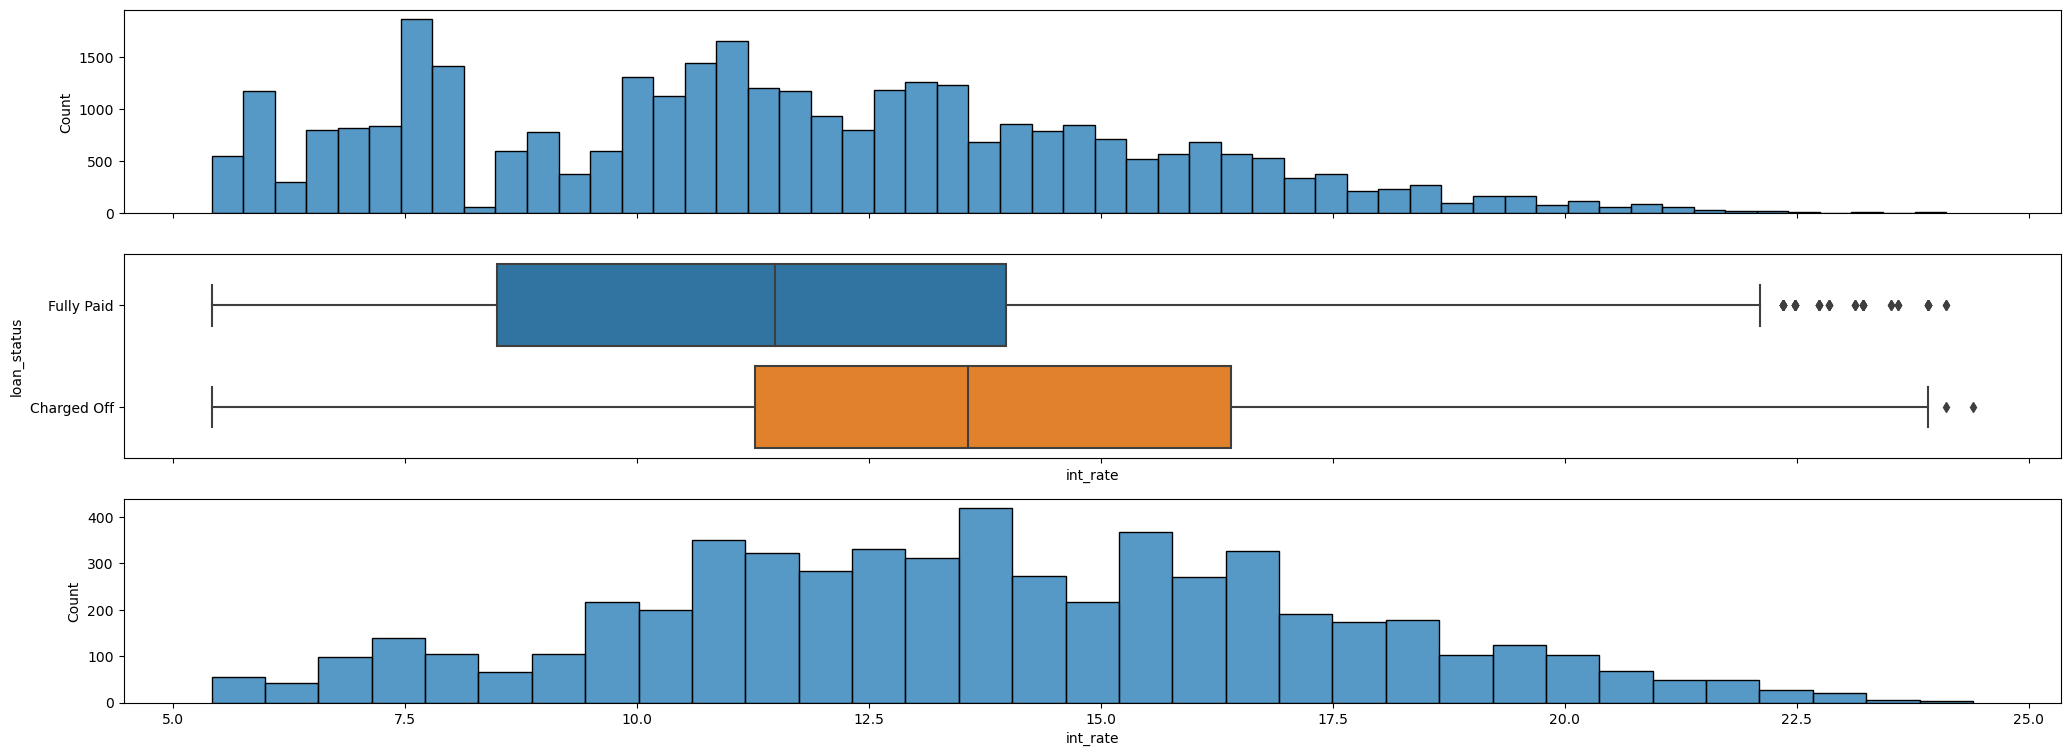

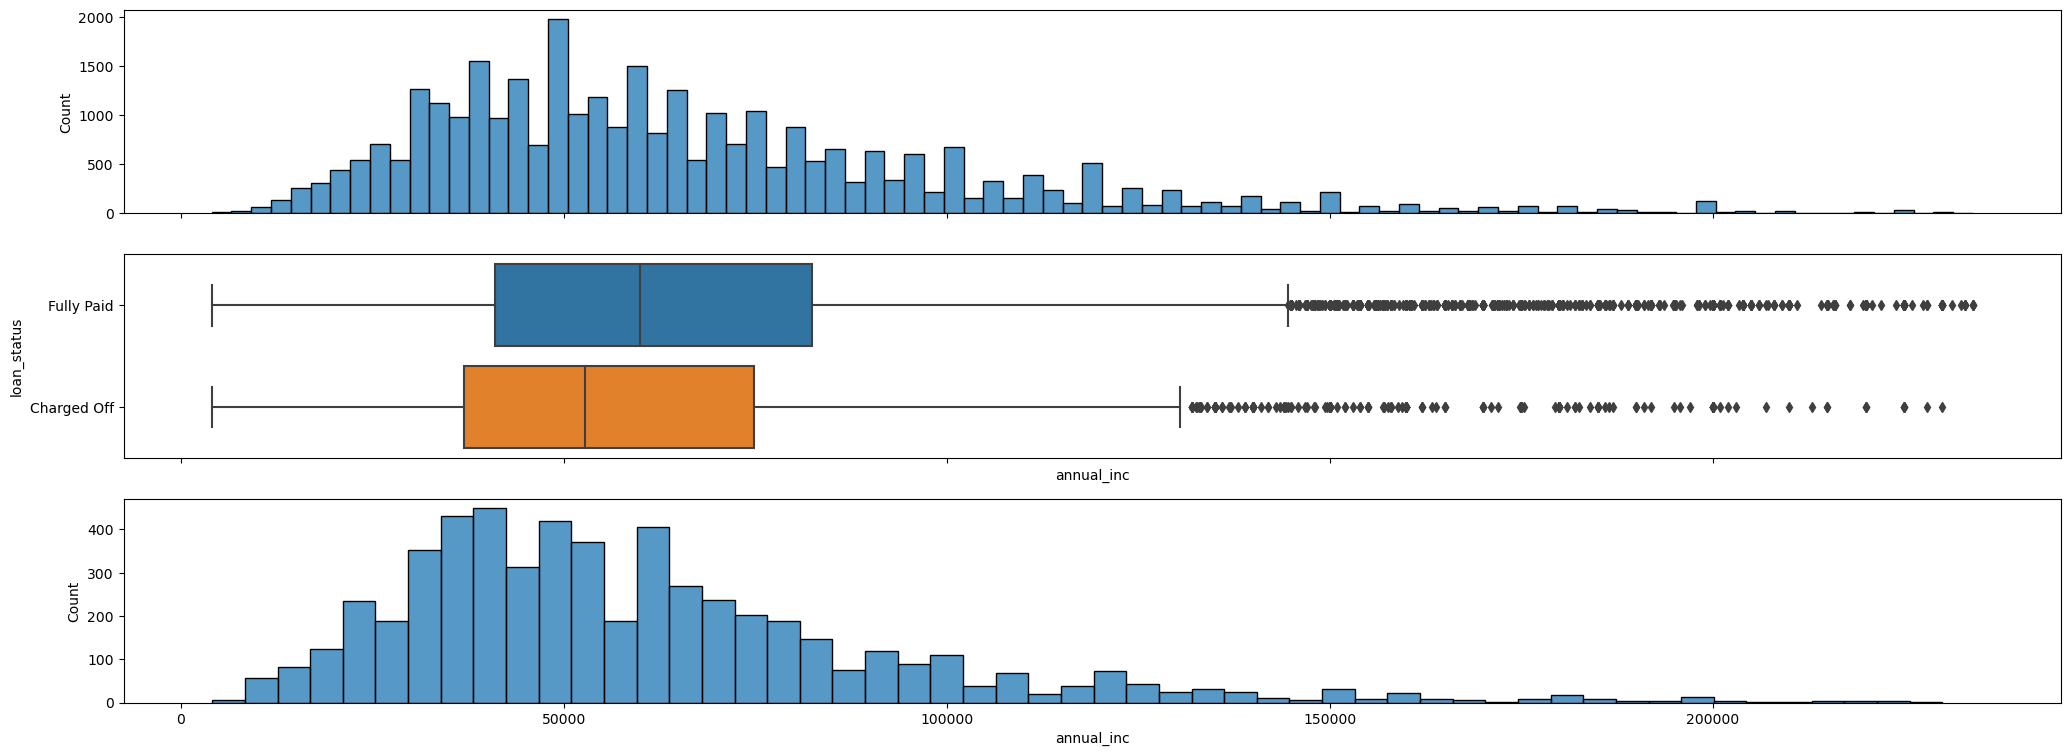

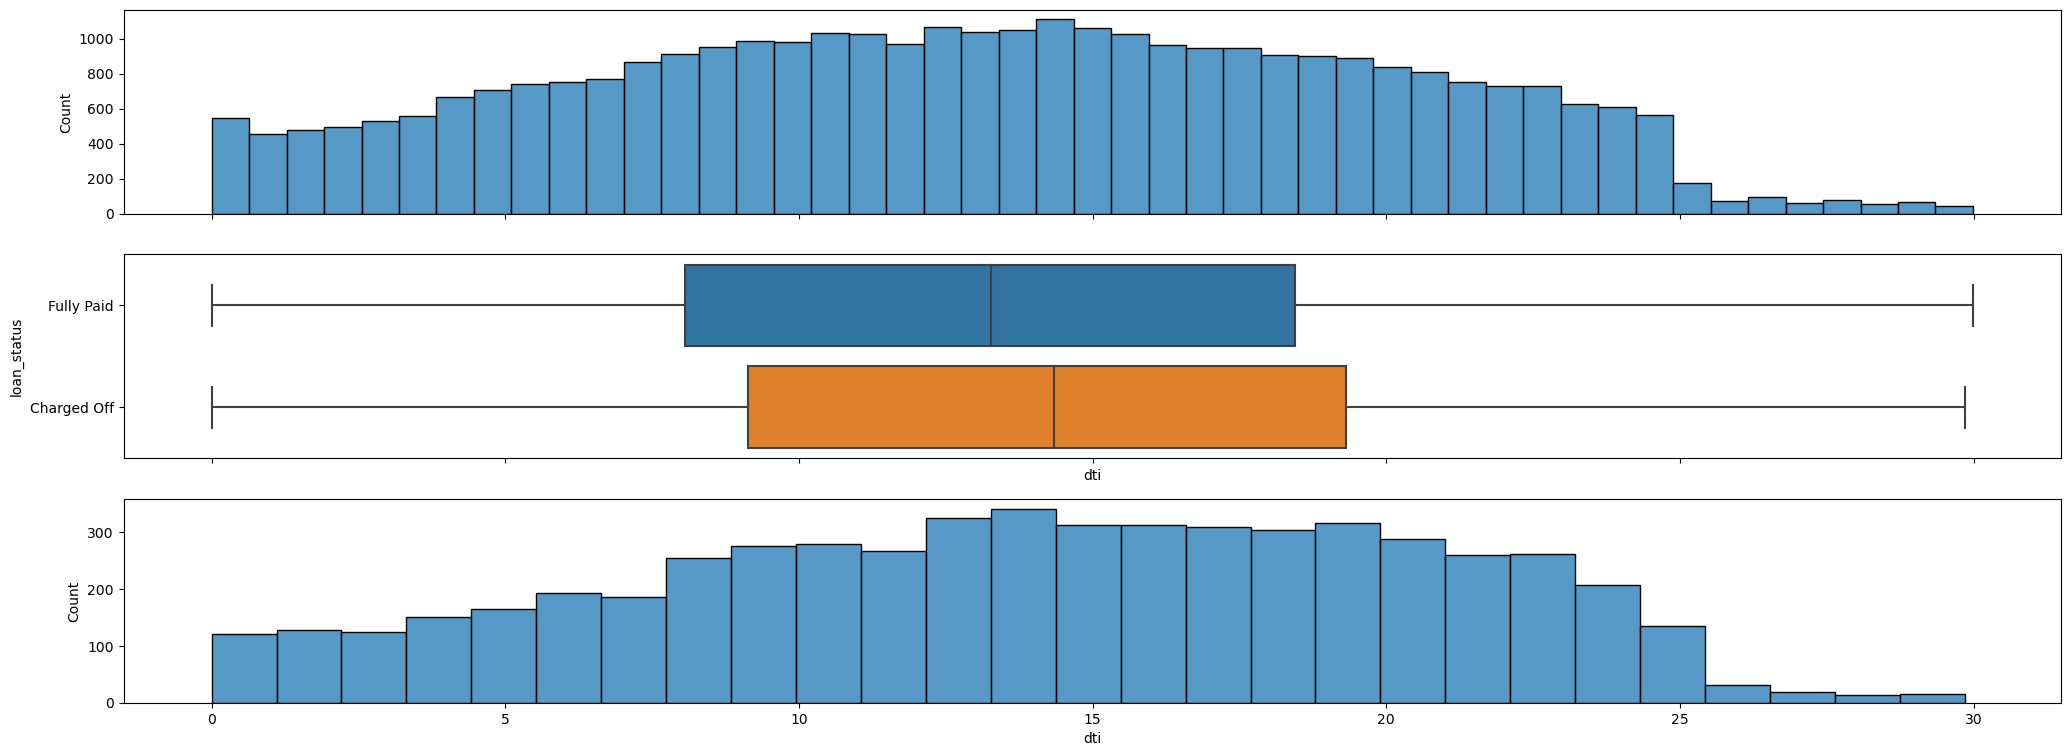

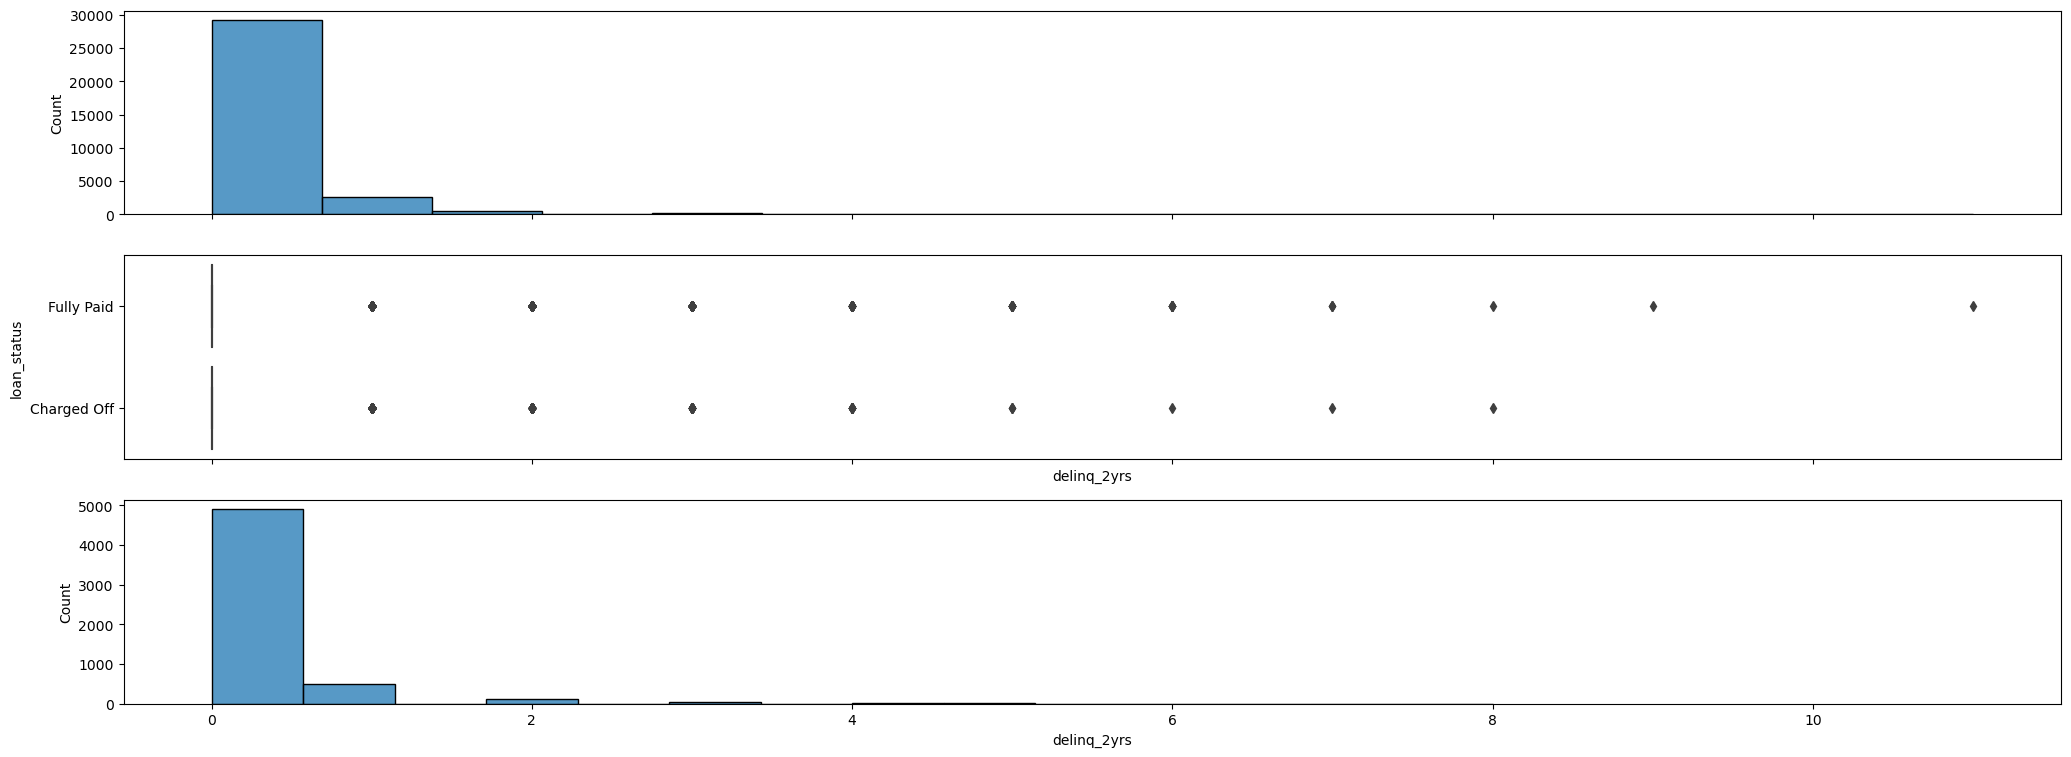

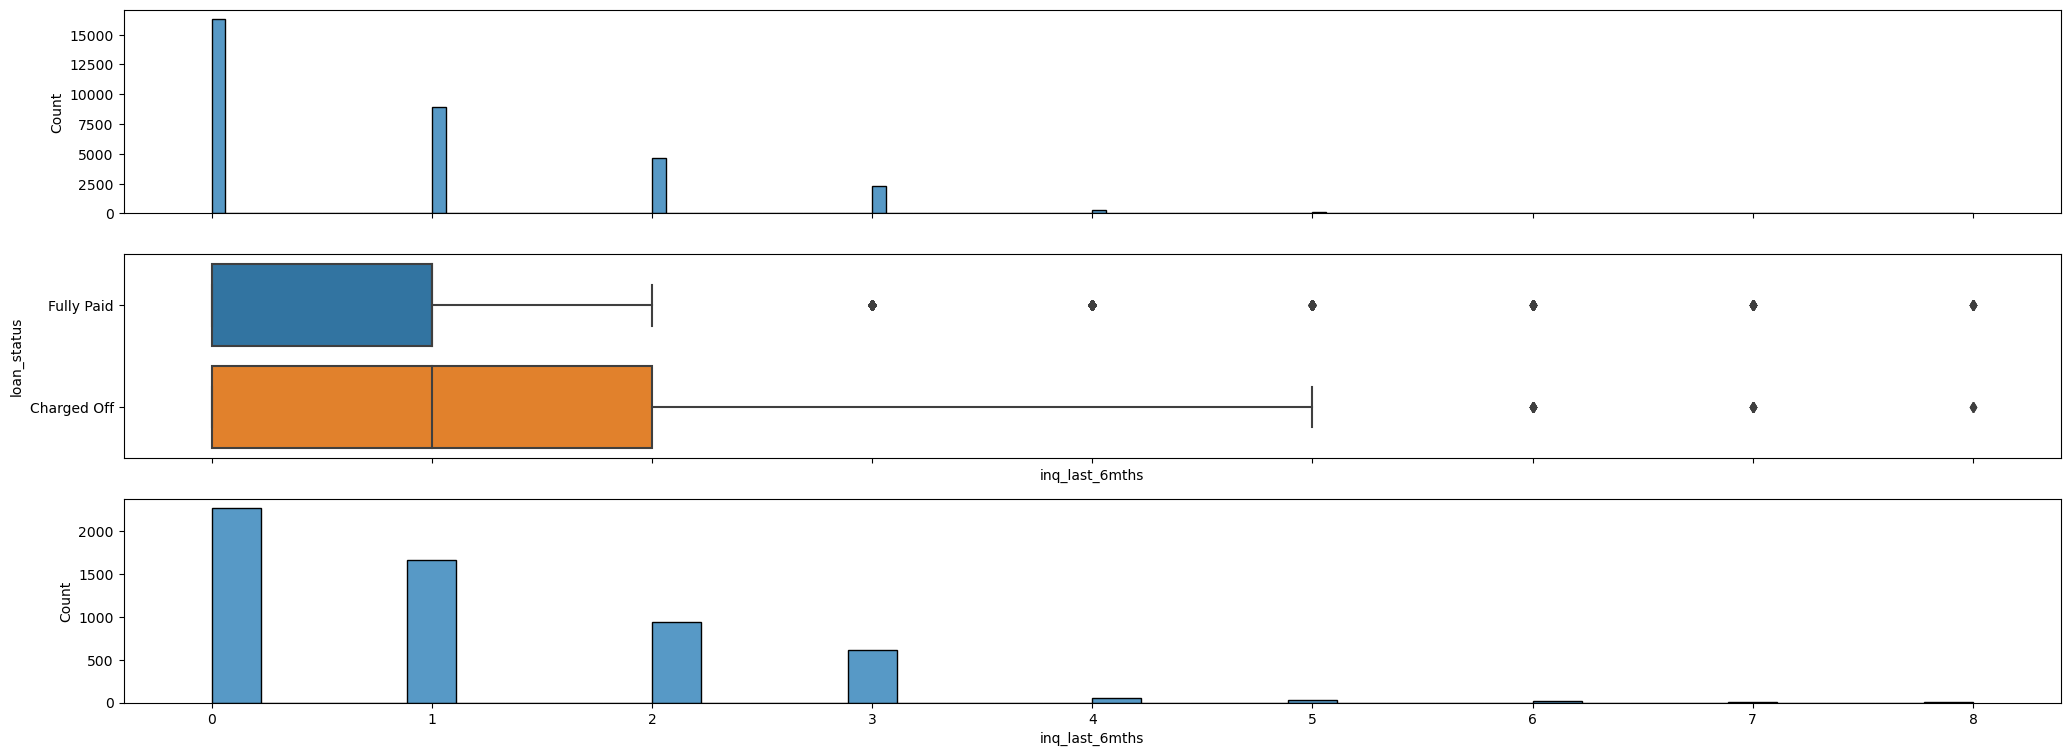

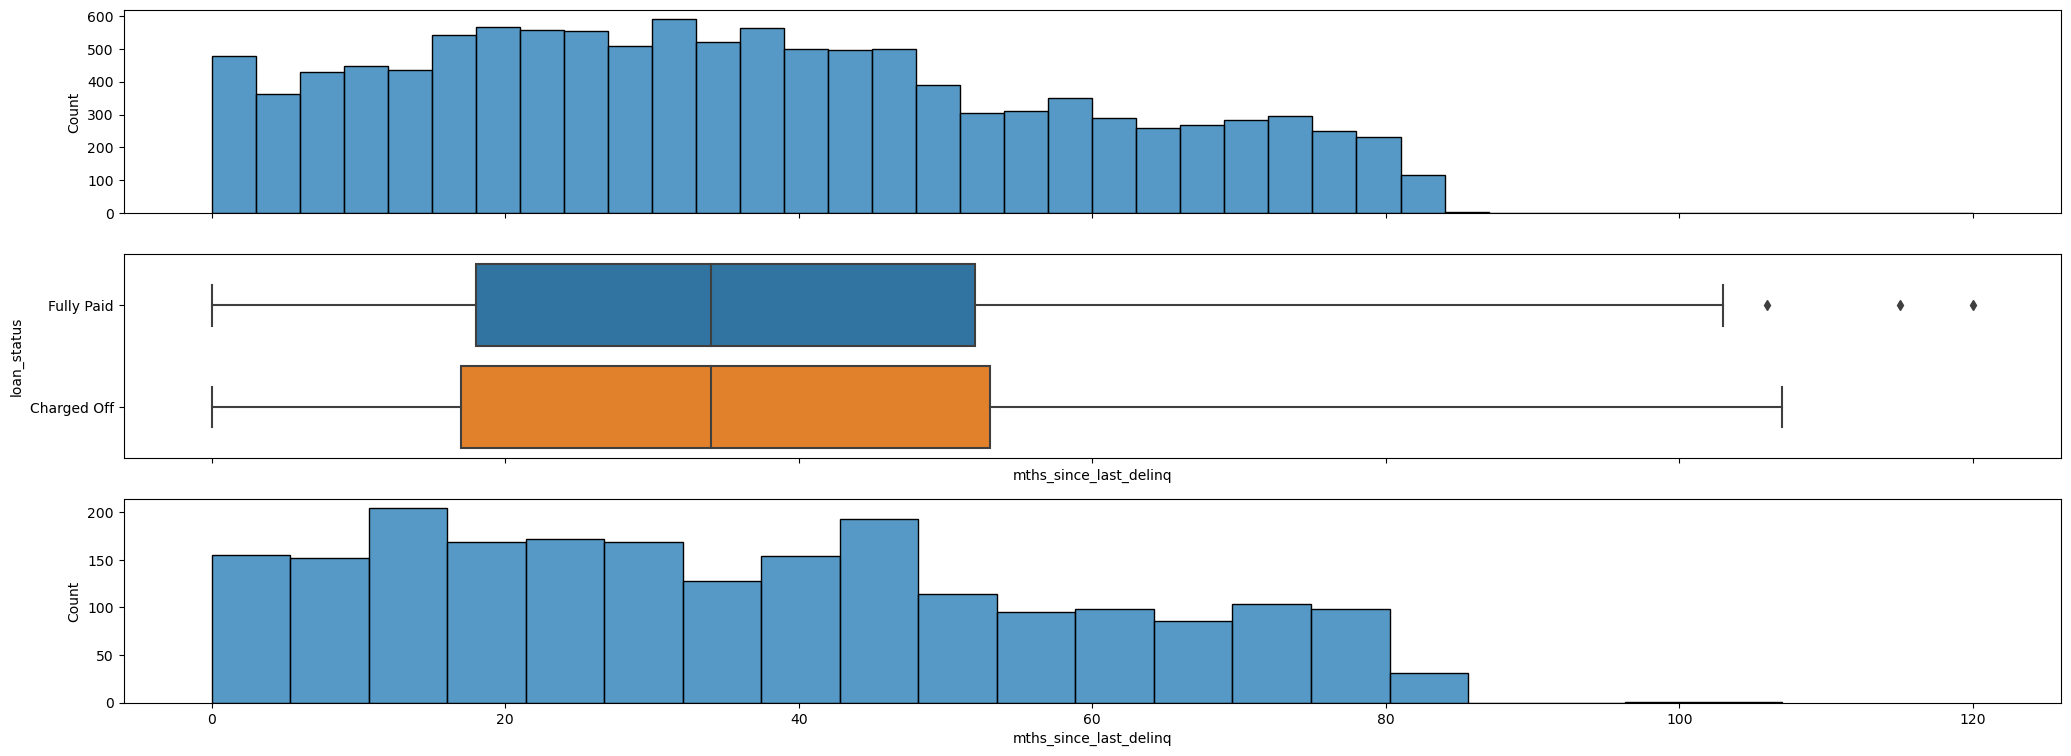

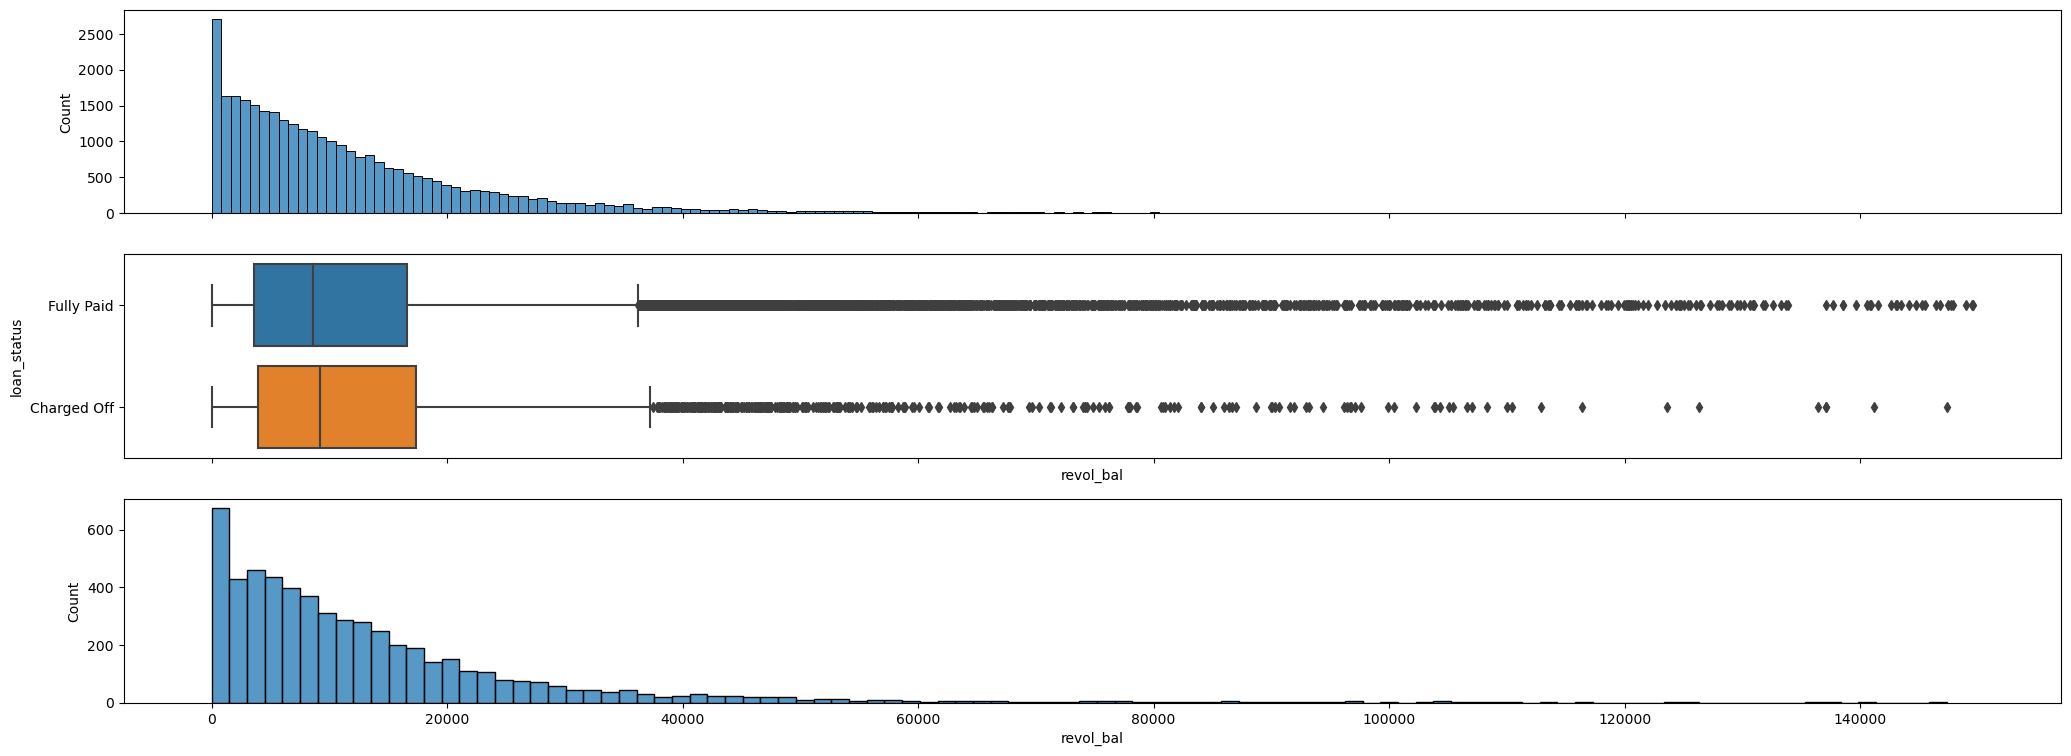

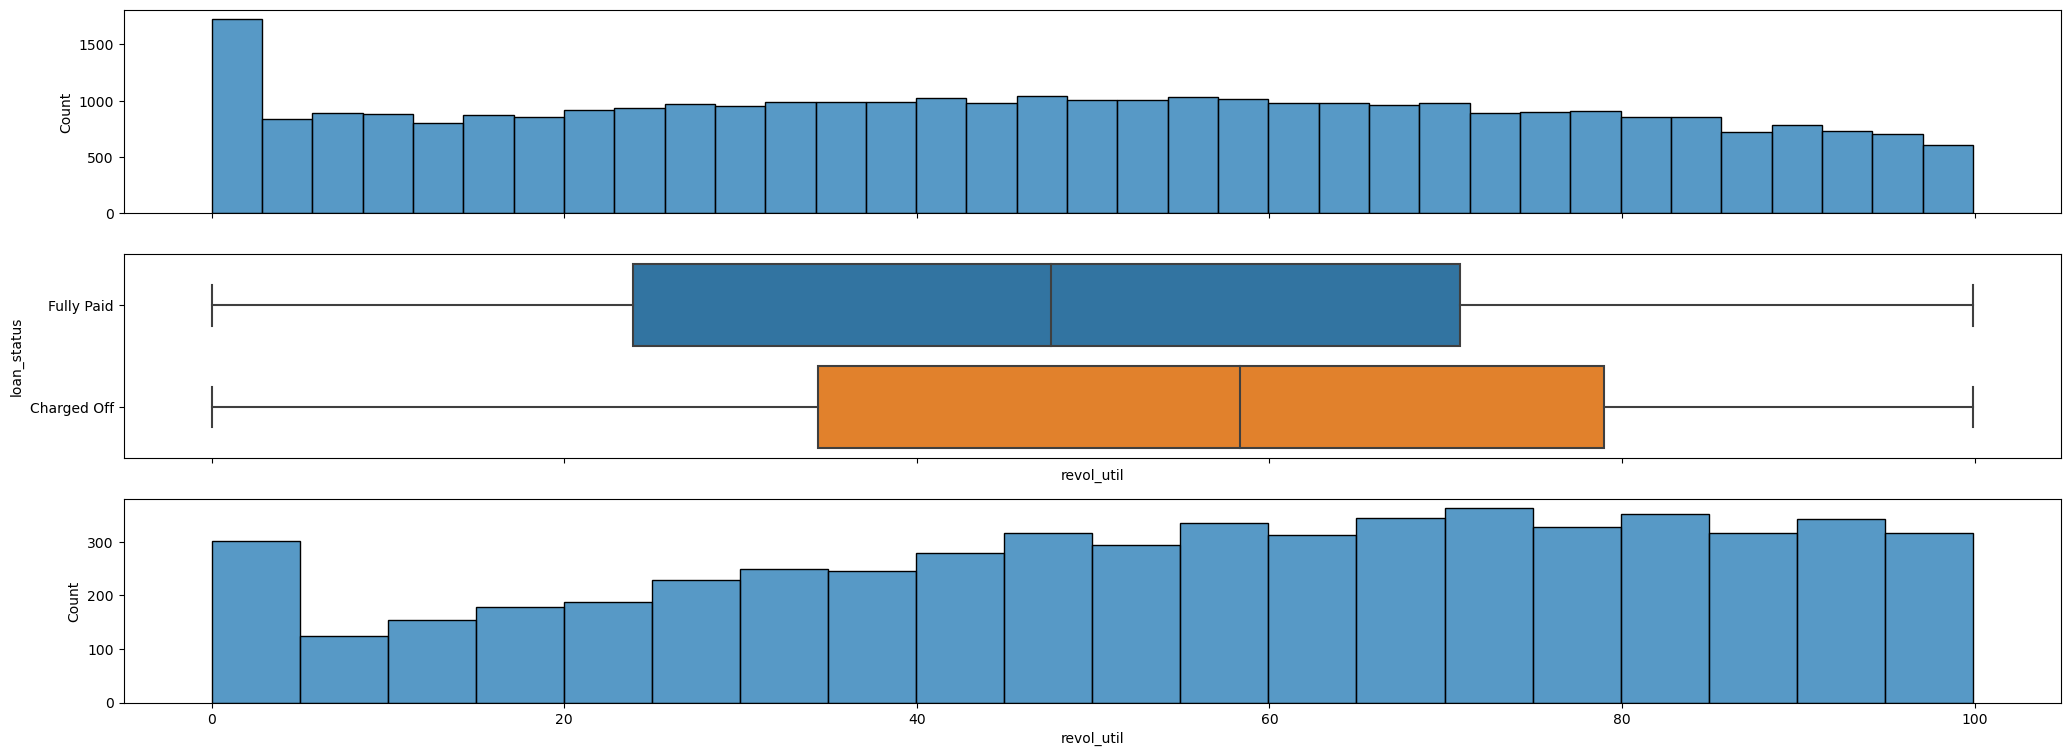

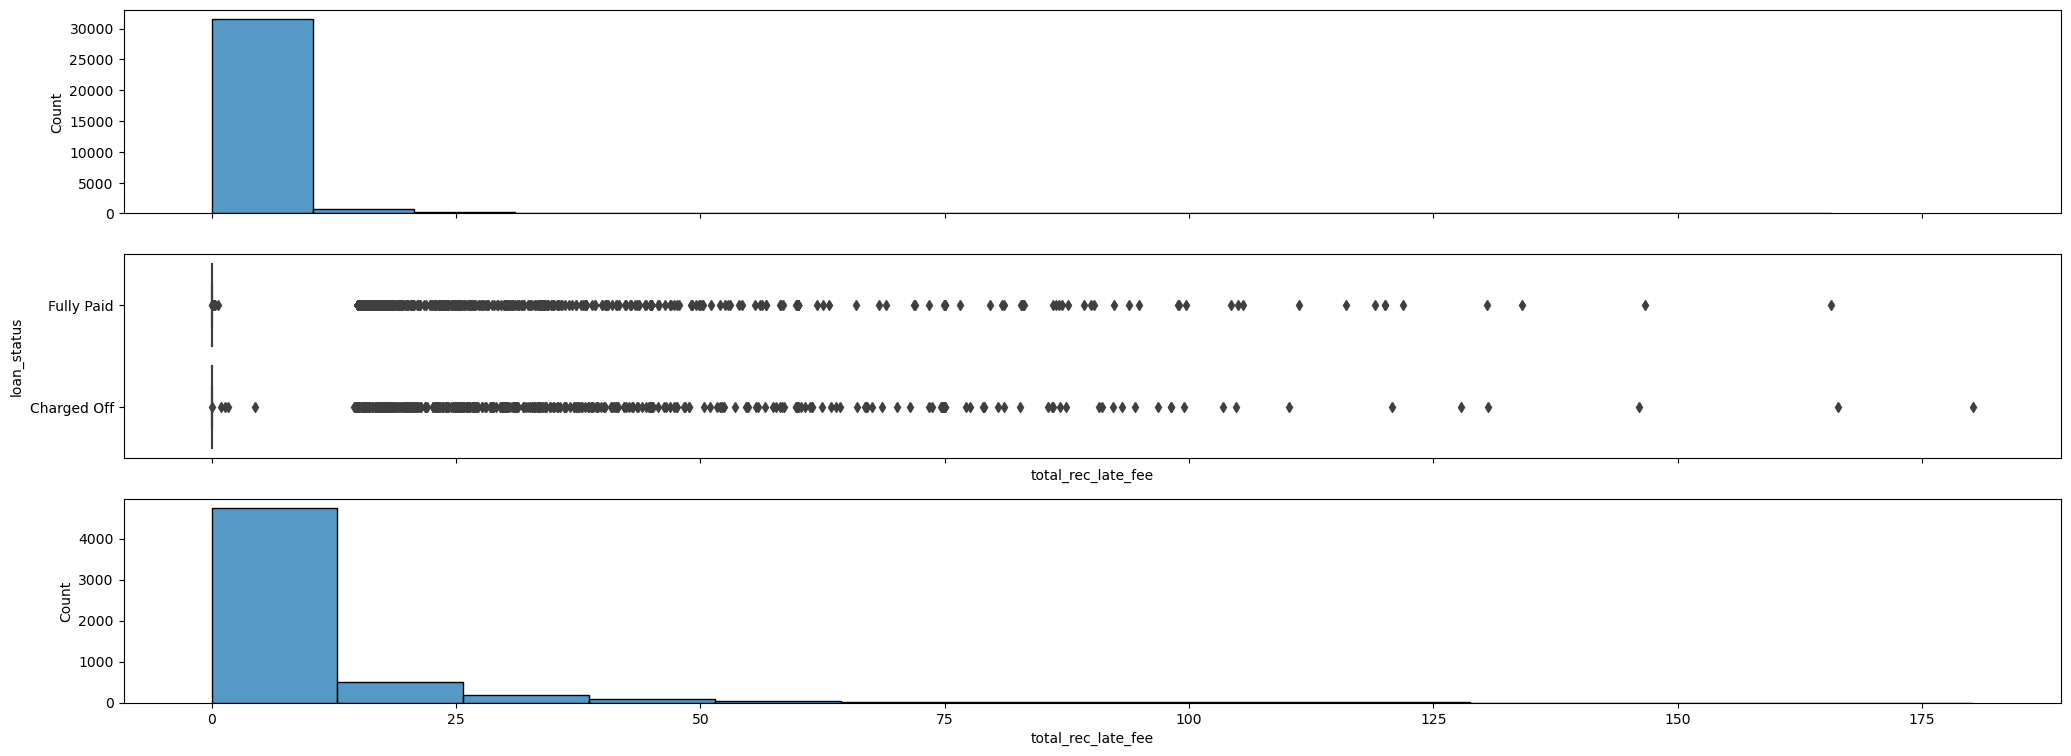

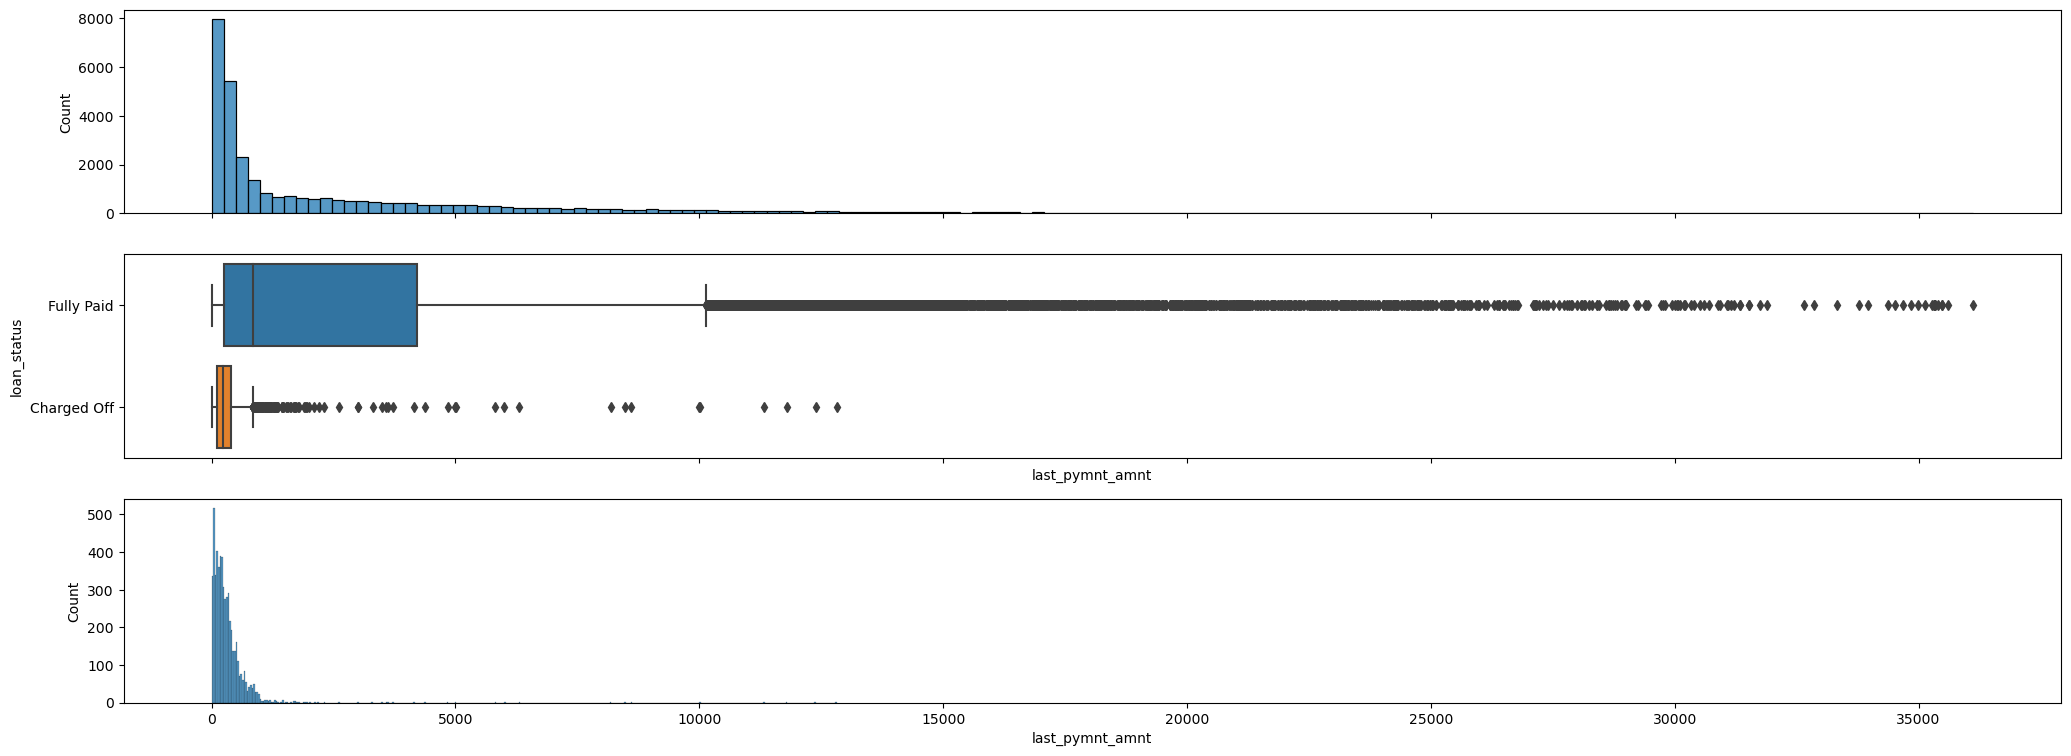

In [57]:
dataset_fullypaid_ddf = dataset_ddf[ dataset_ddf['loan_status'] == 'Fully Paid' ]
dataset_chargedoff_ddf = dataset_ddf[ dataset_ddf['loan_status'] == 'Charged Off' ]
for col in seg_uni_analysis_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(25,9))
    sns.histplot(dataset_fullypaid_ddf, x=col, ax=ax1)
    sns.boxplot(dataset_ddf, x=col, y='loan_status', ax=ax2)
    sns.histplot(dataset_chargedoff_ddf, x=col, ax=ax3)